<a href="https://colab.research.google.com/github/Lori-Qi/AML-with-ML-DL/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve, auc, f1_score, recall_score, precision_score)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1. Data Loading


In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/AML_Project/165_train_sec_forNTU.csv')

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


label  lifetime  total txs  receive txs  spent txs  total receive  \
0  illict  12437100        966          249        717   1.373950e+06   
1  illict  26357199        412          189        223   3.719988e+05   
2  illict   1643664        160           81         79   1.705773e+05   
3  illict    227679          9            5          4   4.275694e+04   
4  illict   3861165         62           31         31   1.985686e+05   

    total spent  balance  mean receive   max receive  ...  \
0  1.373950e+06   0.0000   9675.688724  200000.00000  ...   
1  3.719988e+05   0.0000   2530.598261   18000.00000  ...   
2  1.705773e+05   0.0000   2402.496566   15955.00000  ...   
3  4.275694e+04   0.0000   8551.388000   13464.00000  ...   
4  1.985684e+05   0.1911  49641.952220   76155.11676  ...   

   trx mean txs amountdiff  trx max txs amountdiff  trx min txs amountdiff  \
0               933.762857             2900.000000                     0.0   
1               313.039205             1270.000000                     0.0   
2               302.106236             1258.575929                     0.0   
3                 0.000000                0.000000                     0.0   
4                80.000000              160.000000                     0.0   

   trx mean rtxs amountdiff  trx max rtxs amountdiff  trx min rtxs amountdiff  \
0                880.000000              2600.000000                    100.0   
1                361.855627              1288.000000                      0.0   
2                833.318708              1258.575929                    470.0   
3                  0.000000                 0.000000                      0.0   
4                 80.000000               160.000000                      0.0   

   trx mean stxs amountdiff  trx max stxs amountdiff  trx min stxs amountdiff  \
0                149.310168              1388.272857                      0.0   
1                393.639741              1150.000000                      0.0   
2                 61.666667               100.000000                      5.0   
3                  0.000000                 0.000000                      0.0   
4                  0.000000                 0.000000                      0.0   

   member Jaccard  
0        0.062500  
1        0.180000  
2        0.066667  
3        0.000000  
4        0.200000  

[5 rows x 85 columns]

# 2. Exploratory Data Analysis

## 2.1 Observation Data

In [3]:
# create a data copy
df_copy = data.copy()
df_copy.head()

label  lifetime  total txs  receive txs  spent txs  total receive  \
0  illict  12437100        966          249        717   1.373950e+06   
1  illict  26357199        412          189        223   3.719988e+05   
2  illict   1643664        160           81         79   1.705773e+05   
3  illict    227679          9            5          4   4.275694e+04   
4  illict   3861165         62           31         31   1.985686e+05   

    total spent  balance  mean receive   max receive  ...  \
0  1.373950e+06   0.0000   9675.688724  200000.00000  ...   
1  3.719988e+05   0.0000   2530.598261   18000.00000  ...   
2  1.705773e+05   0.0000   2402.496566   15955.00000  ...   
3  4.275694e+04   0.0000   8551.388000   13464.00000  ...   
4  1.985684e+05   0.1911  49641.952220   76155.11676  ...   

   trx mean txs amountdiff  trx max txs amountdiff  trx min txs amountdiff  \
0               933.762857             2900.000000                     0.0   
1               313.039205             1270.000000                     0.0   
2               302.106236             1258.575929                     0.0   
3                 0.000000                0.000000                     0.0   
4                80.000000              160.000000                     0.0   

   trx mean rtxs amountdiff  trx max rtxs amountdiff  trx min rtxs amountdiff  \
0                880.000000              2600.000000                    100.0   
1                361.855627              1288.000000                      0.0   
2                833.318708              1258.575929                    470.0   
3                  0.000000                 0.000000                      0.0   
4                 80.000000               160.000000                      0.0   

   trx mean stxs amountdiff  trx max stxs amountdiff  trx min stxs amountdiff  \
0                149.310168              1388.272857                      0.0   
1                393.639741              1150.000000                      0.0   
2                 61.666667               100.000000                      5.0   
3                  0.000000                 0.000000                      0.0   
4                  0.000000                 0.000000                      0.0   

   member Jaccard  
0        0.062500  
1        0.180000  
2        0.066667  
3        0.000000  
4        0.200000  

[5 rows x 85 columns]

In [4]:
df_copy.shape

(15261, 85)

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   label                          15261 non-null  object 
 1   lifetime                       15261 non-null  int64  
 2   total txs                      15261 non-null  int64  
 3   receive txs                    15261 non-null  int64  
 4   spent txs                      15261 non-null  int64  
 5   total receive                  15261 non-null  float64
 6   total spent                    15261 non-null  float64
 7   balance                        15261 non-null  float64
 8   mean receive                   15261 non-null  float64
 9   max receive                    15261 non-null  float64
 10  min receive                    15261 non-null  float64
 11  mean spent                     15261 non-null  float64
 12  max spent                      15261 non-null 

In [6]:
# delete the repeatedly appeared features: trx r menber, trx s menber (remain: trx provide member, trx spent member)
df_copy.drop(['trx r menber', 'trx s menber'], axis=1, inplace=True)
df_copy.shape

(15261, 83)

In [7]:
# descripitive statistics
df_copy.describe().T

count          mean           std  min  \
lifetime                  15261.0  5.453892e+06  1.065133e+07  0.0   
total txs                 15261.0  4.816920e+03  2.281149e+05  0.0   
receive txs               15261.0  1.952399e+03  9.301846e+04  0.0   
spent txs                 15261.0  2.864521e+03  1.351983e+05  0.0   
total receive             15261.0  9.582401e+06  3.829895e+08  0.0   
...                           ...           ...           ...  ...   
trx min rtxs amountdiff   15261.0  7.283918e+01  1.566970e+03  0.0   
trx mean stxs amountdiff  15261.0  4.614311e+02  1.621478e+04  0.0   
trx max stxs amountdiff   15261.0  1.009272e+04  8.035782e+05  0.0   
trx min stxs amountdiff   15261.0  1.379383e+02  1.041784e+04  0.0   
member Jaccard            15261.0  7.165487e-02  1.152930e-01  0.0   

                                  25%           50%           75%  \
lifetime                  102786.0000  1.325829e+06  5.238126e+06   
total txs                      4.0000  1.700000e+01  7.800000e+01   
receive txs                    2.0000  9.000000e+00  4.300000e+01   
spent txs                      2.0000  7.000000e+00  3.200000e+01   
total receive               6413.3682  2.915542e+04  1.422289e+05   
...                               ...           ...           ...   
trx min rtxs amountdiff        0.0000  0.000000e+00  6.000000e-06   
trx mean stxs amountdiff       0.0000  0.000000e+00  1.212500e+01   
trx max stxs amountdiff        0.0000  0.000000e+00  2.729922e+01   
trx min stxs amountdiff        0.0000  0.000000e+00  0.000000e+00   
member Jaccard                 0.0000  1.666667e-02  1.033973e-01   

                                   max  
lifetime                  1.165758e+08  
total txs                 1.278190e+07  
receive txs               5.211004e+06  
spent txs                 7.570892e+06  
total receive             1.964342e+10  
...                                ...  
trx min rtxs amountdiff   1.567840e+05  
trx mean stxs amountdiff  1.269947e+06  
trx max stxs amountdiff   8.891020e+07  
trx min stxs amountdiff   1.269947e+06  
member Jaccard            1.000000e+00  

[82 rows x 8 columns]

In [8]:
# check the column with missing values
columns_with_missing_values = df_copy.columns[df_copy.isna().any()]
columns_with_missing_values

Index([], dtype='object')

## 2.2 Wallet Label Mapping

In [9]:
wallet_score_mapping = {
    'illict': 1,
    'norm': 0
}

df_copy['label'] = df_copy['label'].map(wallet_score_mapping)

In [10]:
print(df_copy['label'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..
15256    0
15257    0
15258    0
15259    0
15260    0
Name: label, Length: 15261, dtype: int64>


## 2.3 Outliers Handling

### 2.3.1 The rows that all the feautures are 0

In [11]:
# a function that decide whether the
def prepare_data(df, remove_zero_rows=True):

    df_prepare = df.copy()

    feature_cols = df_prepare.columns.difference(['label'])

    zero_feature_rows = (df_prepare[feature_cols] == 0).all(axis=1)

    num_zero_rows = zero_feature_rows.sum()
    print(f"Total number of rows with all feature values equal to 0: {num_zero_rows}")

    label_distribution = df_prepare.loc[zero_feature_rows, 'label'].value_counts()
    print("Label distribution for rows with all-zero features:")
    print(label_distribution)

    if remove_zero_rows:
        df_cleaned = df_prepare.loc[~zero_feature_rows]
        print(f"Data shape after removing all-zero rows: {df_cleaned.shape}")
    else:
        df_cleaned = df_copy

    return df_cleaned


In [12]:
df_cleaned = prepare_data(df_copy, remove_zero_rows=False)

Total number of rows with all feature values equal to 0: 74
Label distribution for rows with all-zero features:
label
1    74
Name: count, dtype: int64


### 2.3.2 Ploting histogram and boxplot

Processing feature: asset-stander receive txs


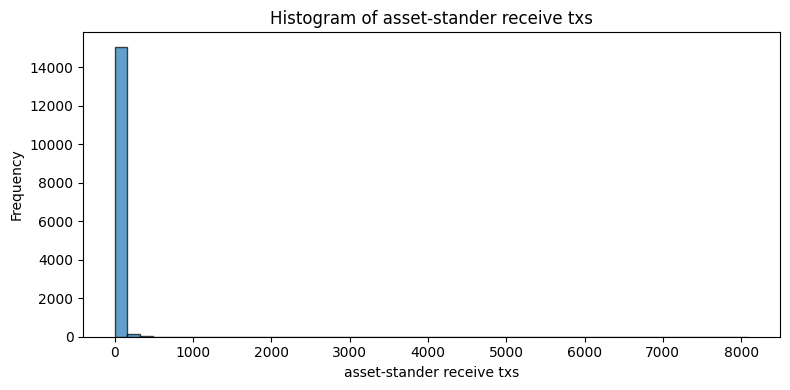

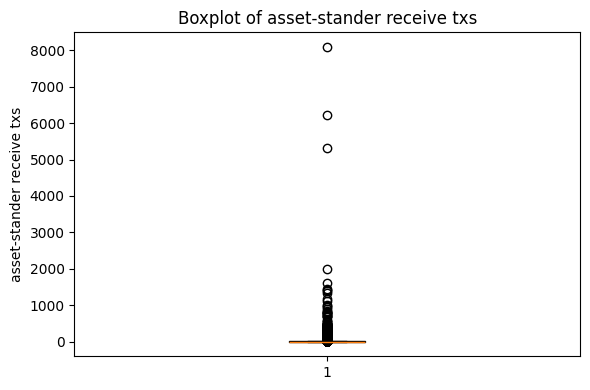

Processing feature: asset-stander spent txs


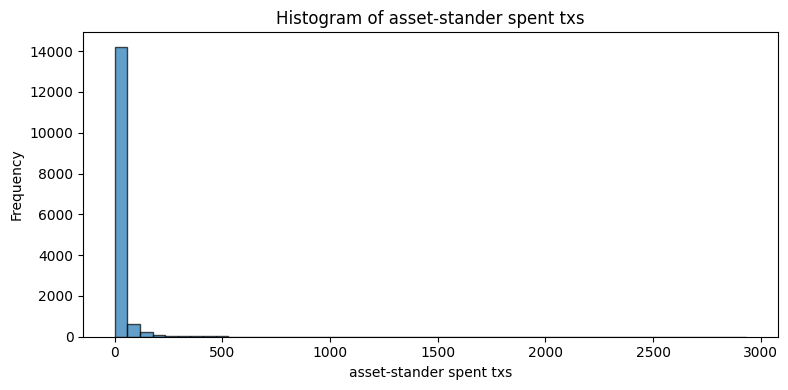

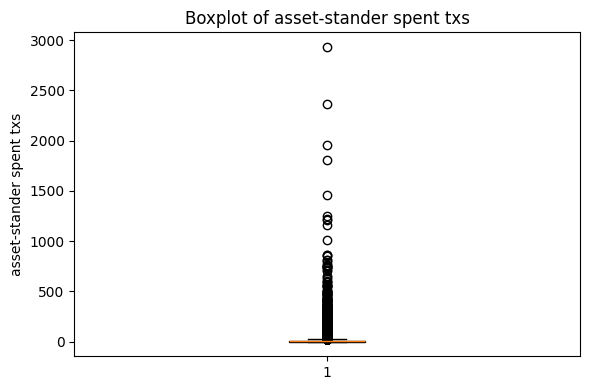

Processing feature: balance


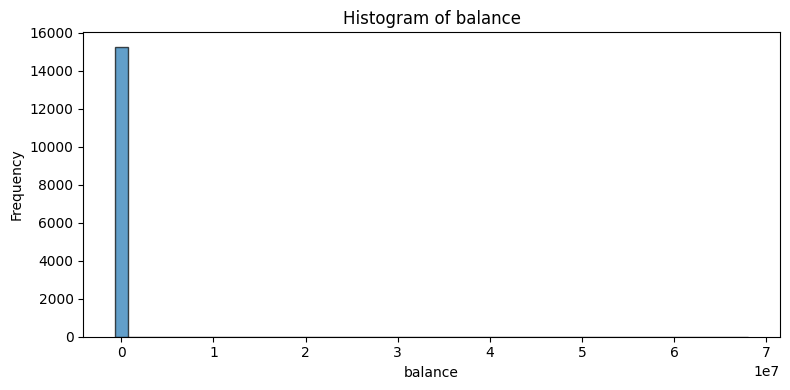

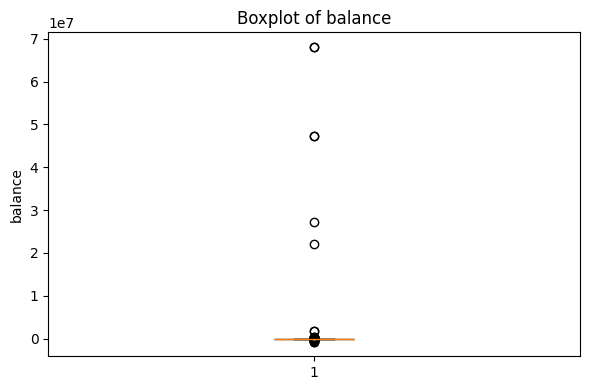

Processing feature: extreme receive txs


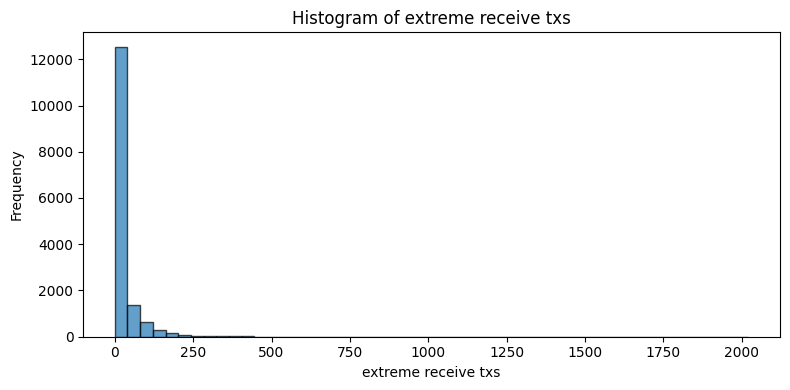

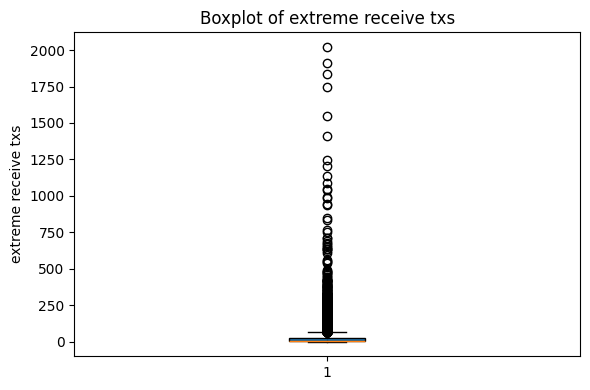

Processing feature: extreme spent txs


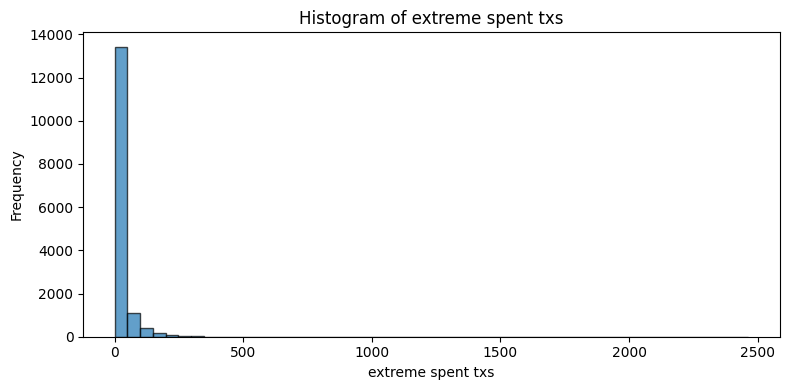

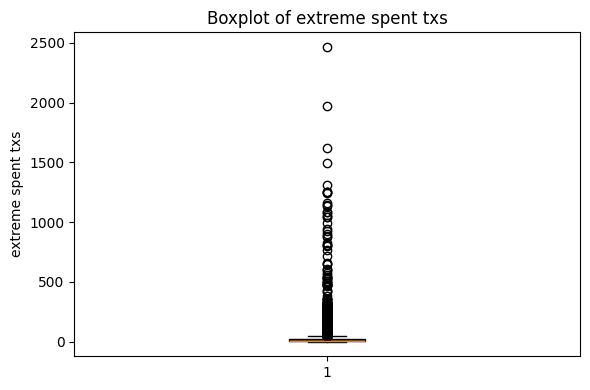

Processing feature: lifetime


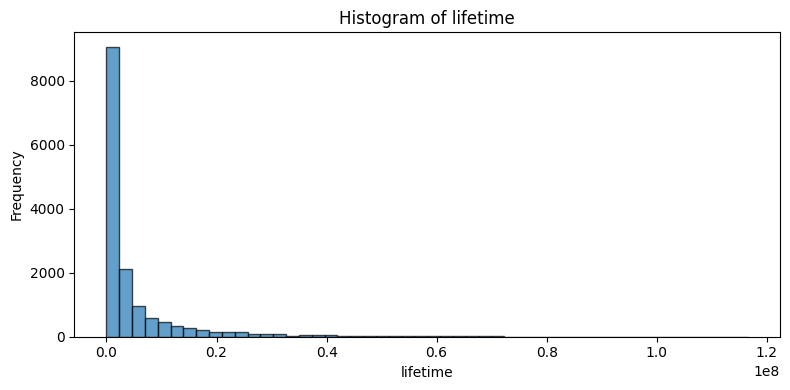

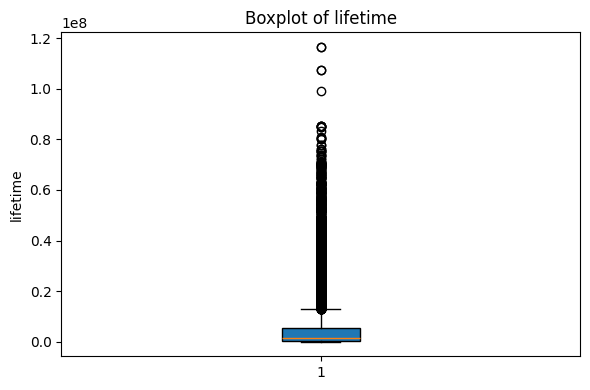

Processing feature: max receive


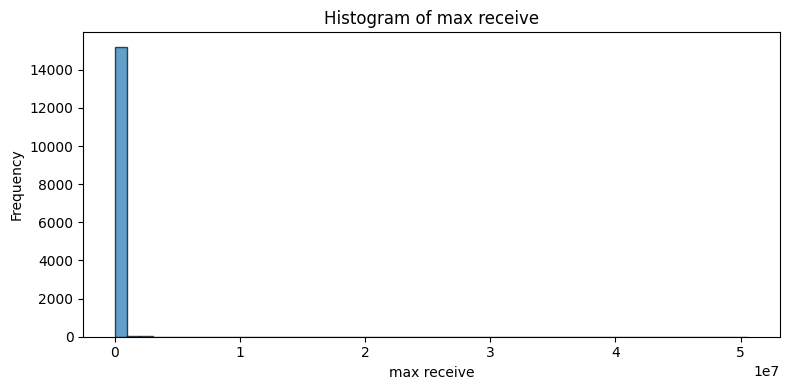

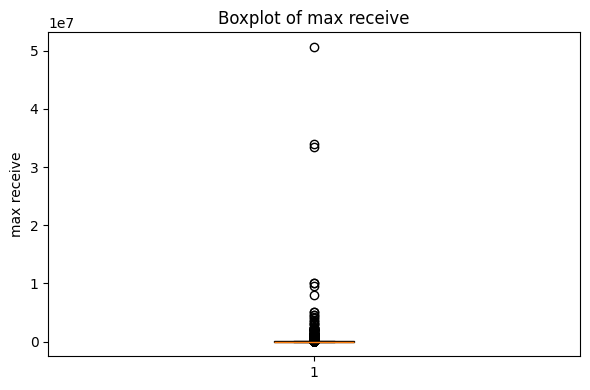

Processing feature: max rtxs amountdiff


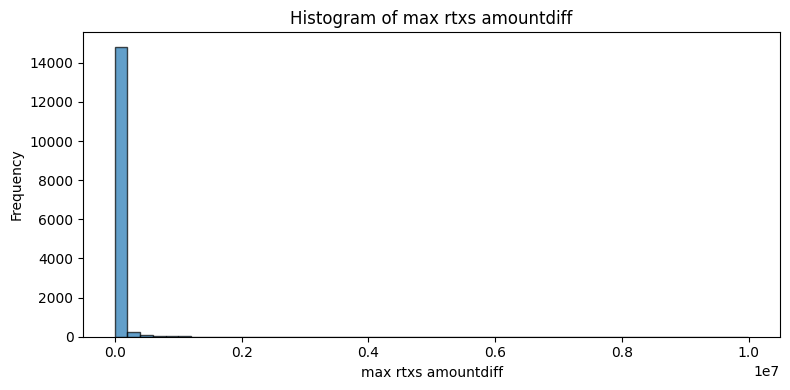

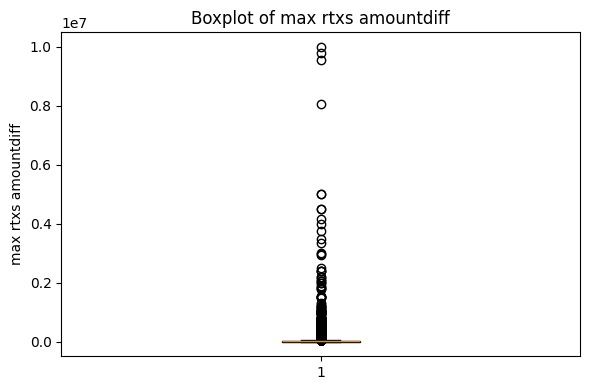

Processing feature: max rtxs timegap


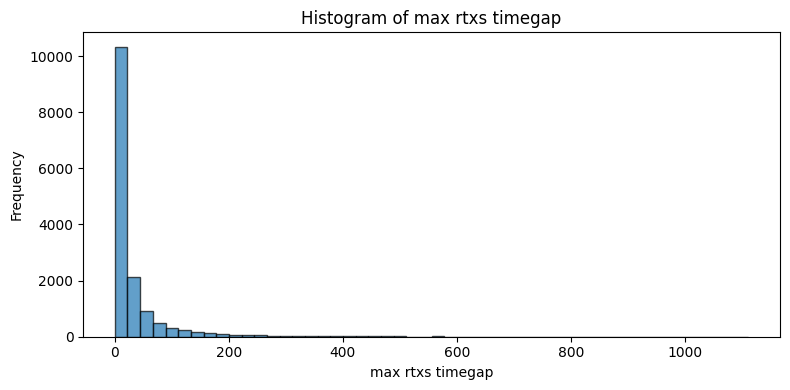

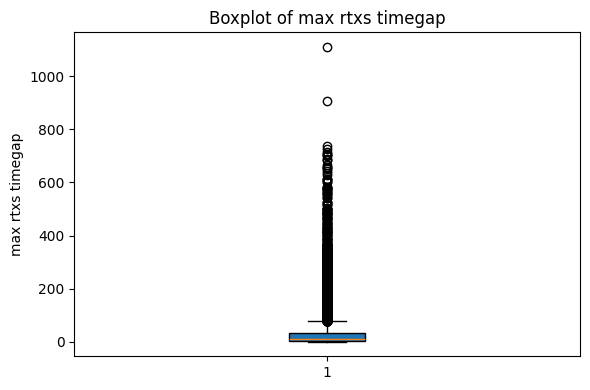

Processing feature: max spent


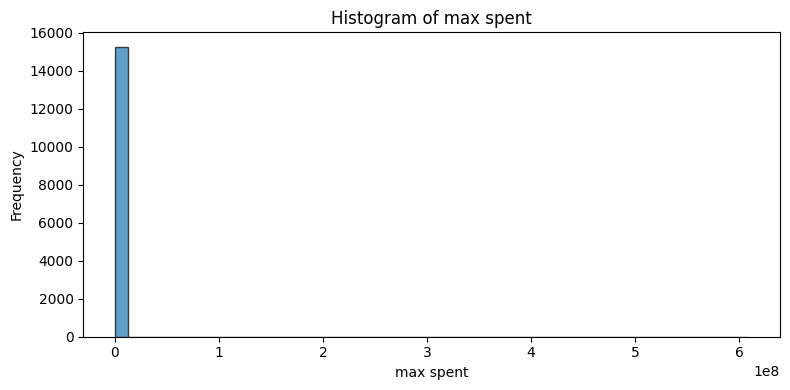

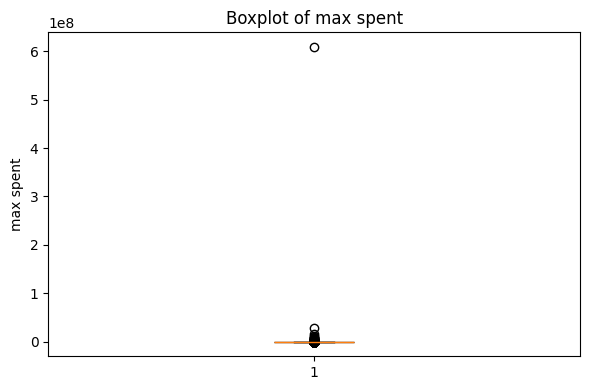

Processing feature: max stxs amountdiff


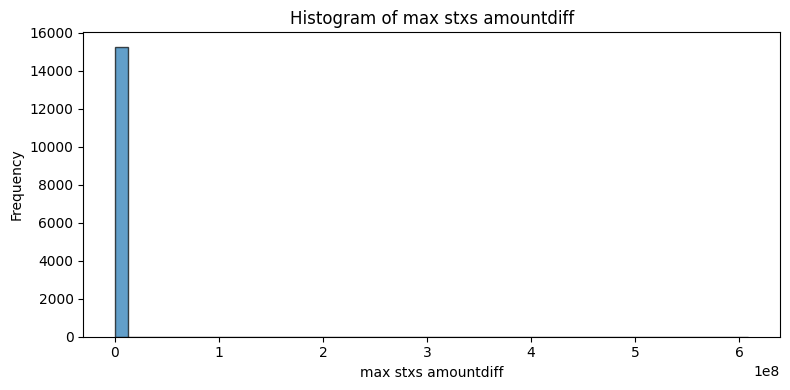

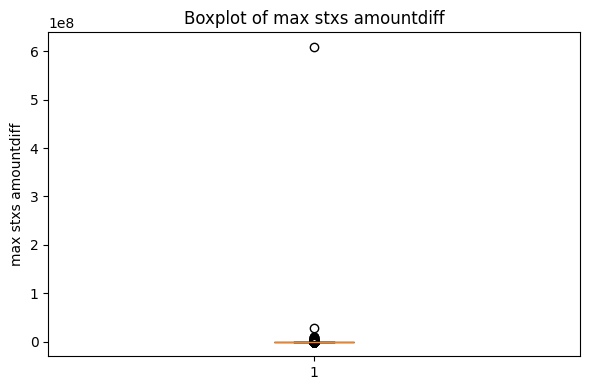

Processing feature: max stxs timegap


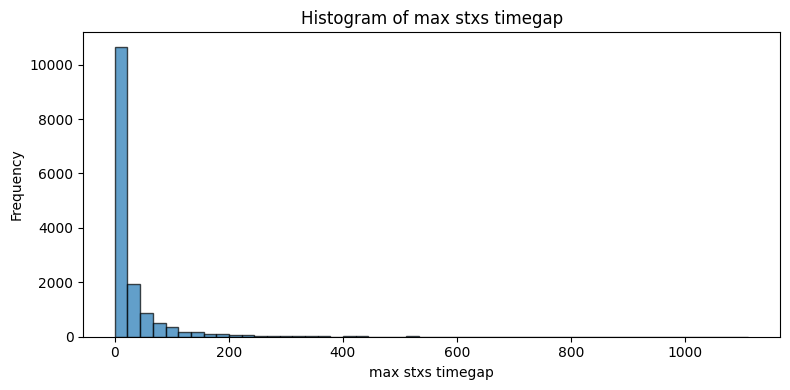

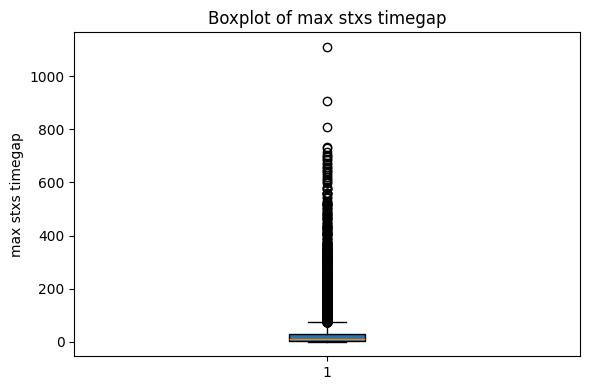

Processing feature: max txs amountdiff


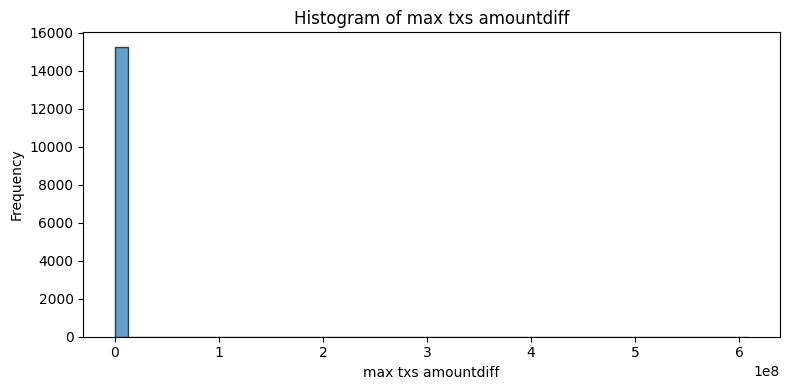

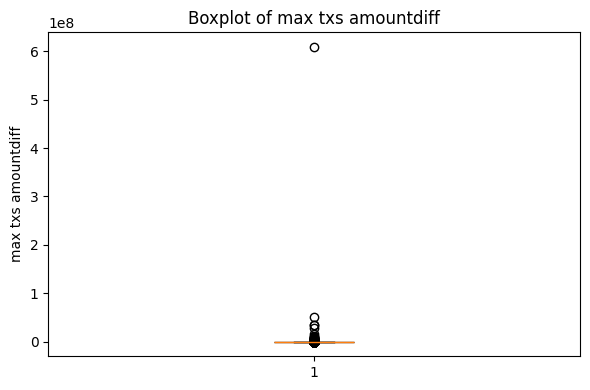

Processing feature: max txs timegap


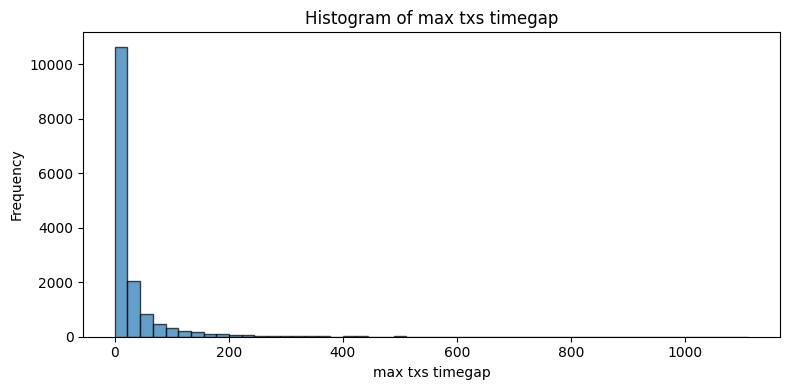

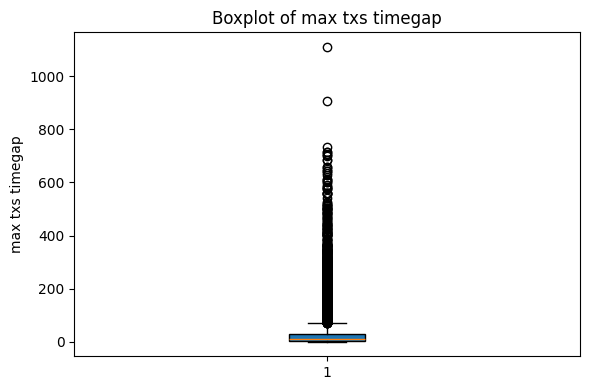

Processing feature: mean receive


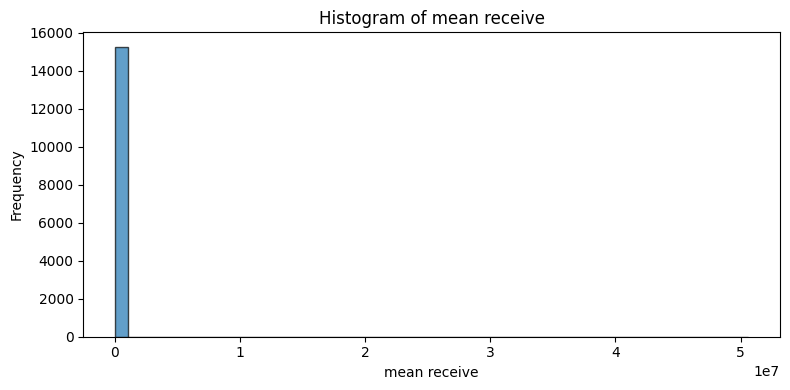

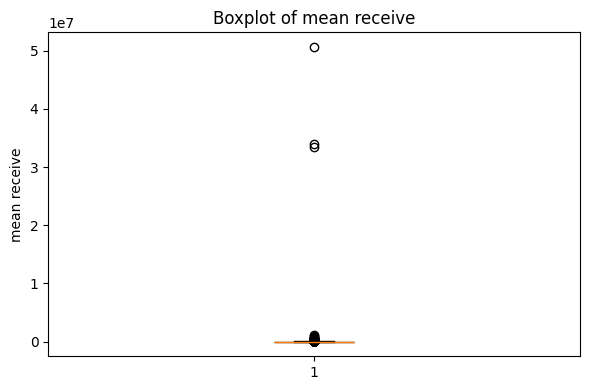

Processing feature: mean rtxs amountdiff


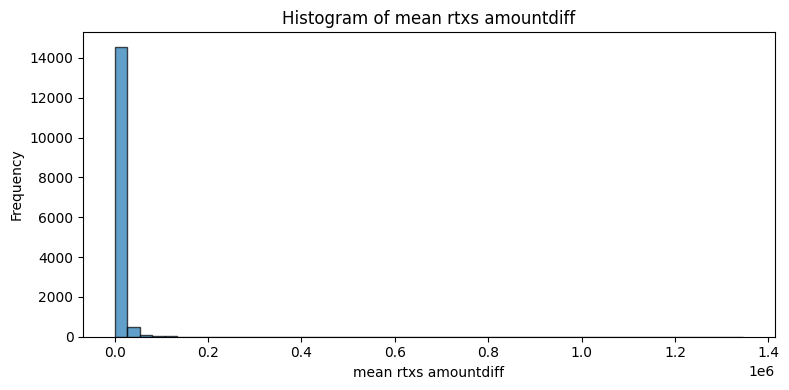

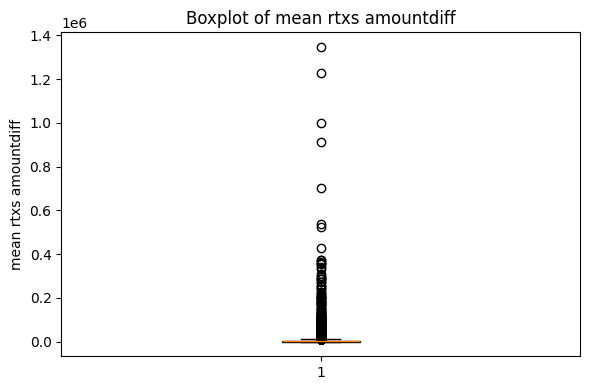

Processing feature: mean rtxs timegap


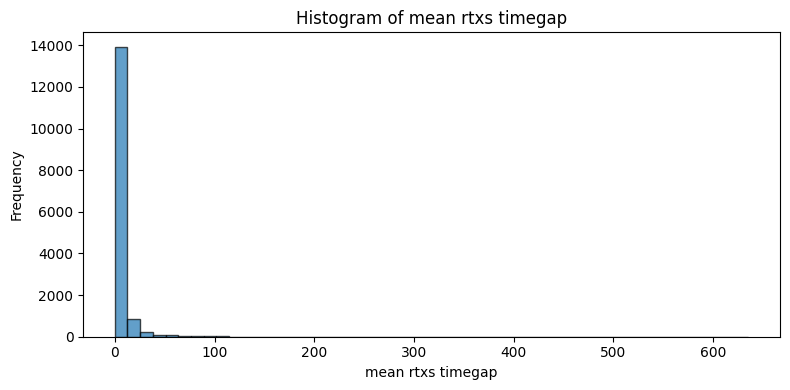

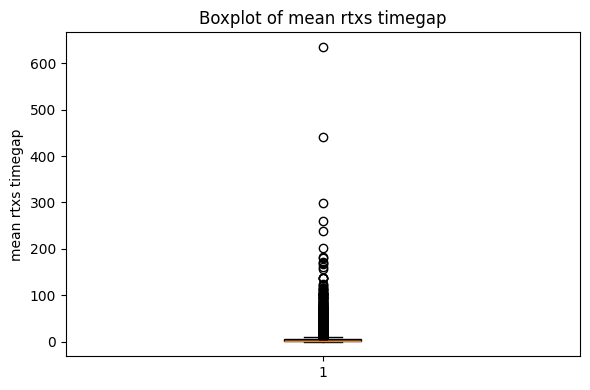

Processing feature: mean spent


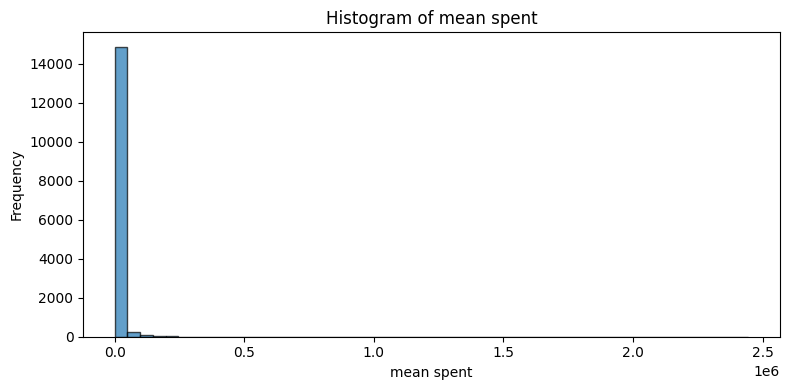

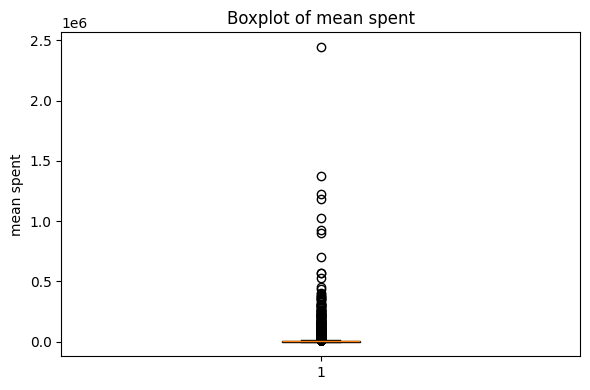

Processing feature: mean stxs amountdiff


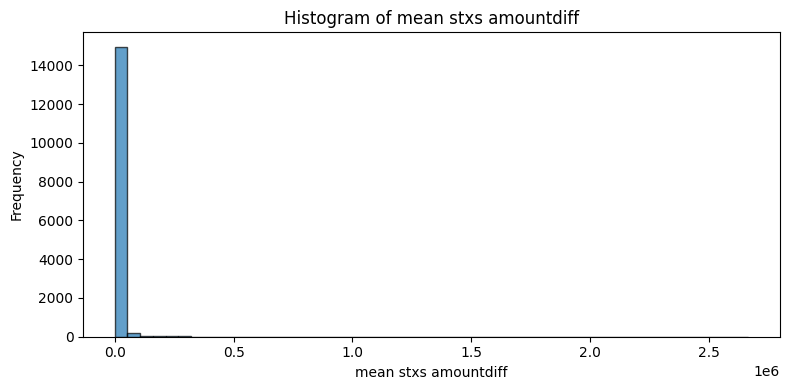

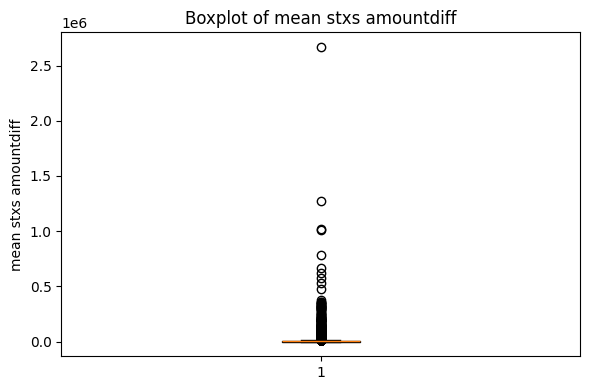

Processing feature: mean stxs timegap


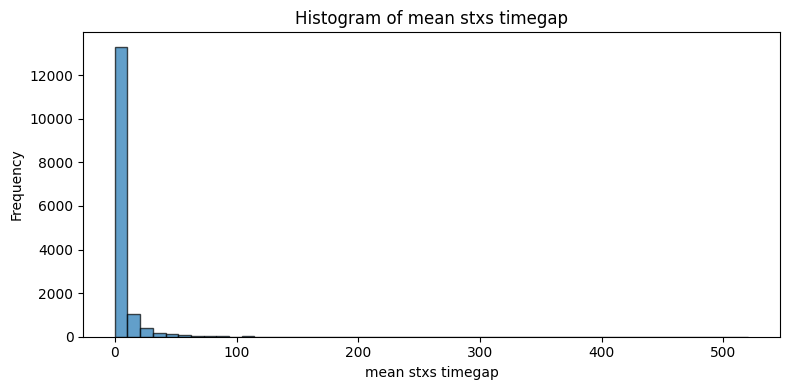

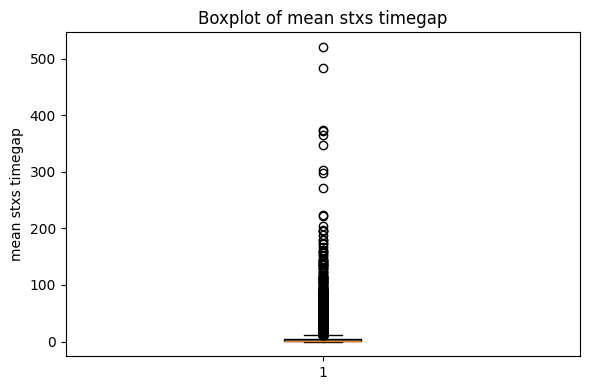

Processing feature: mean txs amountdiff


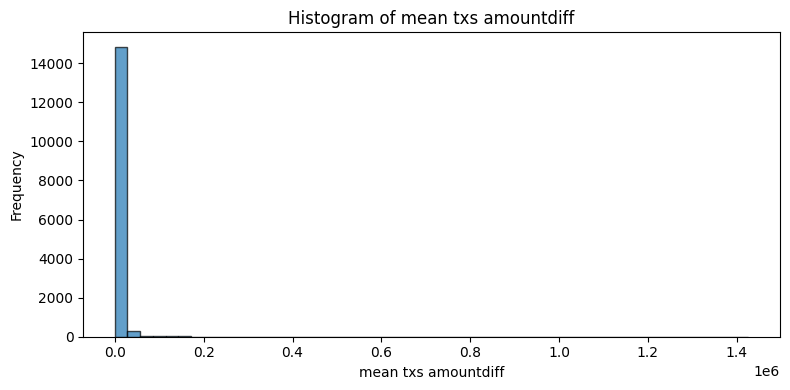

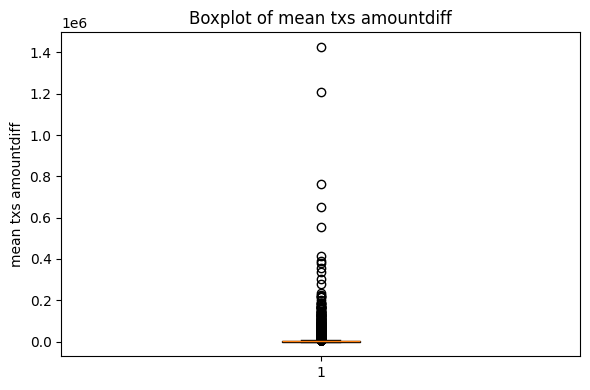

Processing feature: mean txs timegap


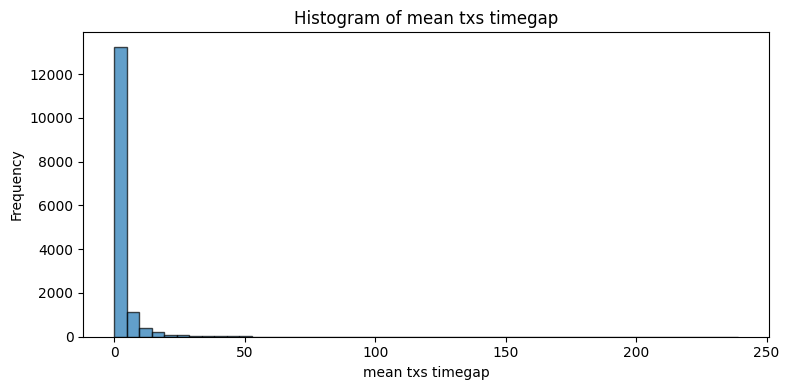

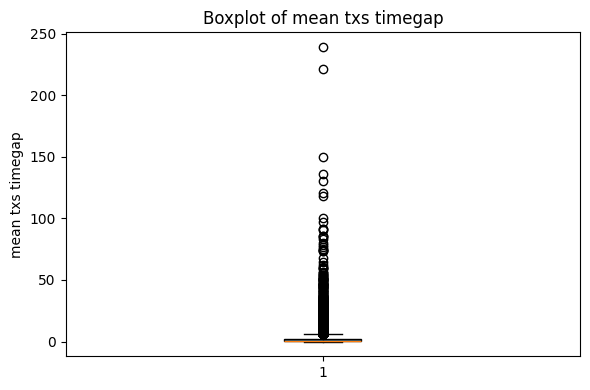

Processing feature: member Jaccard


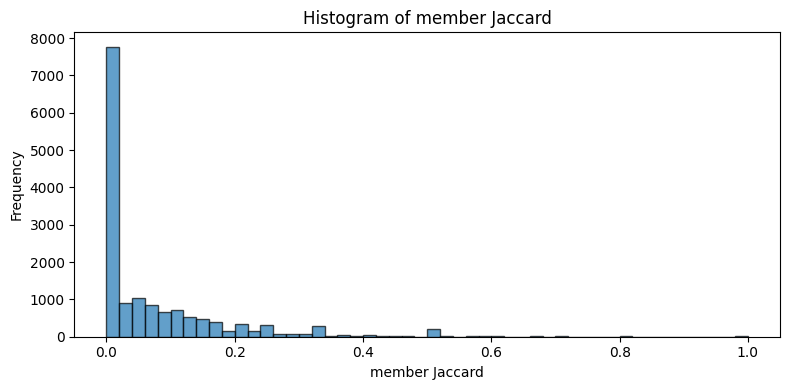

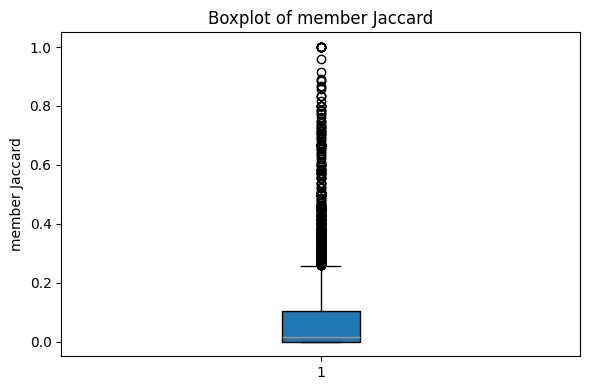

Processing feature: min receive


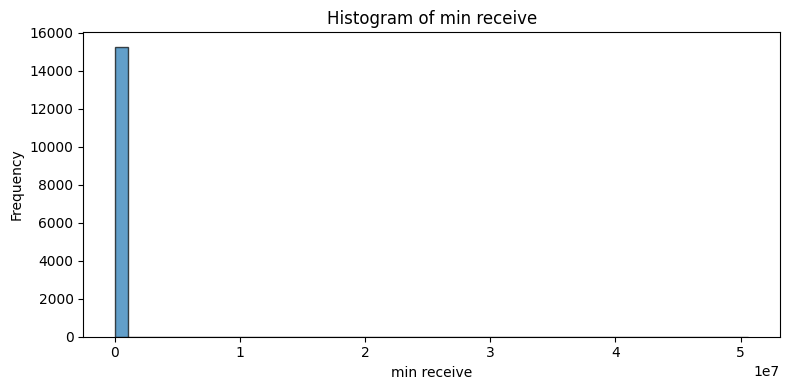

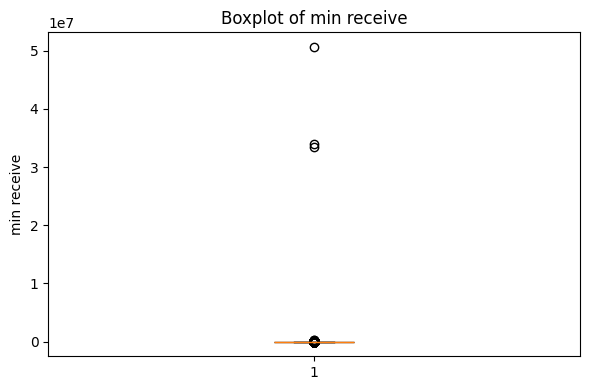

Processing feature: min rtxs amountdiff


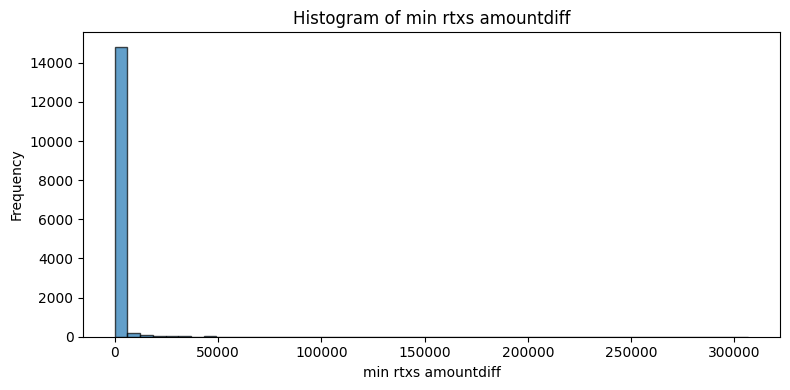

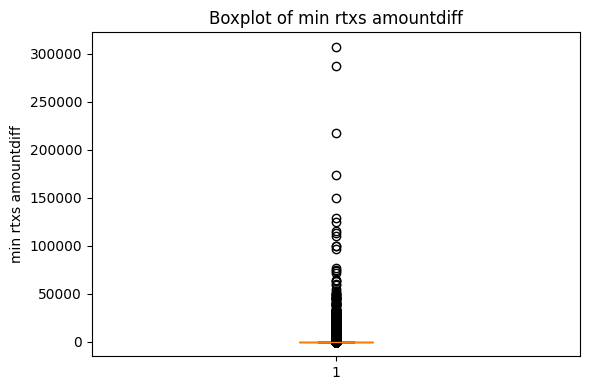

Processing feature: min rtxs timegap


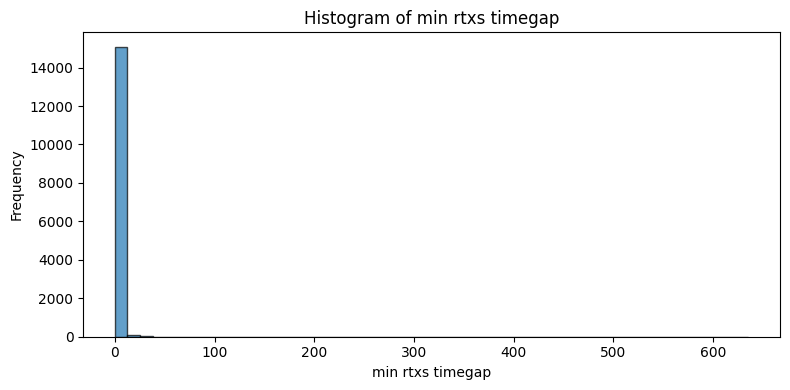

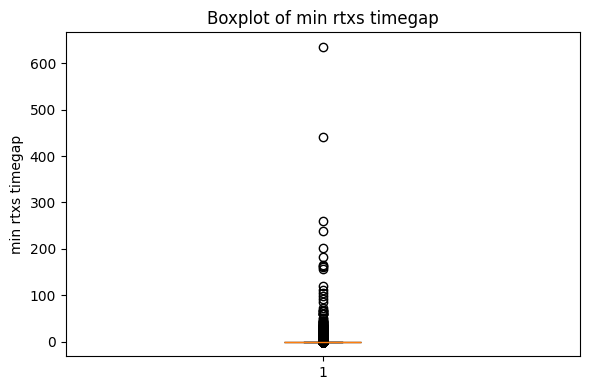

Processing feature: min spent


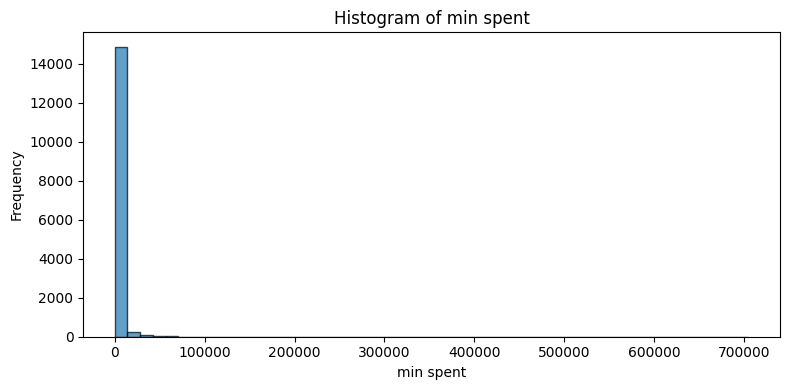

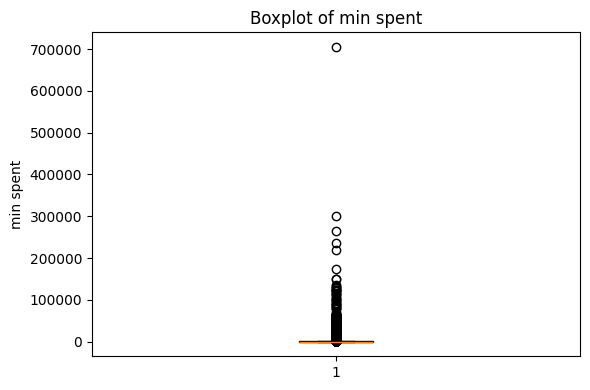

Processing feature: min stxs amountdiff


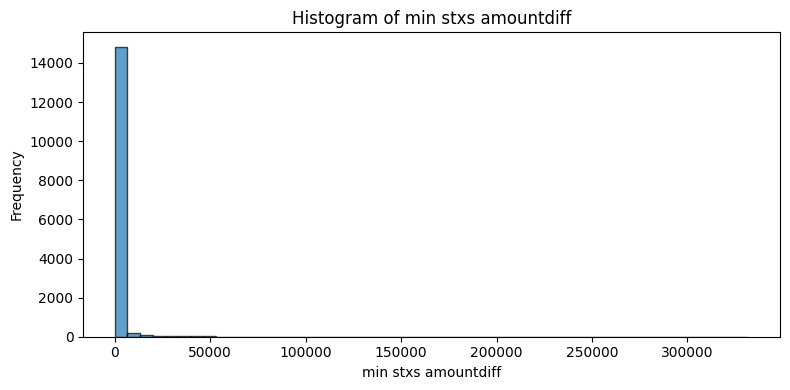

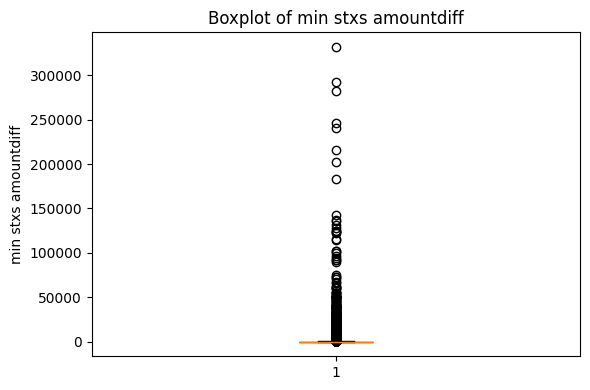

Processing feature: min stxs timegap


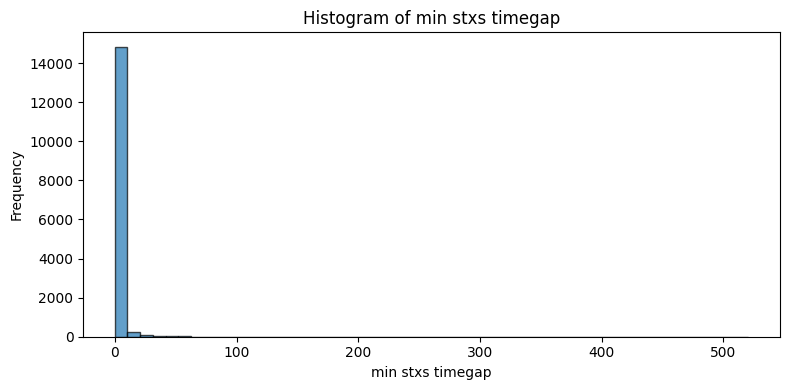

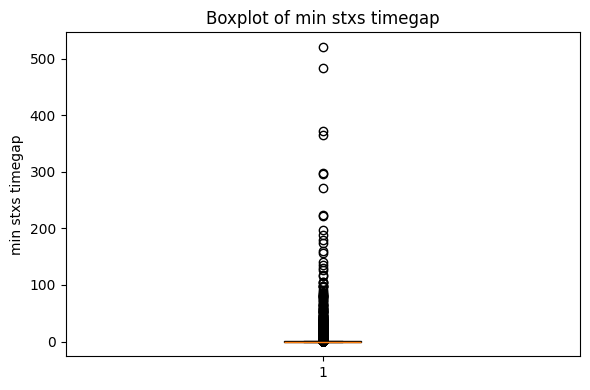

Processing feature: min txs amountdiff


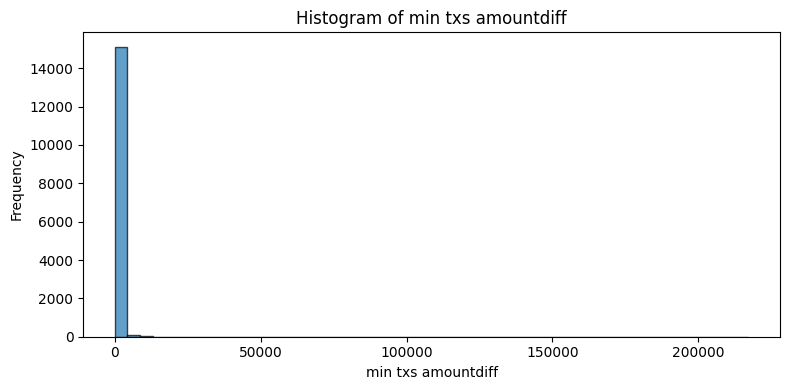

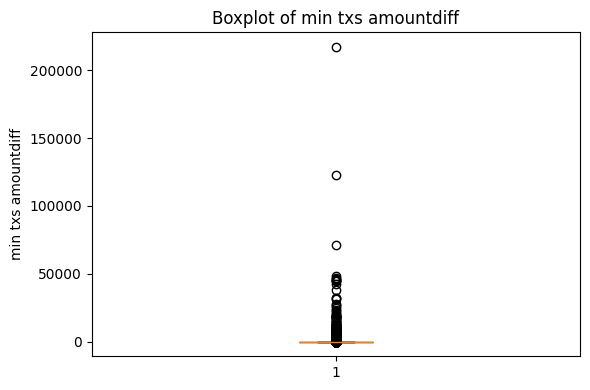

Processing feature: min txs timegap


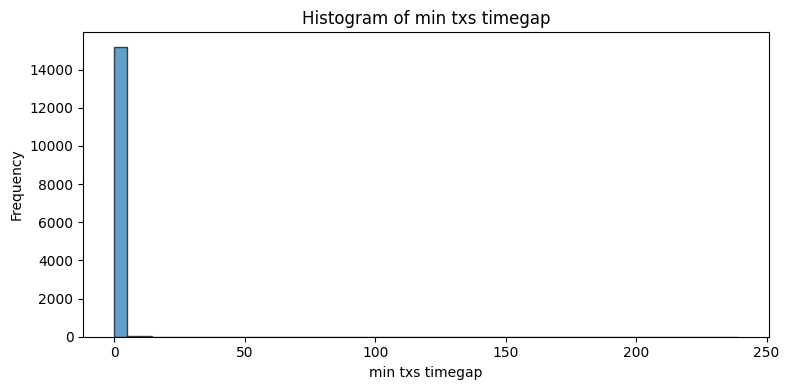

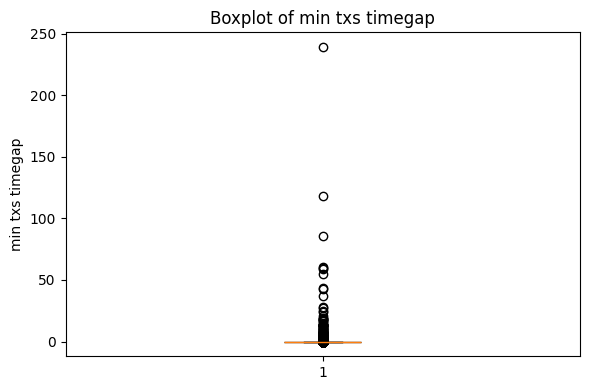

Processing feature: receive member


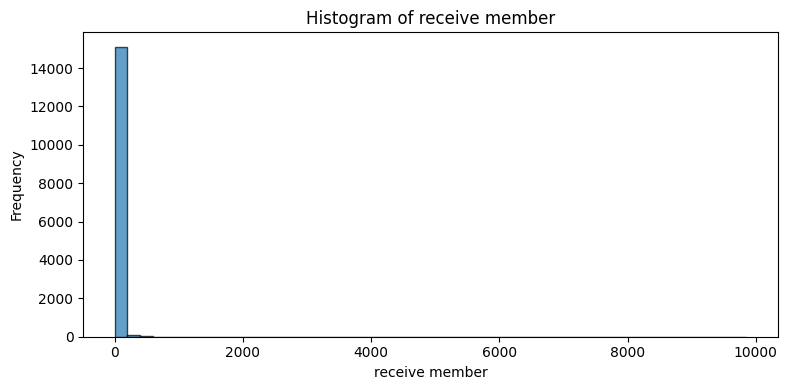

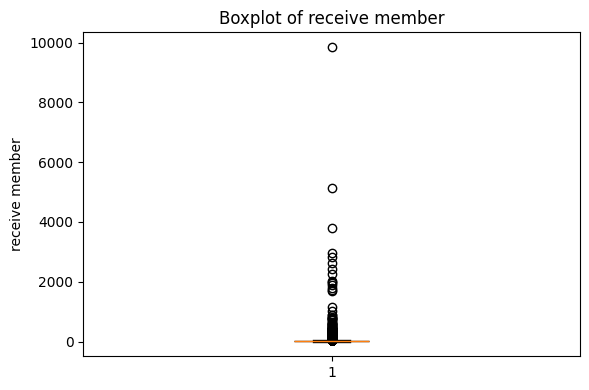

Processing feature: receive txs


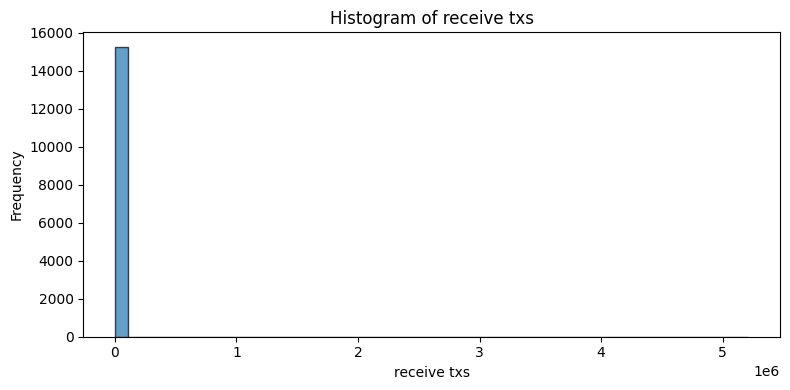

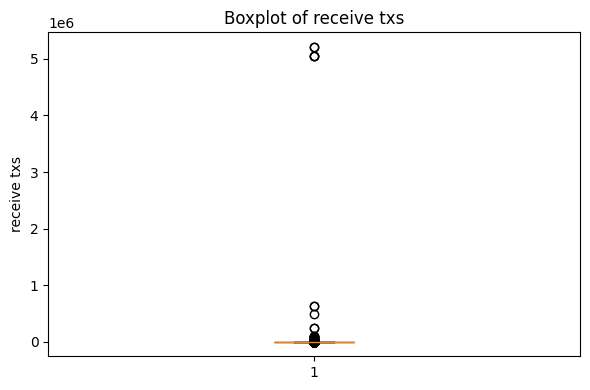

Processing feature: rm1


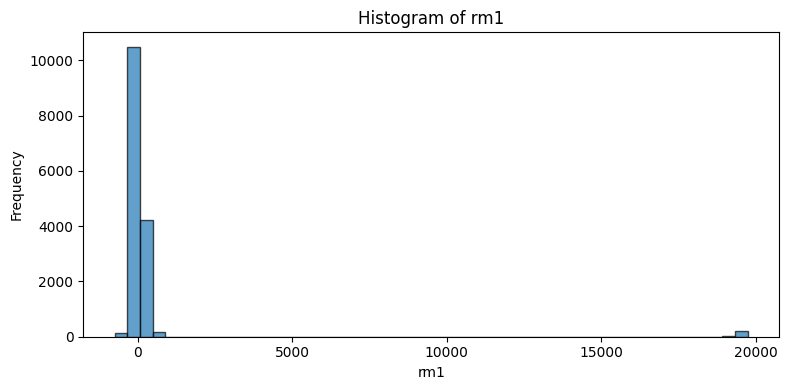

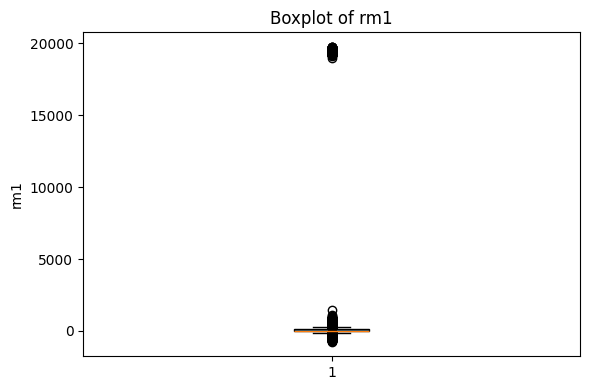

Processing feature: rm2


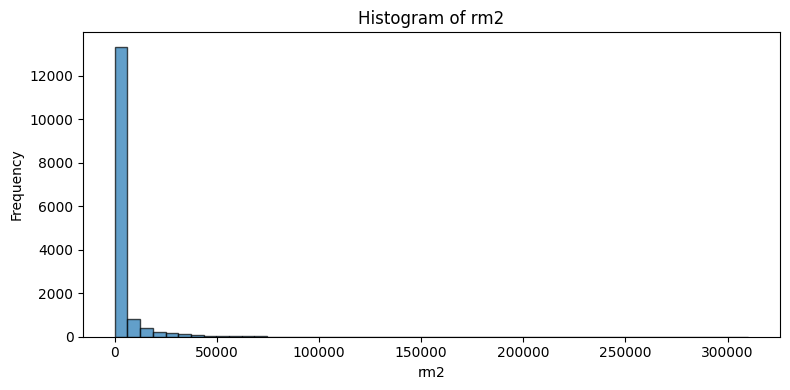

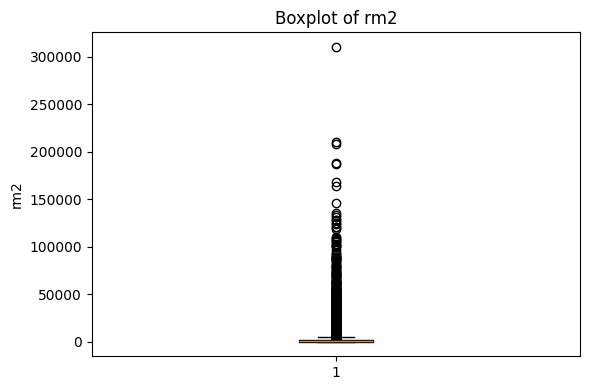

Processing feature: rm3


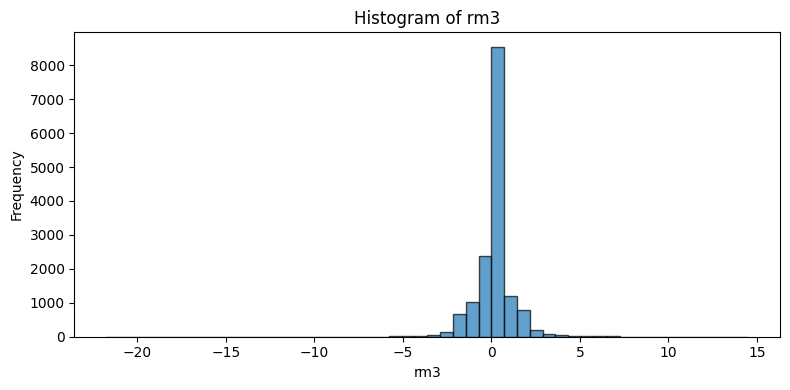

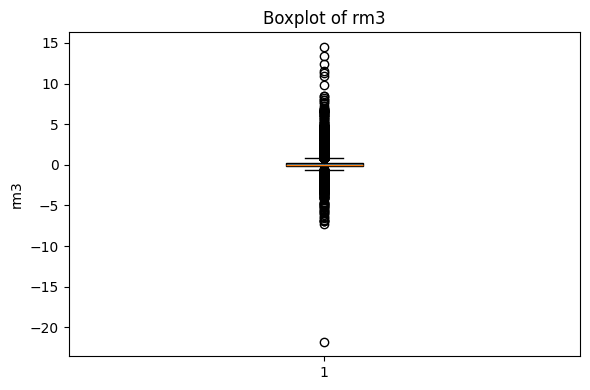

Processing feature: rm4


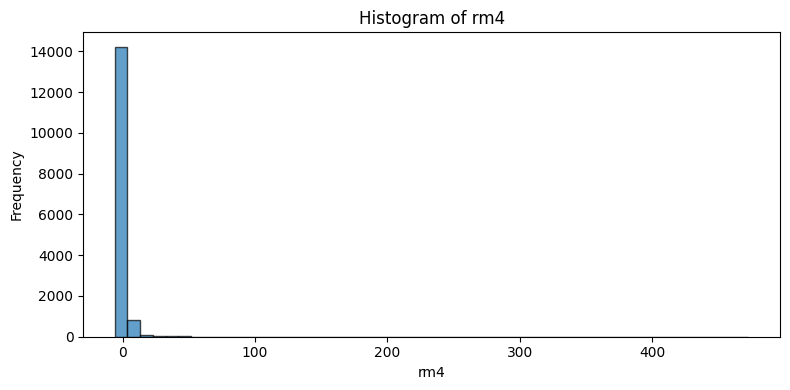

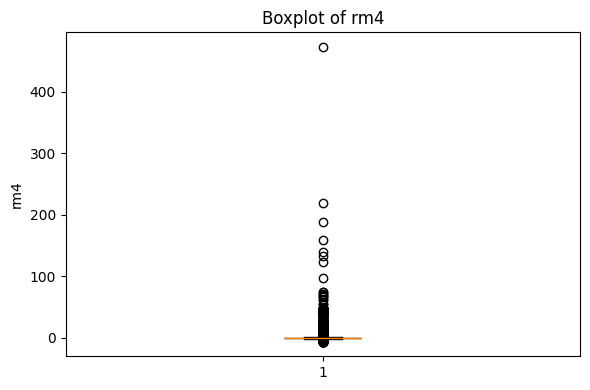

Processing feature: sm1


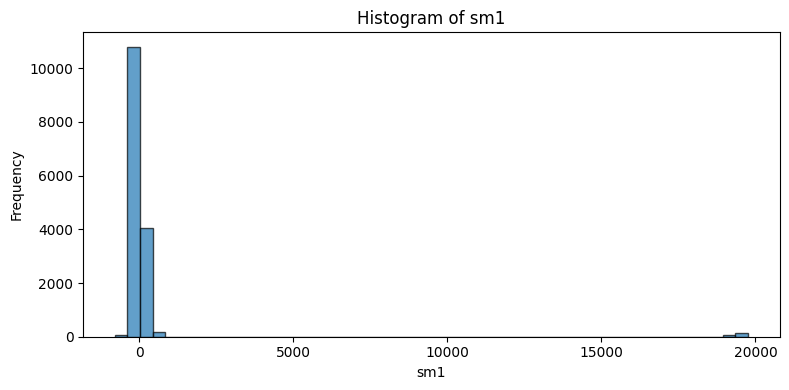

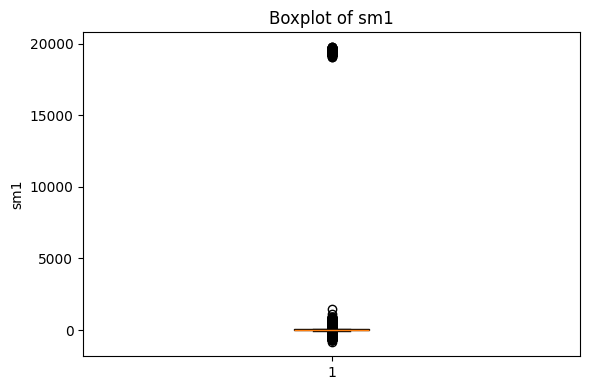

Processing feature: sm2


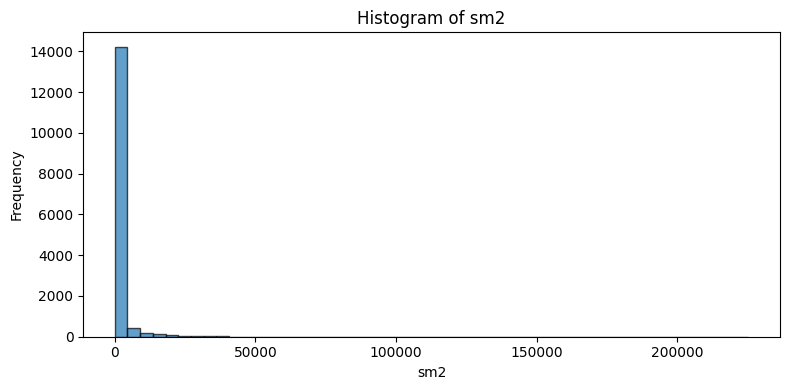

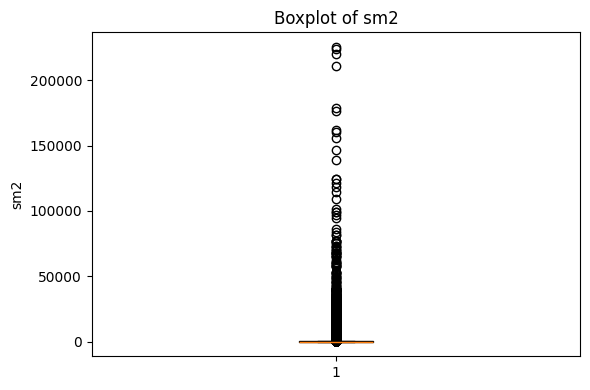

Processing feature: sm3


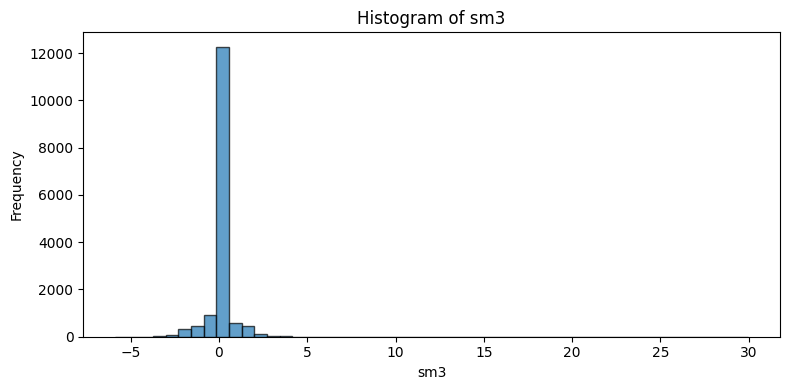

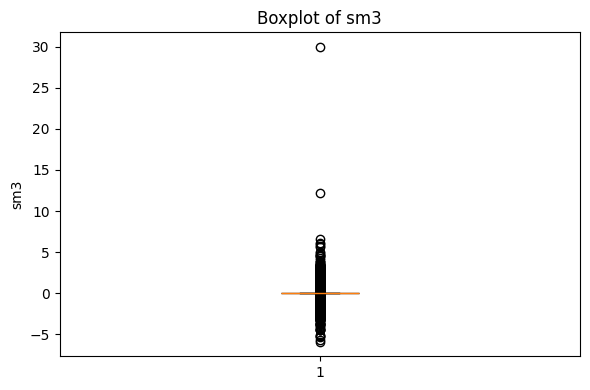

Processing feature: sm4


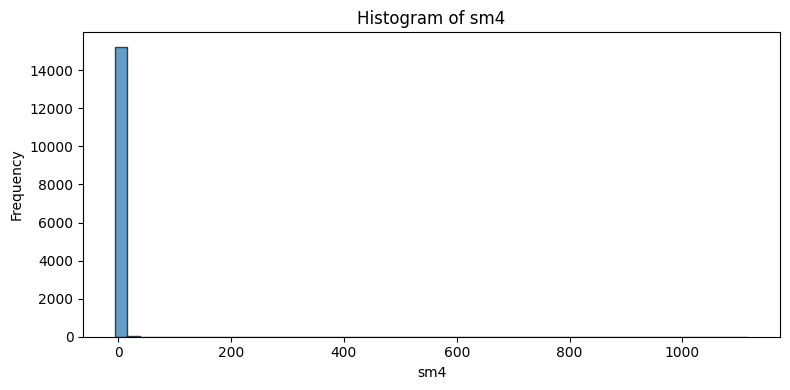

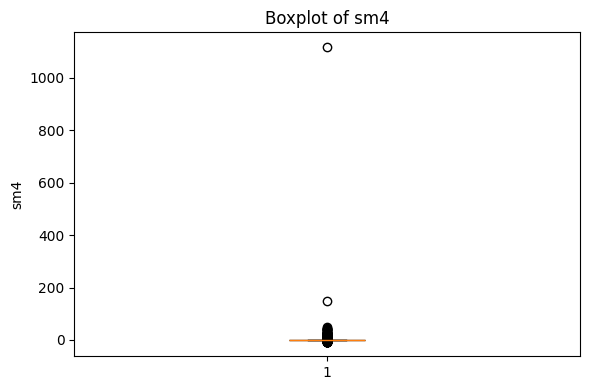

Processing feature: spent member


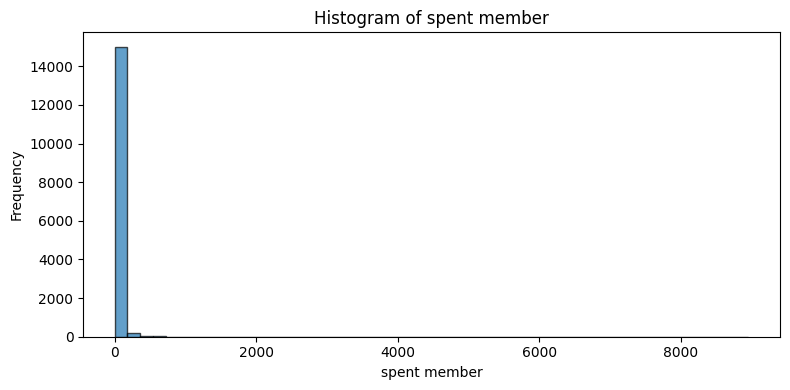

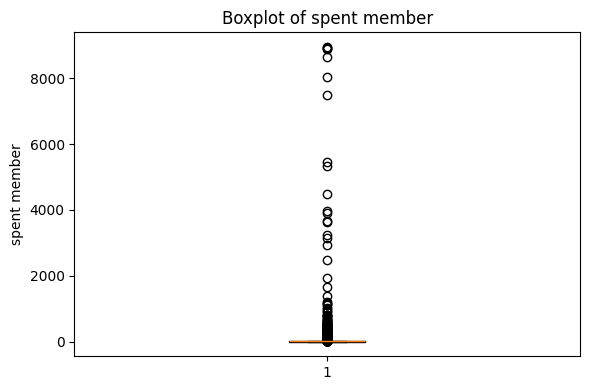

Processing feature: spent txs


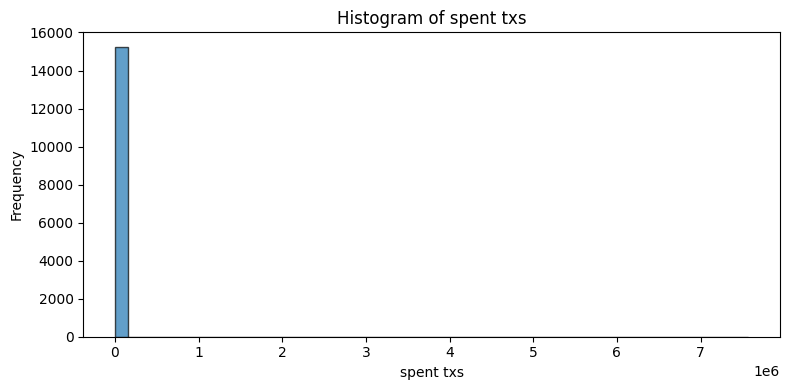

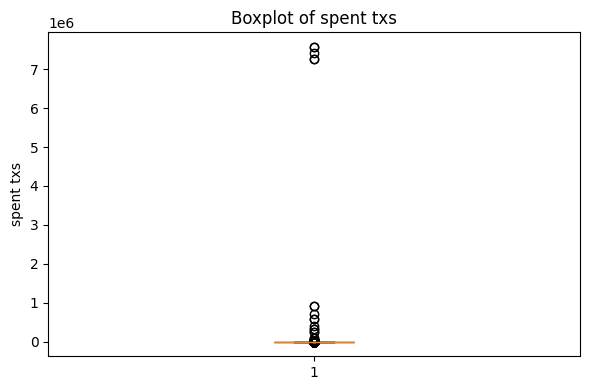

Processing feature: tm1


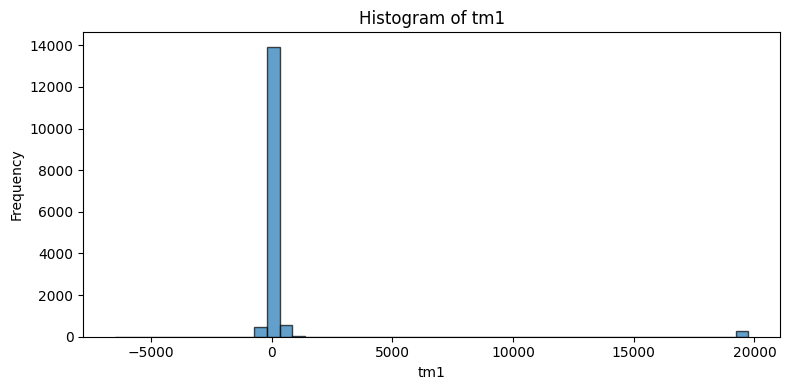

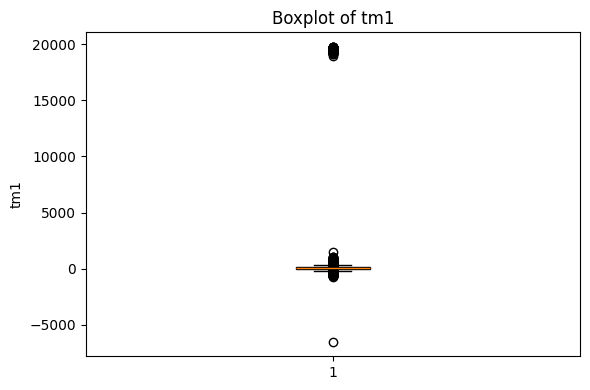

Processing feature: tm2


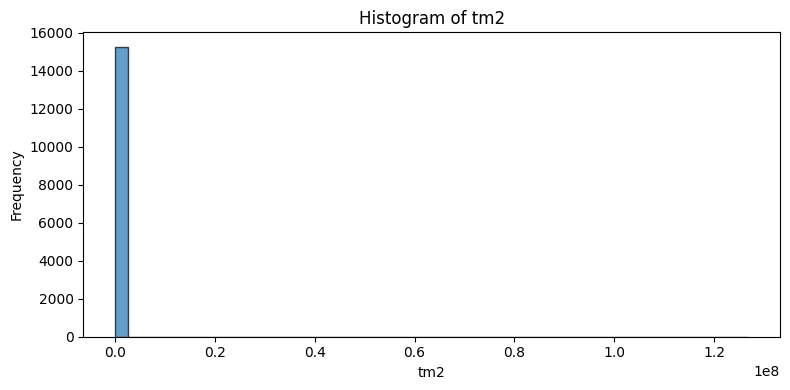

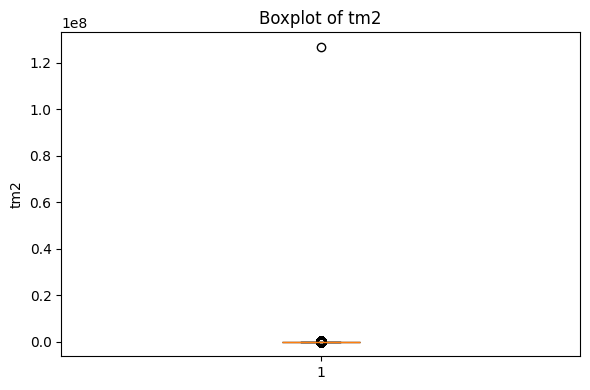

Processing feature: tm3


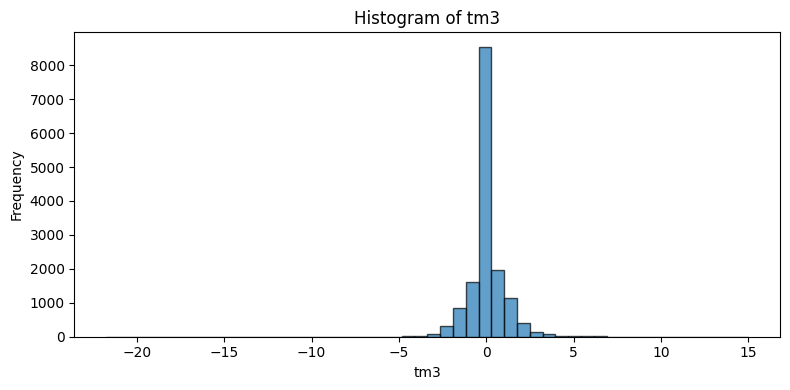

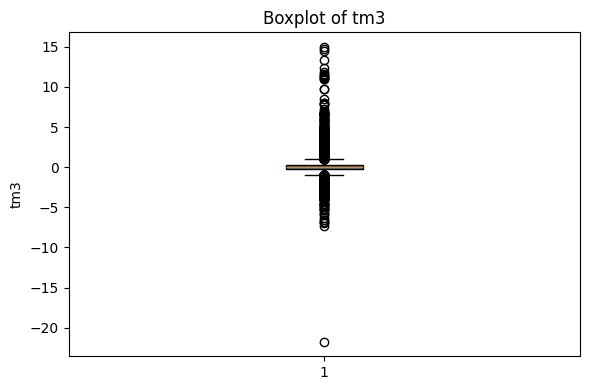

Processing feature: tm4


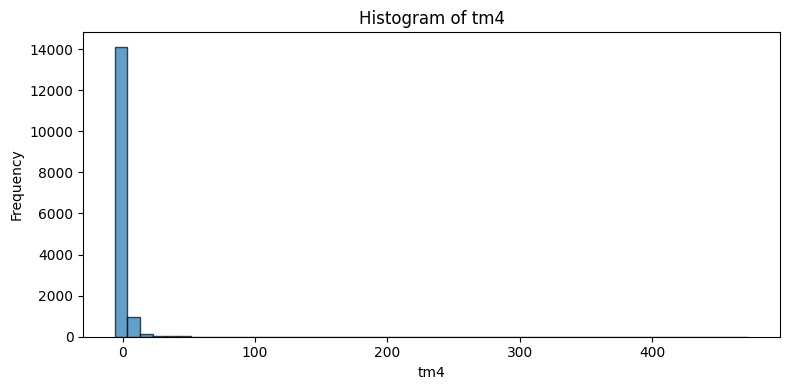

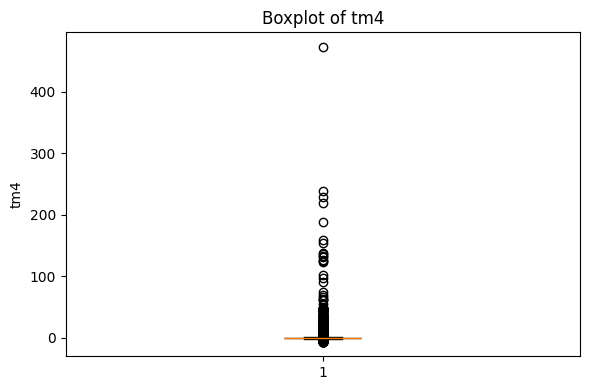

Processing feature: total receive


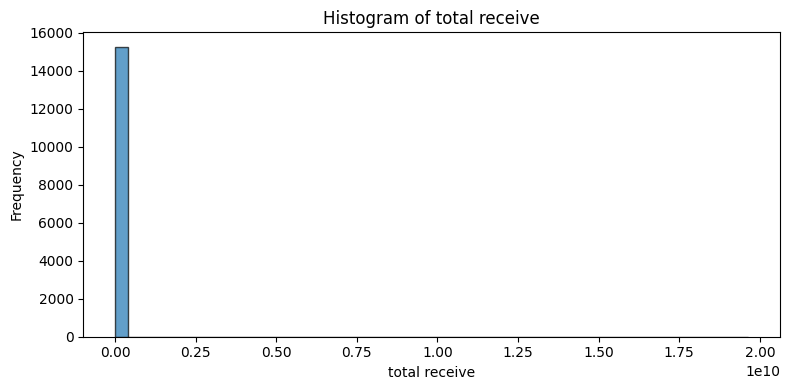

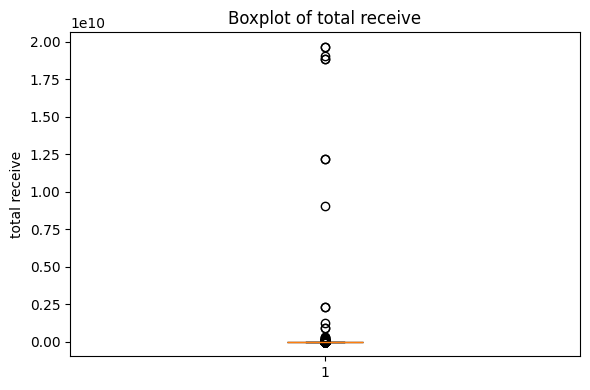

Processing feature: total spent


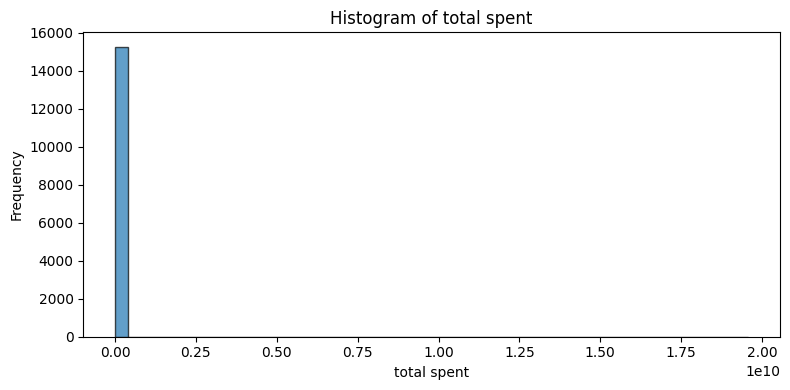

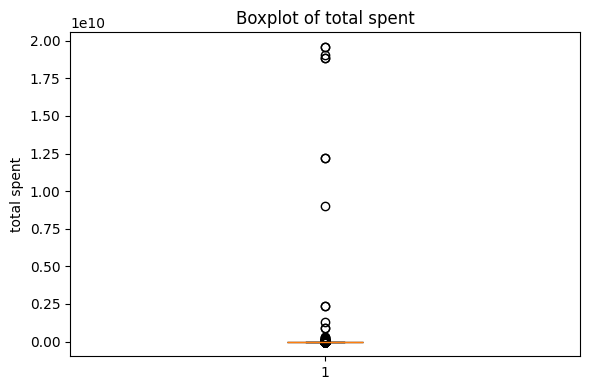

Processing feature: total txs


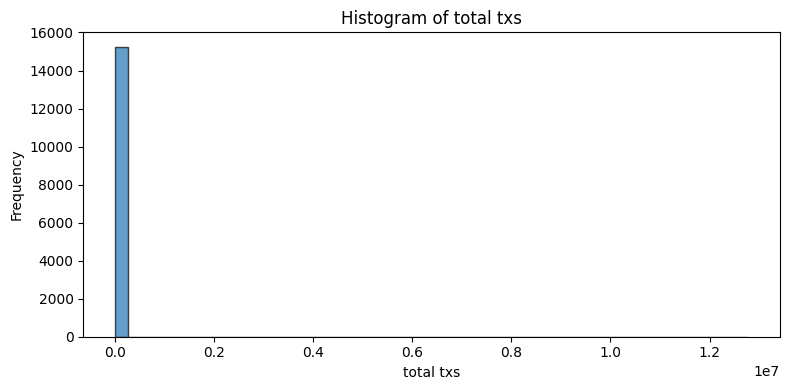

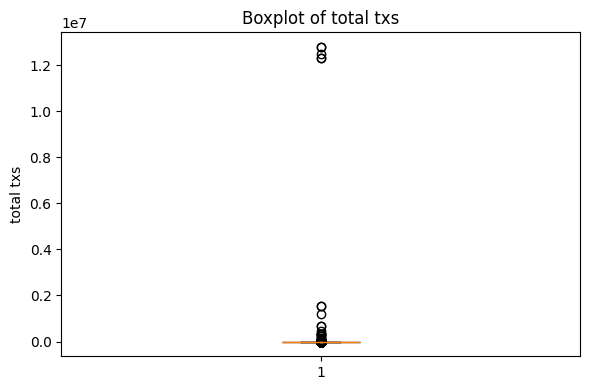

Processing feature: trx asset-stander receive txs


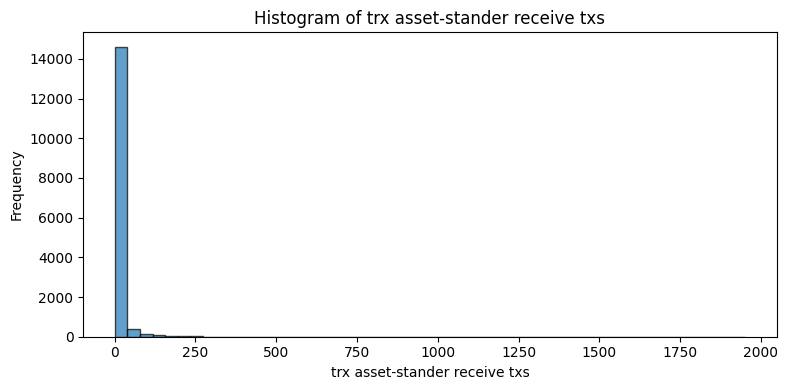

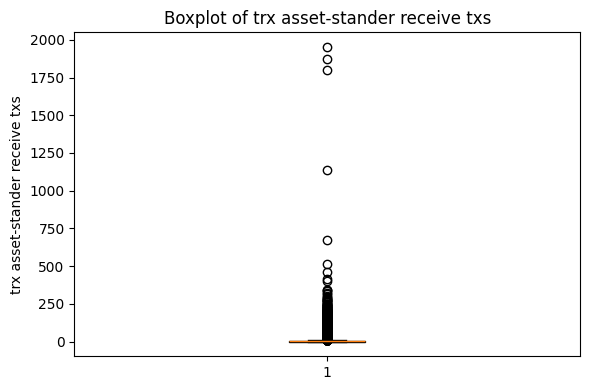

Processing feature: trx asset-stander spent txs


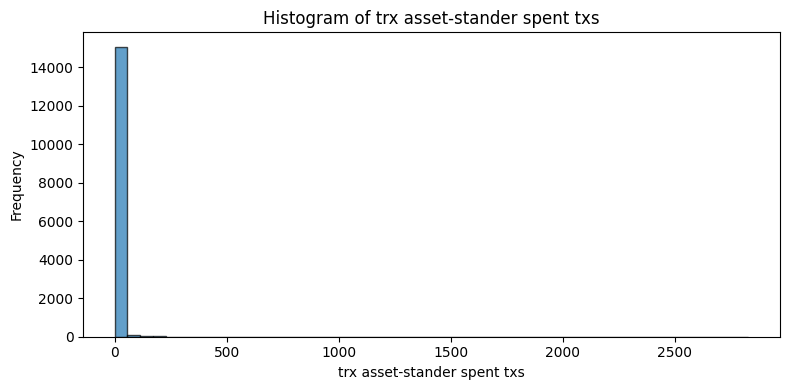

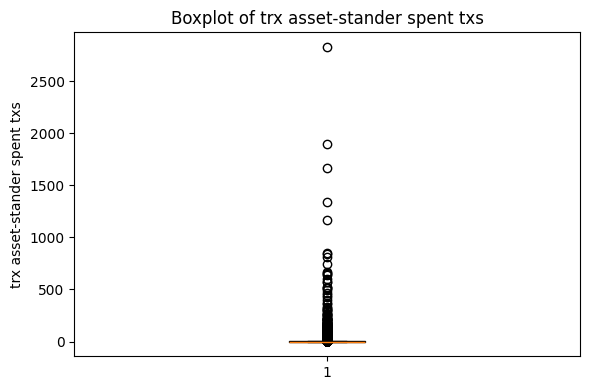

Processing feature: trx max receive


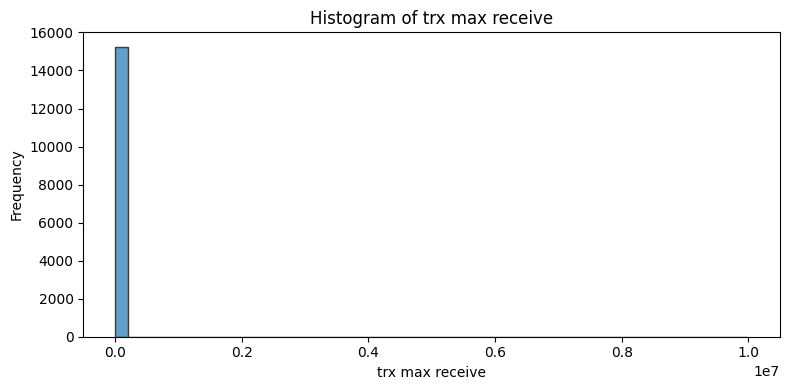

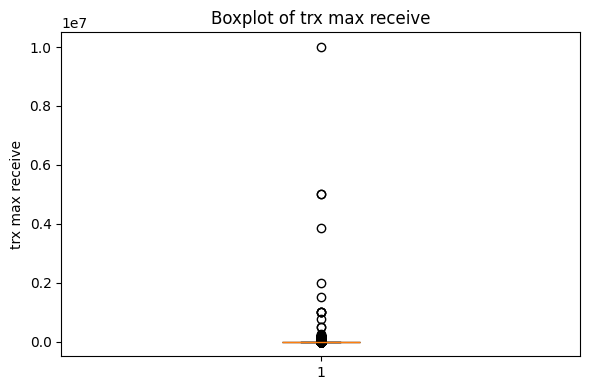

Processing feature: trx max rtxs amountdiff


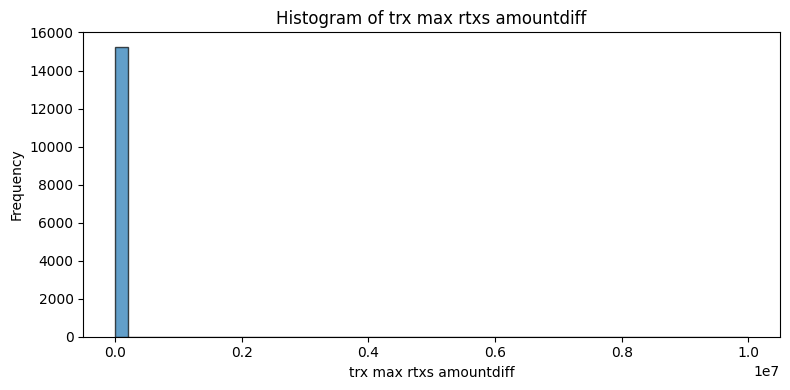

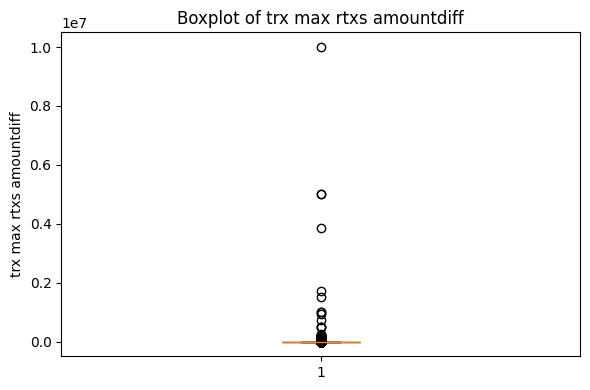

Processing feature: trx max rtxs timegap


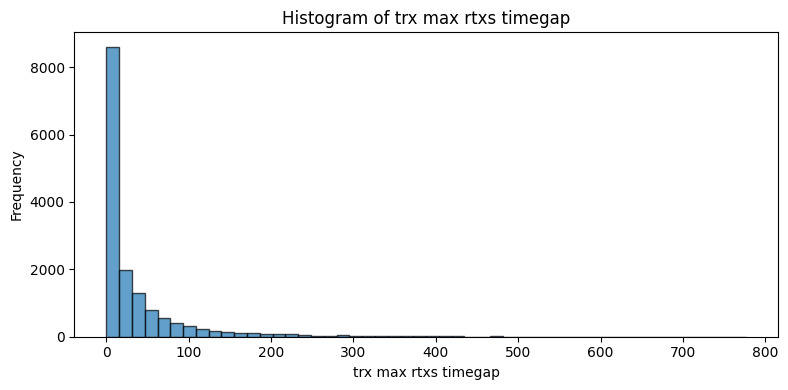

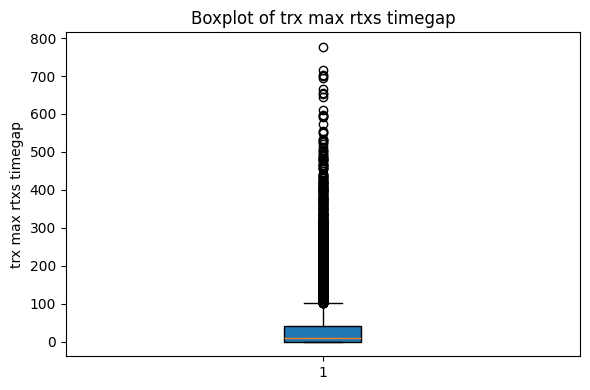

Processing feature: trx max spent


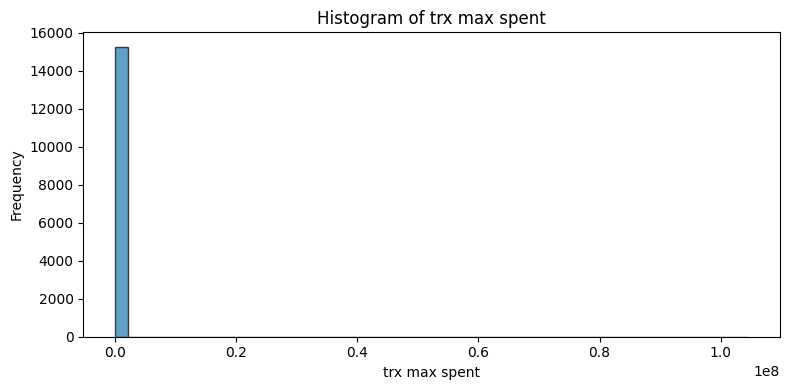

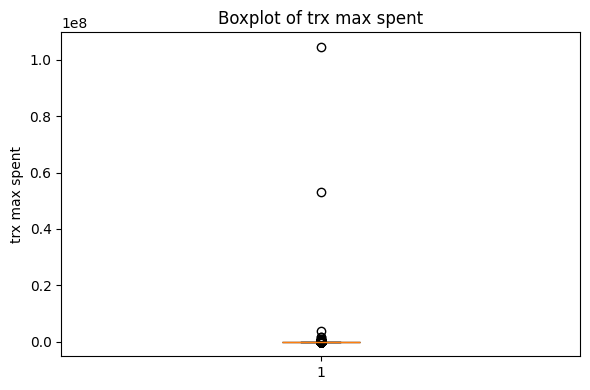

Processing feature: trx max stxs amountdiff


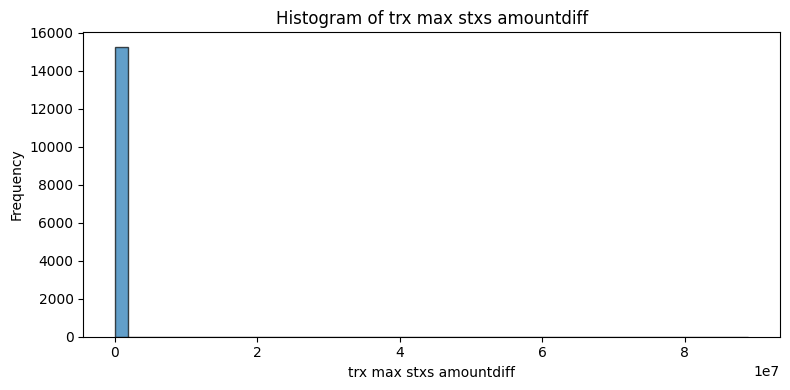

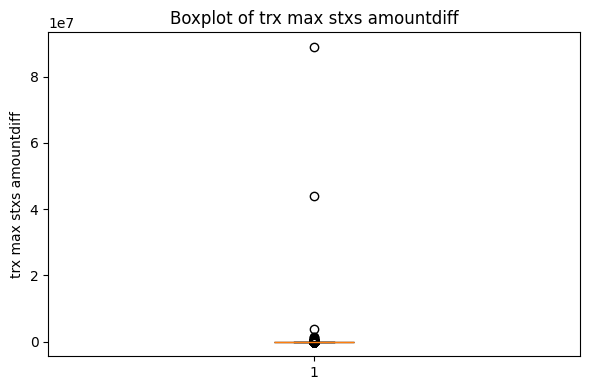

Processing feature: trx max stxs timegap


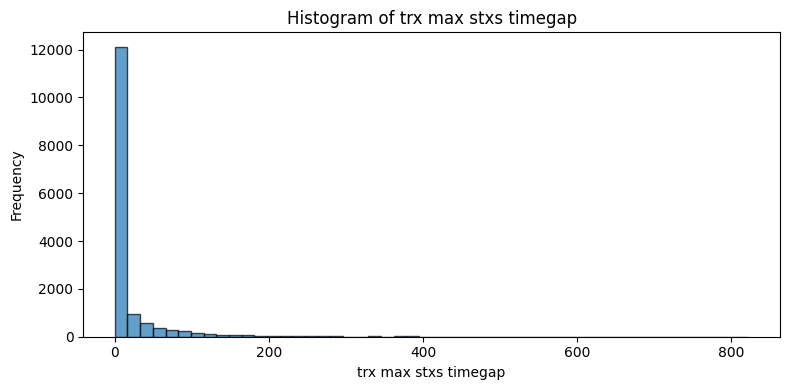

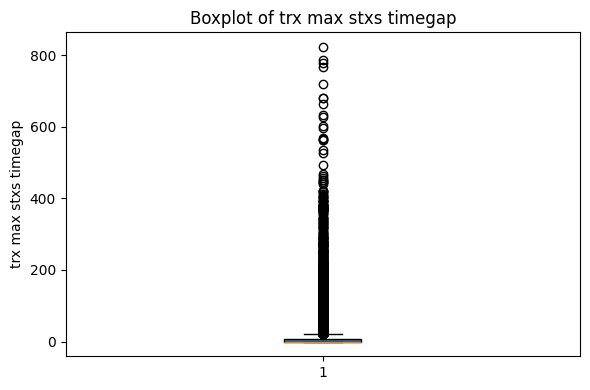

Processing feature: trx max txs amountdiff


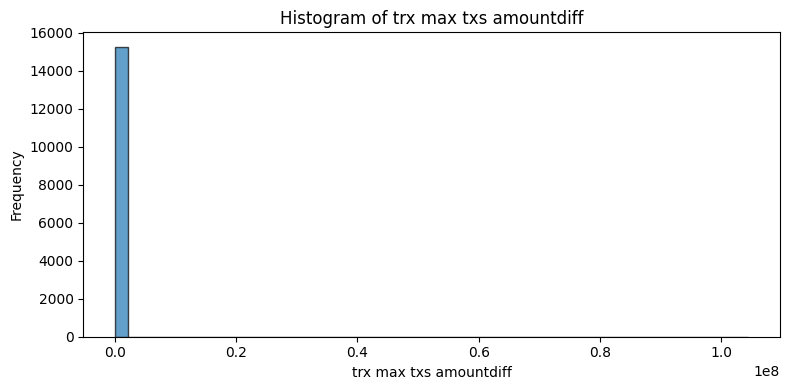

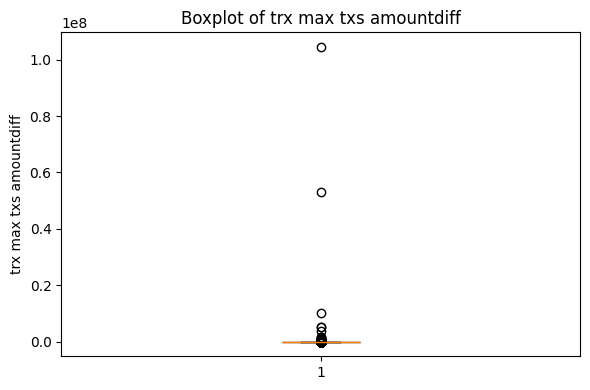

Processing feature: trx max txs timegap


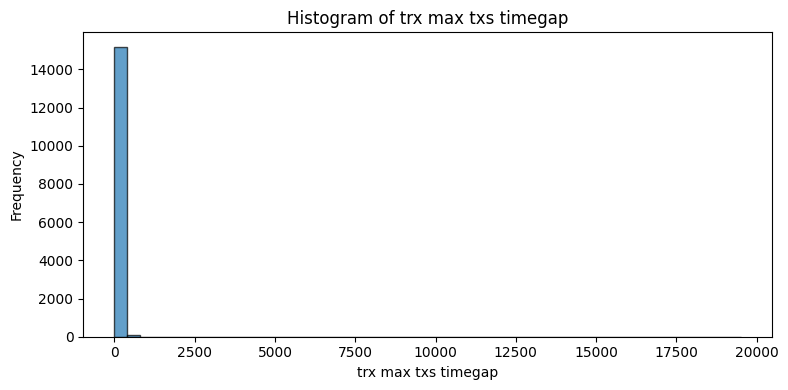

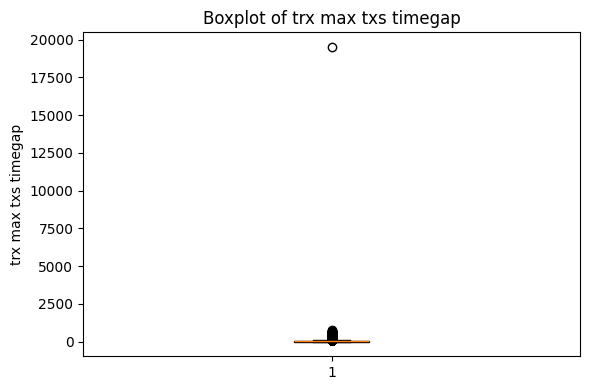

Processing feature: trx mean receive


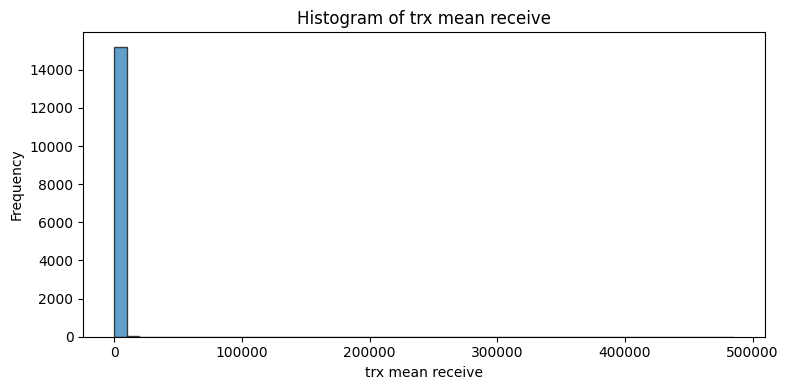

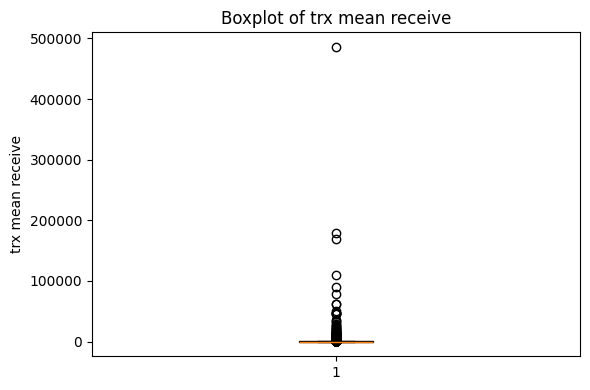

Processing feature: trx mean rtxs amountdiff


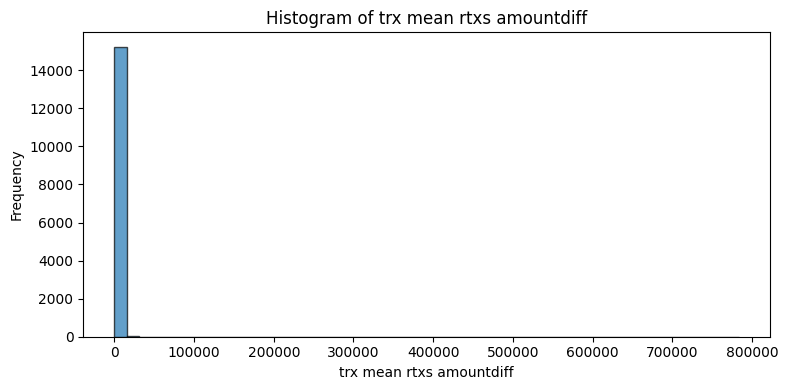

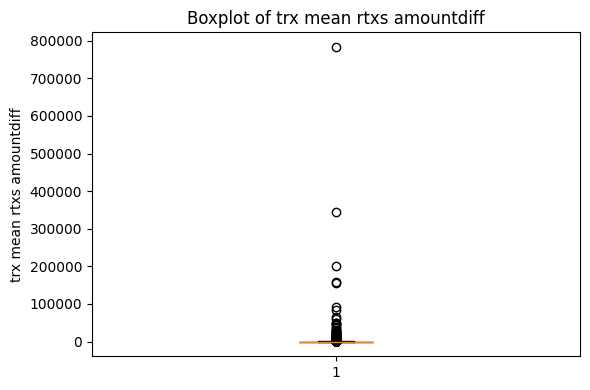

Processing feature: trx mean rtxs timegap


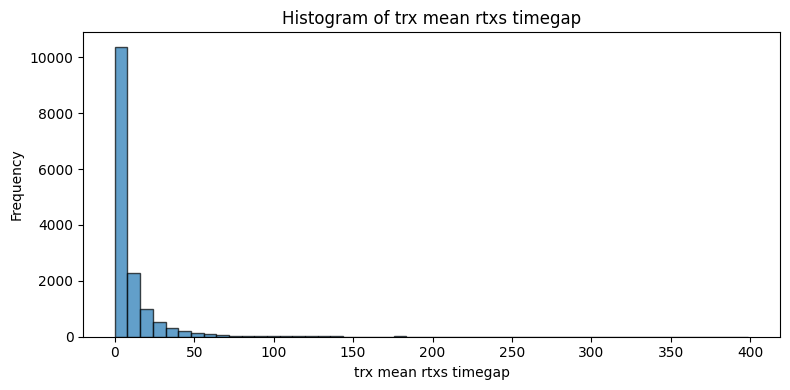

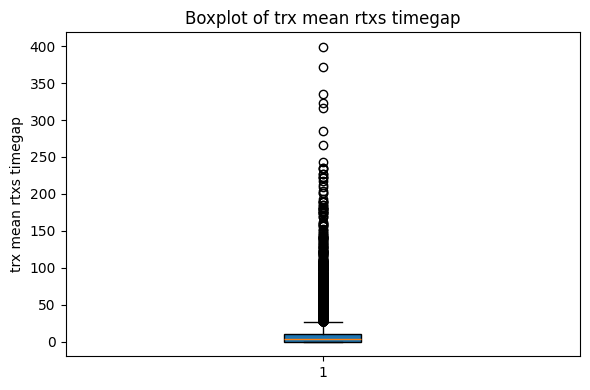

Processing feature: trx mean spent


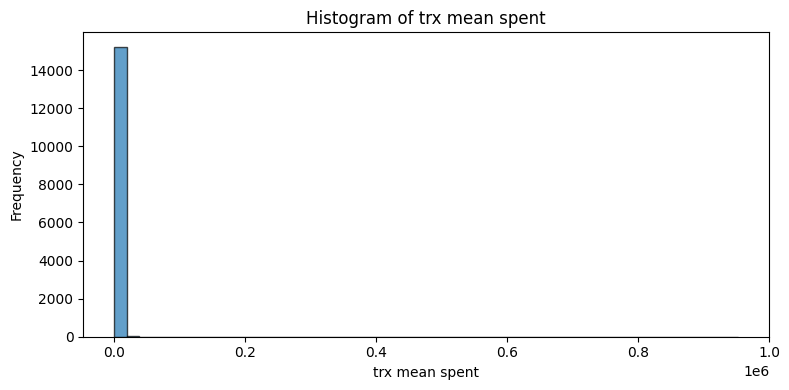

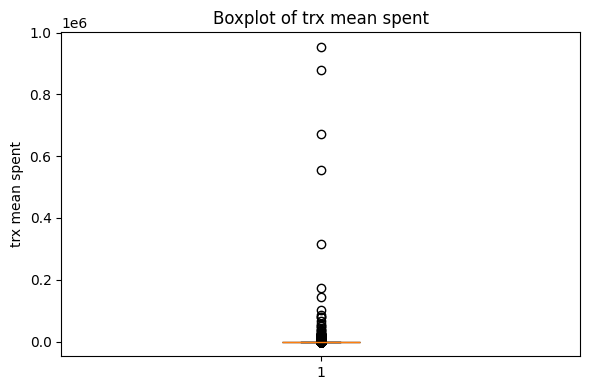

Processing feature: trx mean stxs amountdiff


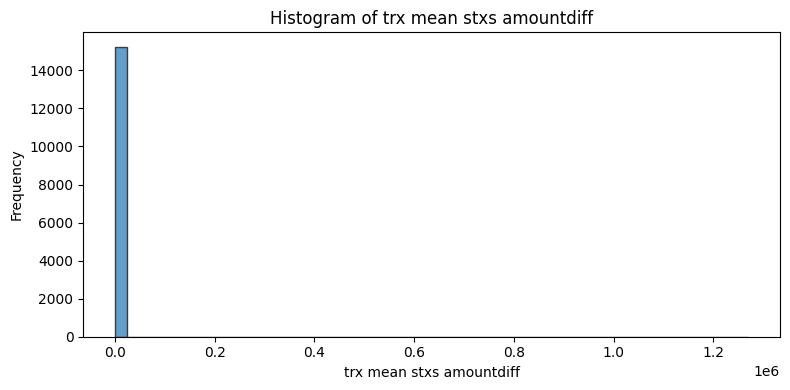

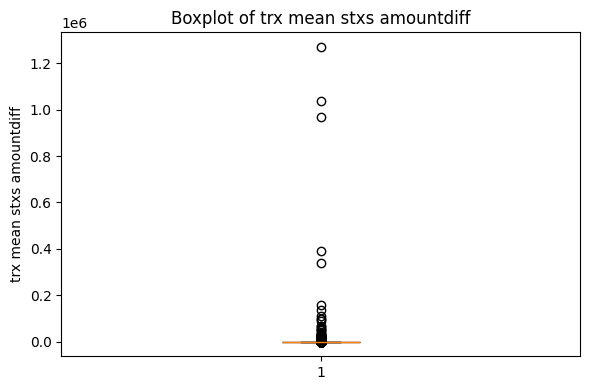

Processing feature: trx mean stxs timegap


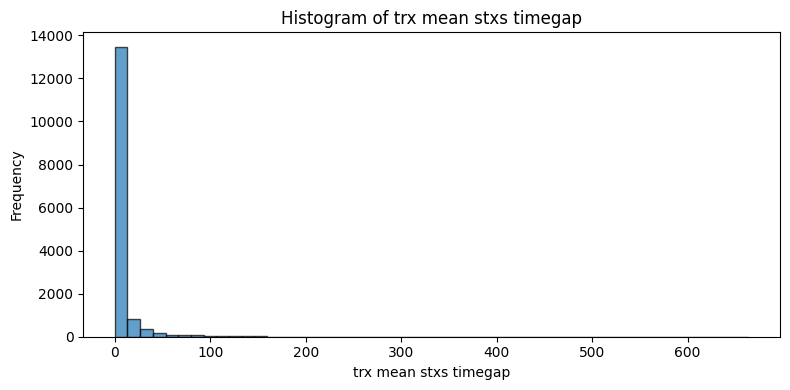

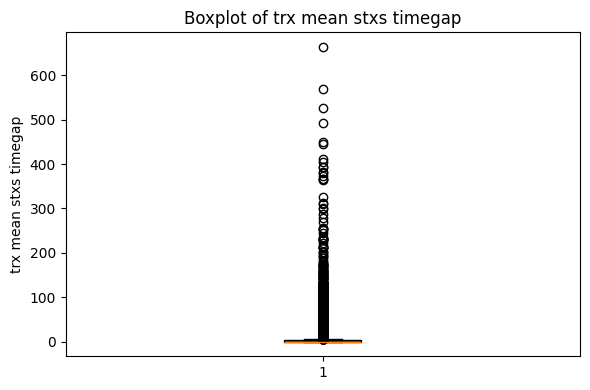

Processing feature: trx mean txs amountdiff


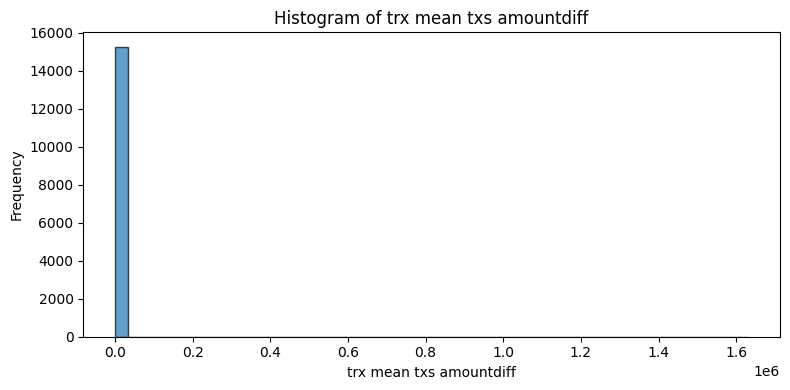

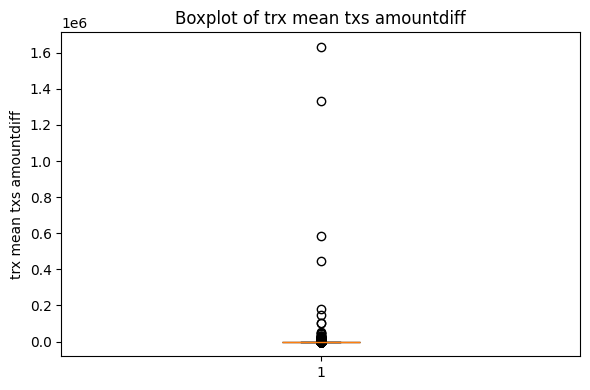

Processing feature: trx mean txs timegap


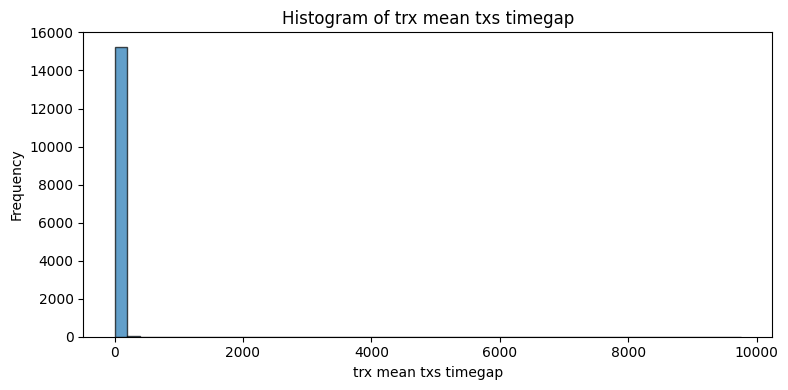

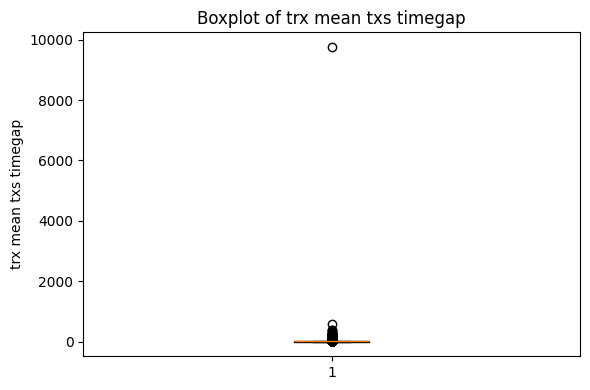

Processing feature: trx min receive


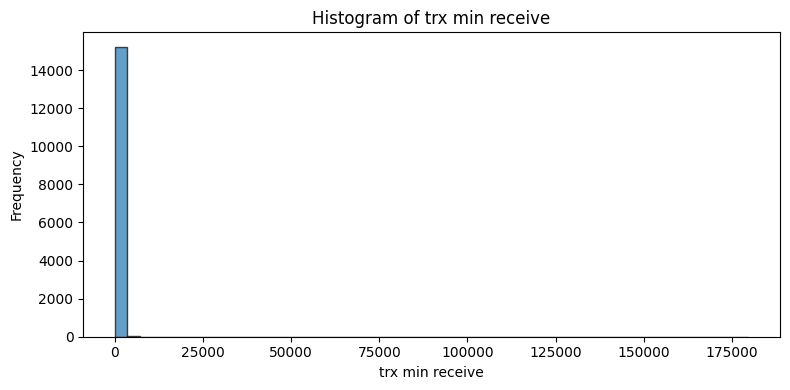

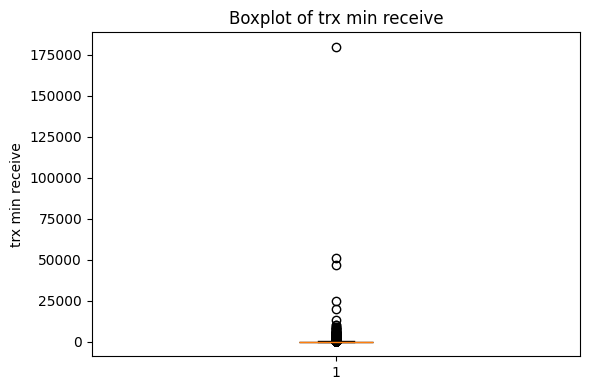

Processing feature: trx min rtxs amountdiff


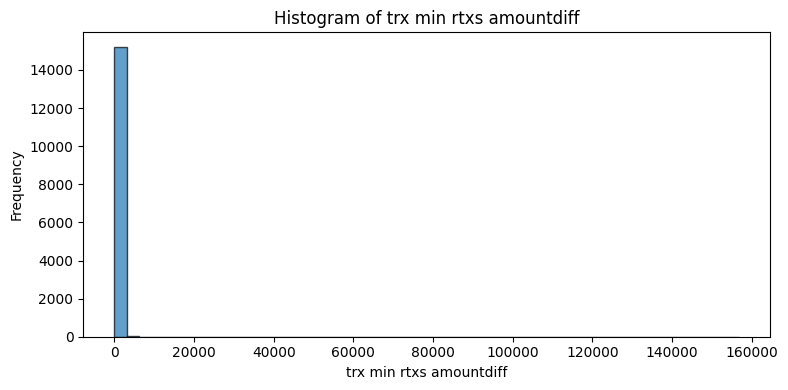

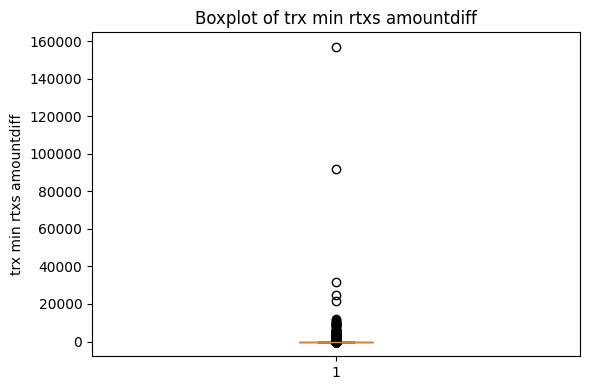

Processing feature: trx min rtxs timegap


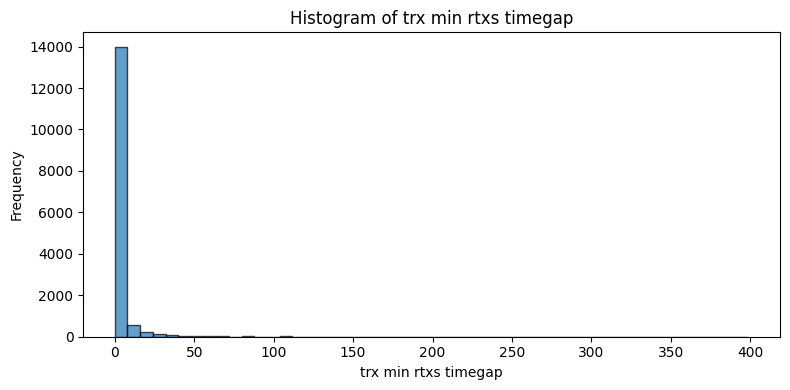

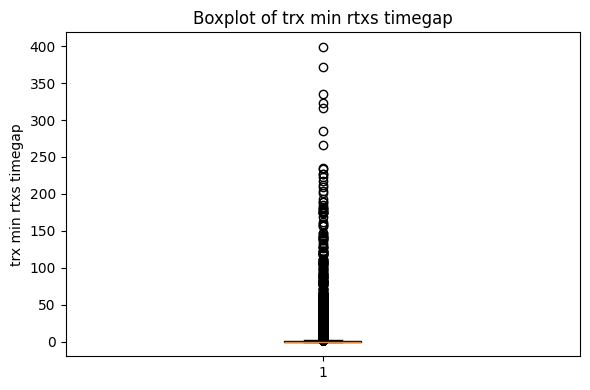

Processing feature: trx min spent


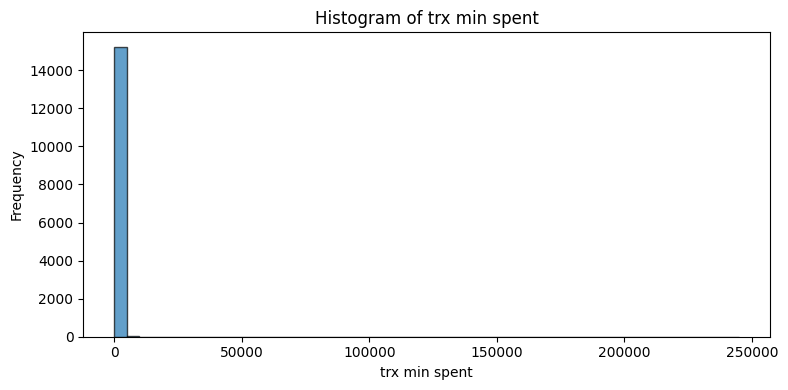

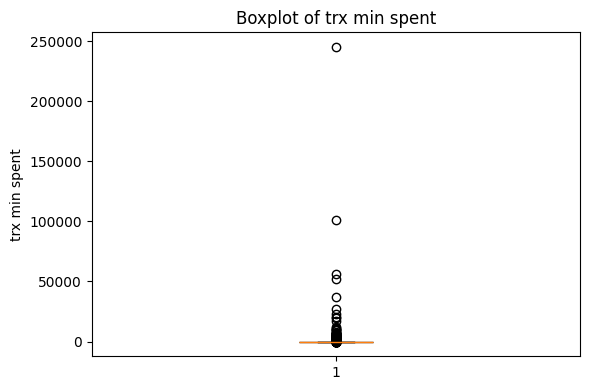

Processing feature: trx min stxs amountdiff


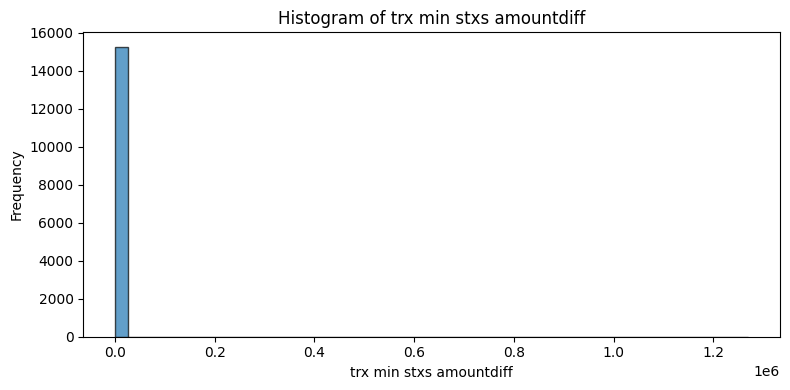

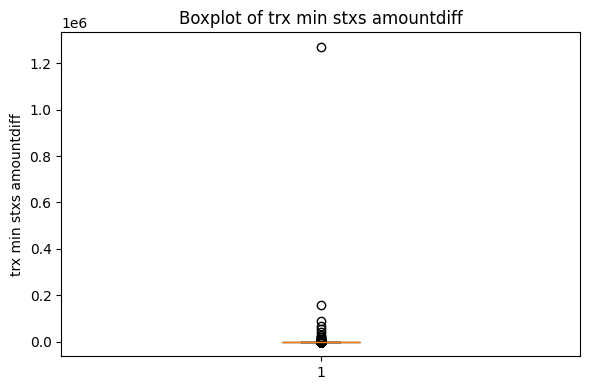

Processing feature: trx min stxs timegap


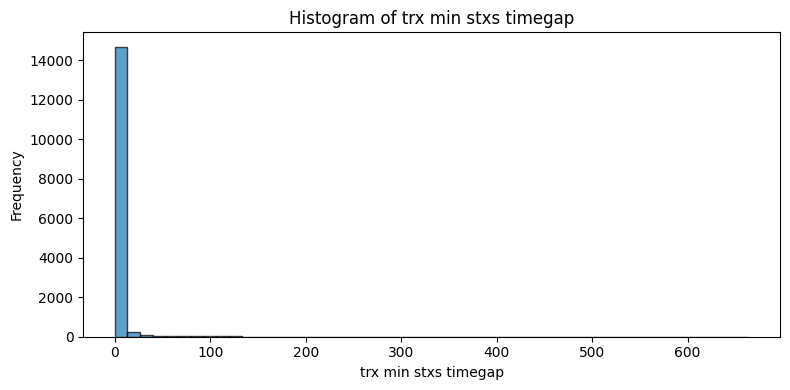

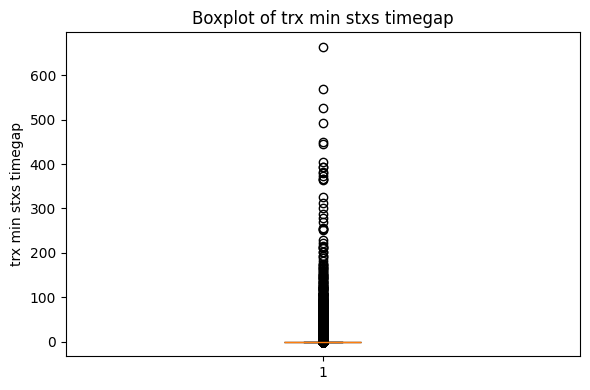

Processing feature: trx min txs amountdiff


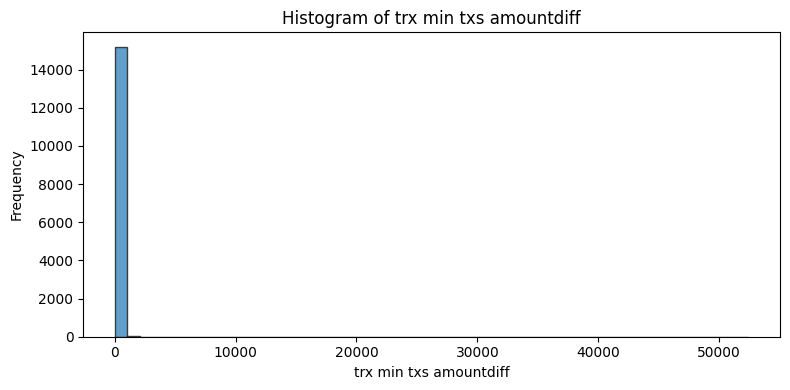

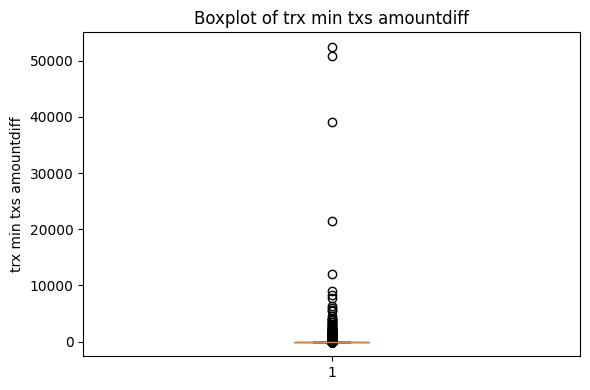

Processing feature: trx min txs timegap


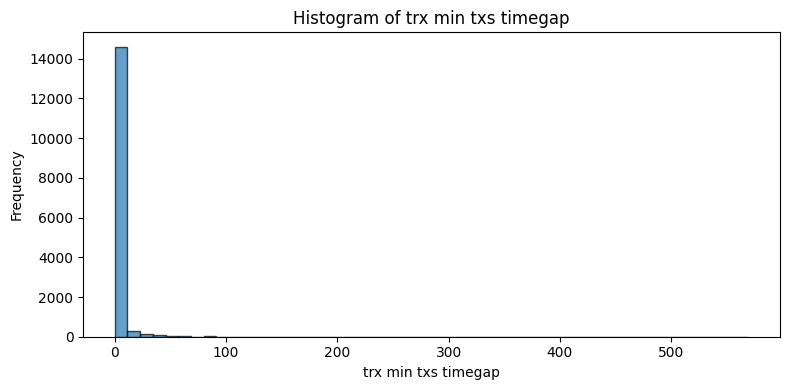

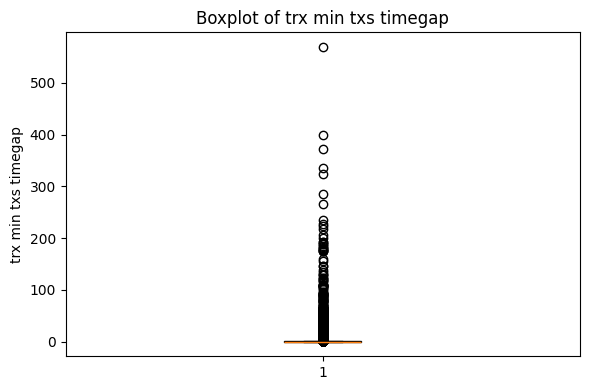

Processing feature: trx receive member


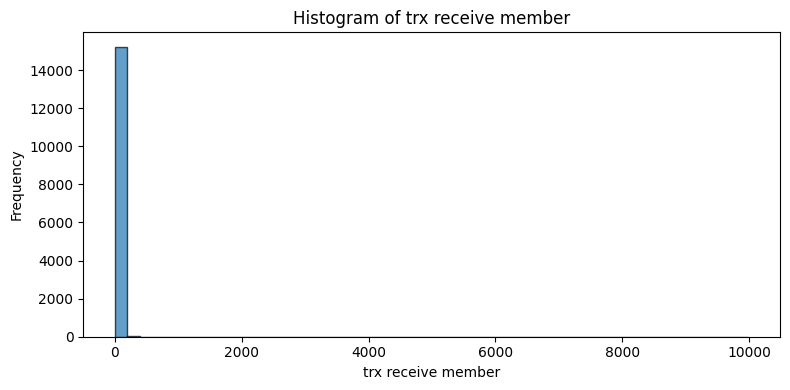

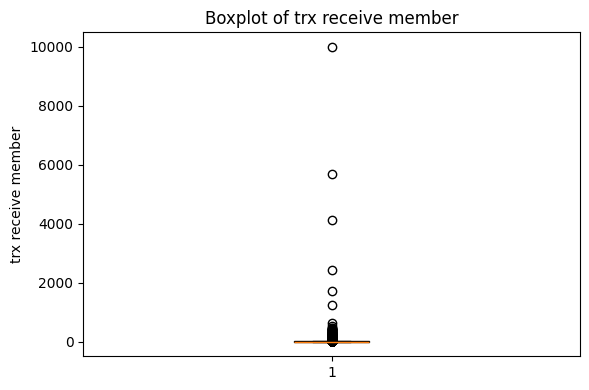

Processing feature: trx rtotal


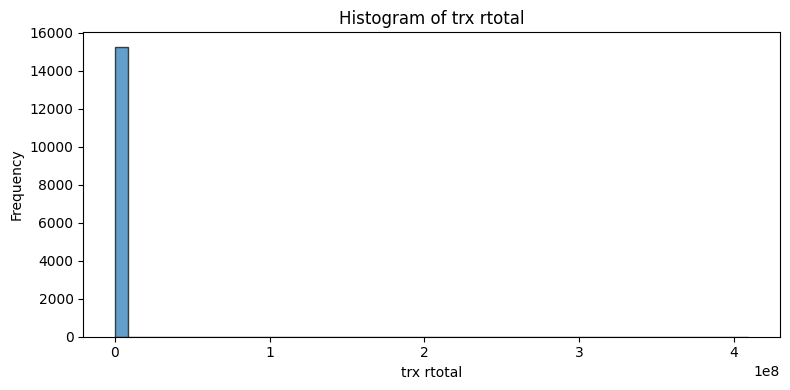

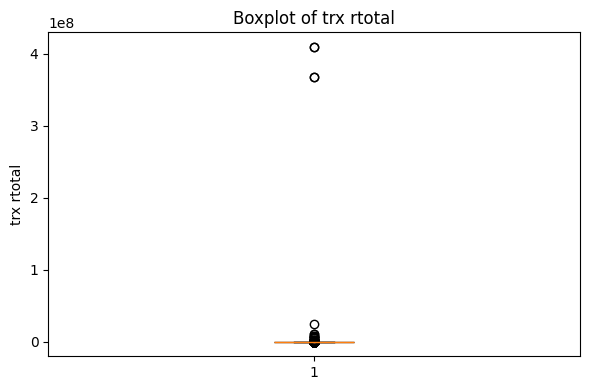

Processing feature: trx rtxs


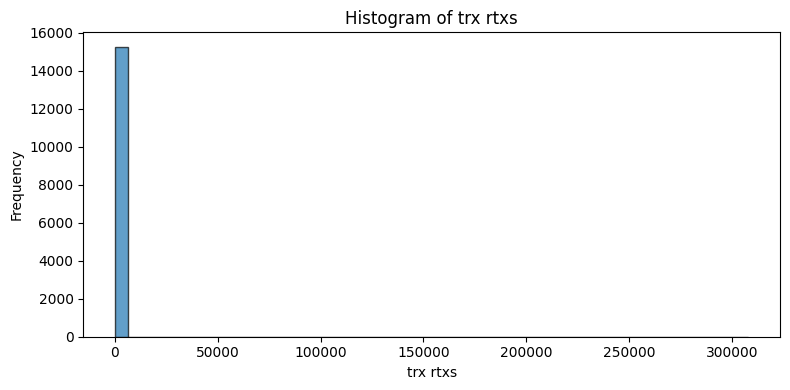

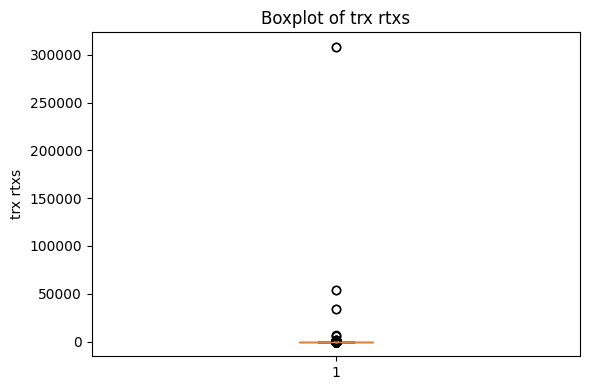

Processing feature: trx spent member


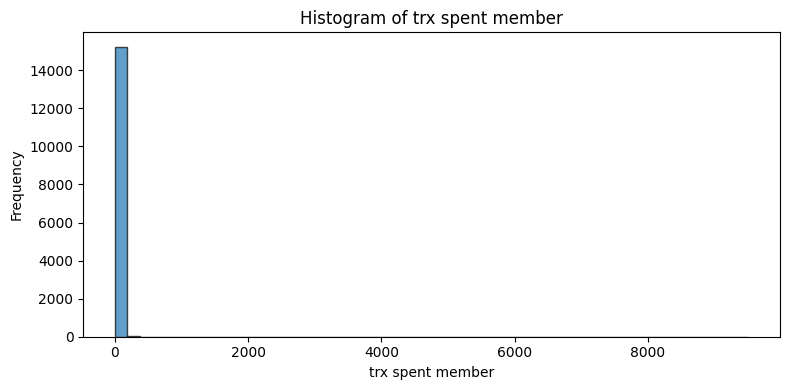

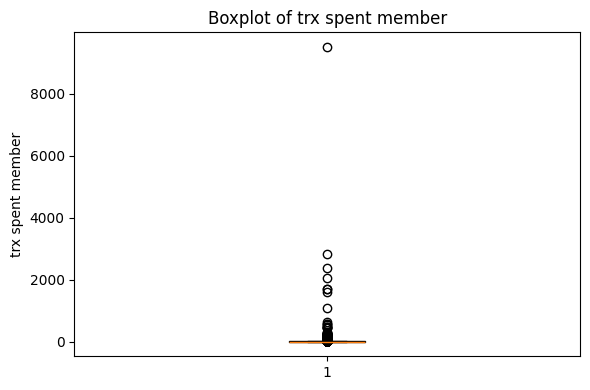

Processing feature: trx stotal


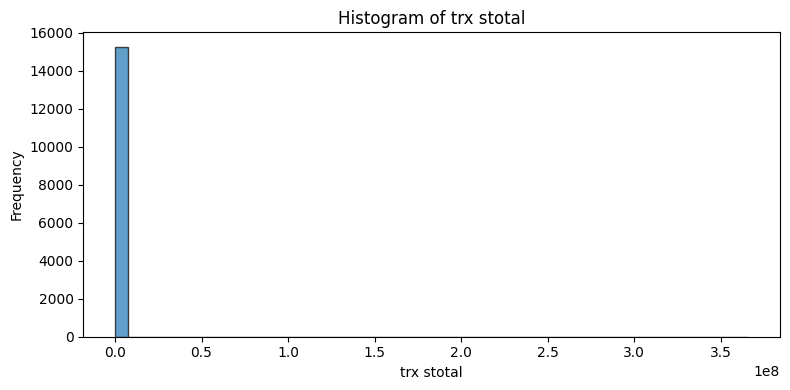

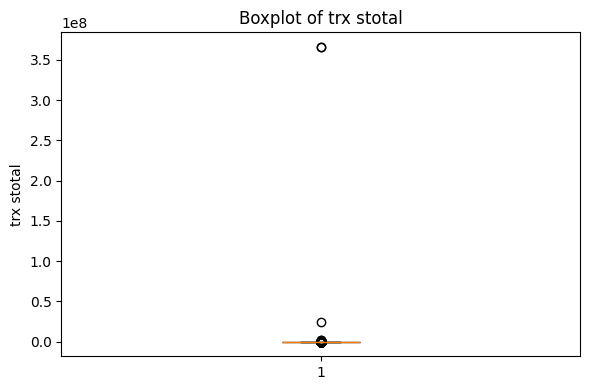

Processing feature: trx stxs


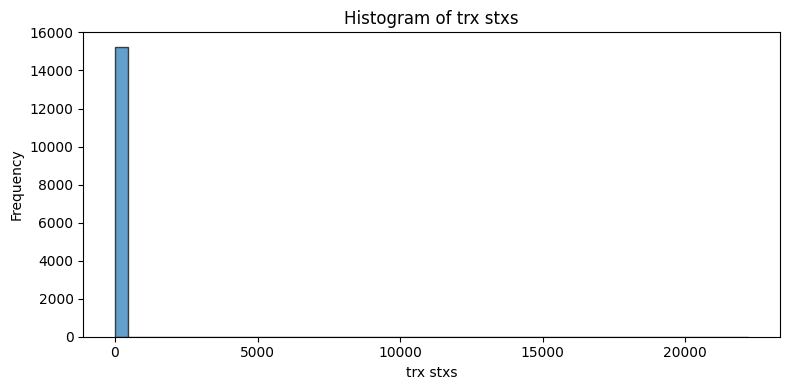

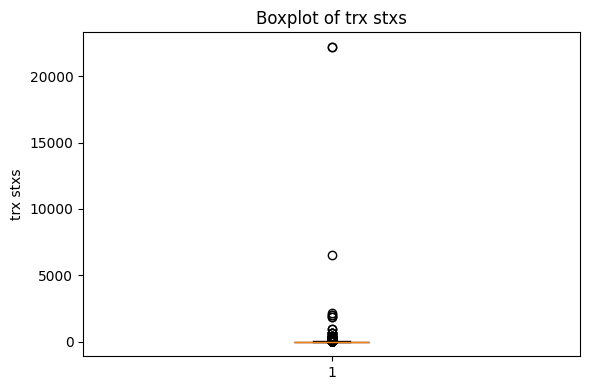

In [13]:
feature_cols = df_copy.columns.difference(['label'])
# histogram
def plot_histogram(data, col, bins = 50):
    plt.figure(figsize = (8, 4))
    plt.hist(data[col], bins = bins, edgecolor = 'black', alpha = 0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# boxplot
def plot_boxplot(data, col):
    plt.figure(figsize = (6, 4))
    plt.boxplot(data[col], vert=True, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# plot for all the features
for col in feature_cols:
    print(f"Processing feature: {col}")
    plot_histogram(df_cleaned, col)
    plot_boxplot(df_cleaned, col)

### 2.3.3 Dealing with the outliers

In the financial and blockchain area, extreme values ​​often carry important information (such as sudden bursts of transaction volume in money laundering or fraud activities). We first check the num of outlier under the method of IQR.

In [14]:
# remove outliers using IQR method
def remove_outliers_iqr(df, columns = None, iqr_multiplier = 3):
    if columns is None:
        columns = df.select_dtypes(include = np.number).columns.tolist()

    # avoid changing the original data
    df_processed = df.copy()
    outliers_count = {}

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_processed[col]):
            df_processed[col] = df_processed[col].astype(float)

            # calculate Q1, Q3, IQR
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1

            # define lower and upper bounds
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR

            condition = (df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)
            outliers_count[col] = condition.sum()

            df_processed.loc[condition, col] = np.nan

    return df_processed, outliers_count


In [15]:
df_processed, outliers_count = remove_outliers_iqr(df_cleaned, columns = None, iqr_multiplier = 3)

print("Num of outliers in each column")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Num of outliers in each column
label: 0
lifetime: 1116
total txs: 1532
receive txs: 1449
spent txs: 1615
total receive: 1633
total spent: 1633
balance: 3100
mean receive: 911
max receive: 1227
min receive: 2481
mean spent: 1234
max spent: 1201
min spent: 1734
extreme receive txs: 949
extreme spent txs: 1063
asset-stander receive txs: 1595
asset-stander spent txs: 1629
receive member: 901
spent member: 1474
mean txs timegap: 934
max txs timegap: 940
min txs timegap: 1958
mean rtxs timegap: 899
max rtxs timegap: 955
min rtxs timegap: 2684
mean stxs timegap: 1058
max stxs timegap: 894
min stxs timegap: 2903
mean txs amountdiff: 1060
max txs amountdiff: 1222
min txs amountdiff: 2349
mean rtxs amountdiff: 1150
max rtxs amountdiff: 1329
min rtxs amountdiff: 2975
mean stxs amountdiff: 1337
max stxs amountdiff: 1386
min stxs amountdiff: 2821
tm1: 588
tm2: 1753
tm3: 1226
tm4: 1613
rm1: 590
rm2: 1741
rm3: 2433
rm4: 1814
sm1: 1981
sm2: 3192
sm3: 4185
sm4: 3629
trx rtxs: 840
trx stxs: 1611
trx rto

From the above checking, we observe that there are numerous so-called outliers under the method of IQR. However,

1. AML data usually not follow a near-normal distribution:

* Traditional outlier-detection methods like IQR implicitly assume that most data fall within a relatively consistent or quasi-normal range.

* However, in AML and cryptocurrency anti-fraud scenarios, money laundering and fraudulent transactions frequently exhibit extreme amounts, short bursts of high-frequency activity, or pronounced fluctuations over time. These are flagged statistically as the **so-called outliers** but are, in fact, legitimate signals of illicit behavior.

2. Removing outliers risks losing key information:

* In AML, these **so-called outliers** often constitute the precise signals that help distinguish illicit from normal transactions. Excluding them may cause the model to lose the most discriminative patterns and degrade performance on real-world data.

Therefore, we will not remove the so-called outliers to implement the feature engineering and the further model construction.

### 2.3.4 Spliting the training and testing set



In [16]:
X = df_cleaned.drop('label', axis=1)
y = df_cleaned['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(12208, 82)


## 2.4 Feature Selection Phase
### **Wallet profile features**: a preliminary picture of the wallet as a whole
1.**lifetime**: timestamp of the first and last TX at wallet address (reflect the wallet stability and durability)

2.**total txs**: total num of TXs at wallet address (reflect the wallet overall activity and frequency)

3.**receive txs**: total num of the incoming TXs (reflect the activity of the wallet as the receiving end of funds)

4.**spend txs**: total num of the outgoing TXs (reflect the activity of the wallet as the sending end of funds)

5.**total receive**: total amount of money received

6.**total spent**: total amount of money spent

7.**balance**: the current balance remain

### **Transaction amount features**: focusing on identifying changes and frequencies at the inidividual transaction level

8.**mean receive**: the average amount that the wallet received

9.**max receive**: the maximum amount the wallet received

10.**min receive**: the minimum amount the wallet received

11.**mean spent**: the average amount that the wallet spent

12.**max spent**: the maximum amount the wallet spent

13.**min spent**: the minimum amount the wallet spent

14.**extreme receive txs**: num of TXs that exceeding the avearge received amount (mean receive, calculated by wallet's own tx data)

15.**extreme spent txs**: num of TXs that exceeding the average spent amount (mean spent)

16.**asset-stander receive txs**: num of received TXs measured in digital assets (counting Txs amount can be divided by 100)

17.**asset-stander spent txs**: num of spent TXs measured in digital assets (counting TXs amount can be divided by 100)

18.**receive member**: The num of unique/independent accounts (counterparties) sending funds to this wallet.

19.**spent member**: The num of unique/independent accounts (counterparties) receiving funds from this wallet. (abnormally high values may indicate dispersion of funds during money laundering)

20.**mean txs amountdiff**: Average of all TXs amount differences between two consecutive TXs(reflect the overall fluctuations in wallet TX amount)

21.**max txs amountdiff**: Maximum amount difference between consecutive TXs.

22.**min txs amountdiff**: Minimum amount difference between consecutive TXs.

23.**mean rtxs amountdiff**: Average of the received TXs amount difference between two consecutive TXs.

24.**max rtxs amountdiff**: Maximum value of the difference in consecutive received TXs amount.

25.**min rtxs amountdiff**: Minimum value of the difference in consecutive received TXs amount.

26.**mean stxs amountdiff**: Average of the spent TXs amount difference between two consecutive TXs.

27.**max stxs amountdiff**: Maximum value of the difference in consecutive spent TXs amount.

28.**min stxs amountdiff**: Minimum value of the difference in consecutive spent TXs amount.

### Transaction Temporal Features (unit in day):

29.**mean txs timegap**: Average timegap between TXs (short timegaps suggest frequent trading activity, possibly for rapid fund transfers).

30.**max txs timegap**: Maximum timegap between TXs.

31.**min txs timegap**: Minimum timegap between TXs.

32.**mean rtxs timegap**: Average time gap between received TXs.

33.**max rtxs timegap**: Maximum timegap between reveived TXs.

34.**min rtxs timegap**: Minimum timegap between reveived TXs.

35.**mean stxs timegap**: Average timegap between spent TXs.

36.**max stxs timegap**: Maximum timegap between spent TXs.

37.**mean stxs timegap**: Minimum timegap between spent TXs.

38.**tm1**: Average time elapsed between TXs.

* time elapsed: T = [$t_1 - t_0$, $t_2 - t_0$, ..., $t_n - t_0$];
* a larger tm1 indicates that wallet TXs are sparse or concentrated in the later stages;
* a smaller tm1 indicates that TX activities are more frequent or that there are more intensive TX in the early stages.

39.**tm2**: Standard deviation of the time elapsed between TXs

* the degree of dispersion of TX times;
* large tm2 indicates that the TX time of the wallet is very irregular, which may be concentrated in a certain stage or occur randomly;
* smaller tm2 indicates that the TX time of the wallet is relatively stable and regular.

40.**tm3**: Skewness of the time elapsed between TXs

* reflect asymmetry of TX time distribution;
* tm3 > 0: Most TXs are concentrated in the early stages;
* tm3 < 0: Most TXs are concentrated in the late stages.

41.**tm4**: Kurtosis of the time elapsed between TXs.

* reflect the concentration of TX time distribution and the probability of outliers;
* higher tm4: TXs tends to be concentrated in a particular period of time;
* lower tm4: Txs are more dispersed.

42.**rm1**:Average time elapsed between received TXs.

* time elapsed: R = [$r_1 - r_0$, $r_2 - r_0$, ..., $r_n - r_0$];
* a larger rm1 indicates that wallet received TXs are sparse or concentrated in the later stages;
* a smaller rm1 indicates that received TXs activities are more frequent or that there are more intensive received TXs in the early stages.

43.**rm2**: Standard deviation of the time elapsed between received TXs

* the degree of dispersion of received TXs times;
* large rm2 indicates that the received TXs time of the wallet is very irregular, which may be concentrated in a certain stage or occur randomly;
* smaller rm2 indicates that received TXs time of the wallet is relatively stable and regular.

44.**rm3**: Skewness of the time elapsed between received TXs

* reflect asymmetry of received TXs time distribution;
* rm3 > 0: Most received TXs are concentrated in the early stages;
* rm3 < 0: Most received TXs are concentrated in the late stages.

45.**rm4**: Kurtosis of the time elapsed between received TXs.

* reflect the concentration of received TXs time distribution and the probability of outliers;
* higher rm4: received TXs tends to be concentrated in a particular period of time;
* lower rm4: received Txs are more dispersed.

46.**sm1**: Average time elapsed between spent TXs.

* time elapsed: S = [$s_1 - s_0$, $s_2 - s_0$, ..., $s_n - s_0$];
* a larger sm1 indicates that wallet received TXs are sparse or concentrated in the later stages;
* a smaller sm1 indicates that received TXs activities are more frequent or that there are more intensive received TXs in the early stages.

47.**sm2**:Standard deviation of the time elapsed between received TXs

* the degree of dispersion of spent TXs times;
* large sm2 indicates that the spent TXs time of the wallet is very irregular, which may be concentrated in a certain stage or occur randomly;
* smaller sm2 indicates that spent TXs time of the wallet is relatively stable and regular.

48.**sm3**:Skewness of the time elapsed between spent TXs

* reflect asymmetry of spent TXs time distribution;
* sm3 > 0: Most spent TXs are concentrated in the early stages;
* sm3 < 0: Most spent TXs are concentrated in the late stages.

49.**sm4**:Kurtosis of the time elapsed between spent TXs.

* reflect the concentration of spent TXs time distribution and the probability of outliers;
* higher sm4: spent TXs tends to be concentrated in a particular period of time;
* lower sm4: sepnt Txs are more dispersed.

### TRON Features:
* These features are designed specifically for the transaction patterns of the TRON blockchain, helping the model to more accurately identify illegal behavior patterns unique to TRON.

* Every transaction on the TRON network (such as transferring USDT) consumes TRX as a fee (energy, bandwidth)

* Suppose a criminal wants to use USDT to quickly transfer funds. In order to transfer funds, he must hold a small amount of TRX to pay transaction fees. **This means that his wallet not only frequently transfers USDT in a short period of time, but also frequently conducts TRX transactions in the same or similar time to pay fees.** There is a strong correlation between these two transaction activities.

50.**trx rtxs**: Total num of received TXs of TRX coin

51.**trx stxs**: Total num of spent TXs of TRX coin

52.**trx rtotal**: Total received amount of TRX coin

53.**trx stotal**: Total spent amount of TRX coin

54.**trx mean receive**: Average amount of TRX received

55.**trx max receive**: Maximum amount of TRX received

56.**trx min receive**: Minimum amount of TRX received

57.**trx mean spent**: Average amount of TRX sepnt

58.**trx max spent**: Maximum amount of TRX spent

59.**trx min spent**: Minimum amount of TRX spent

60.**trx asset-stander receive txs**: The num of TXs where the received TRX transaction amount that can be divisible by 100.

61.**trx asset-stander spent txs**: The num of TXs where the spent TRX transaction amount that can be divisible by 100.  

62.**trx receive member**: The num of unique/independent accounts (counterparties) sending TRX to this wallet.

63.**trx spent member**: The num of unique/independent accounts (counterparties) receiving TRX from this wallet. (abnormally high values may indicate dispersion of funds during money laundering)

64.**trx mean txs timegap**: Average timegap between TRX TXs (short timegaps suggest frequent trading activity, possibly for rapid fund transfers).

65.**trx max txs timegap**: Maximum timegap between TRX TXs.

66.**trx min txs timegap**: Minimum timegap between TRX TXs.

67.**trx mean rtxs timegap**: Average time gap between received TRX TXs.

68.**trx max rtxs timegap**: Maximum timegap between reveived TRX TXs.

69.**trx min rtxs timegap**: Minimum timegap between reveived TRX TXs.

70.**trx mean stxs timegap**: Average timegap between spent TRX TXs.

71.**trx max stxs timegap**: Maximum timegap between spent TRX TXs.

72.**trx min stxs timegap**: Minimum timegap between spent TRX TXs.

73.**trx mean txs amountdiff**:
Average difference in transaction amounts of TRX coin (reflect the overall fluctuations in wallet TRX TX amount).

74.**trx max txs amountdiff**:  Maximum amount difference between consecutive TRX TXs.

75.**trx min txs amountdiff**: Minimum amount difference between consecutive TRX TXs.

76.**trx mean rtxs amountdiff**: Average of the received TRX TXs amount difference between two consecutive TRX TXs.

77.**trx max rtxs amountdiff**:  Maximum value of the difference in consecutive received TXs amount.

78.**trx min rtxs amountdiff**:  Minimum value of the difference in consecutive received TRX TXs amount.

79.**trx mean stxs amountdiff**: Average of the spent TRX TXs amount difference between two consecutive TRX TXs.

80.**trx max stxs amountdiff**: Maximum value of the difference in consecutive spent TRX TXs amount.

81.**trx min stxs amountdiff**: Minimum value of the difference in consecutive spent TRX TXs amount.

82.**member Jaccard**: Degree of overlap between TRX coin transaction counterpart and Tether coin transaction counterpart,
calculated as the intersection of the two divided by their union.

$$Jaccard(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

* A: the collection of all accounts that conduct TRX TX with this wallet.

* B: the collection of all accounts that conduct USDT TX with this wallet.

* $(A \cap B)$: the num of the accounts that exist in both sets

* $(A \cup B)$: the num of the different accounts in the two sets.

### 2.4.1 Correlation Matrix Visualization

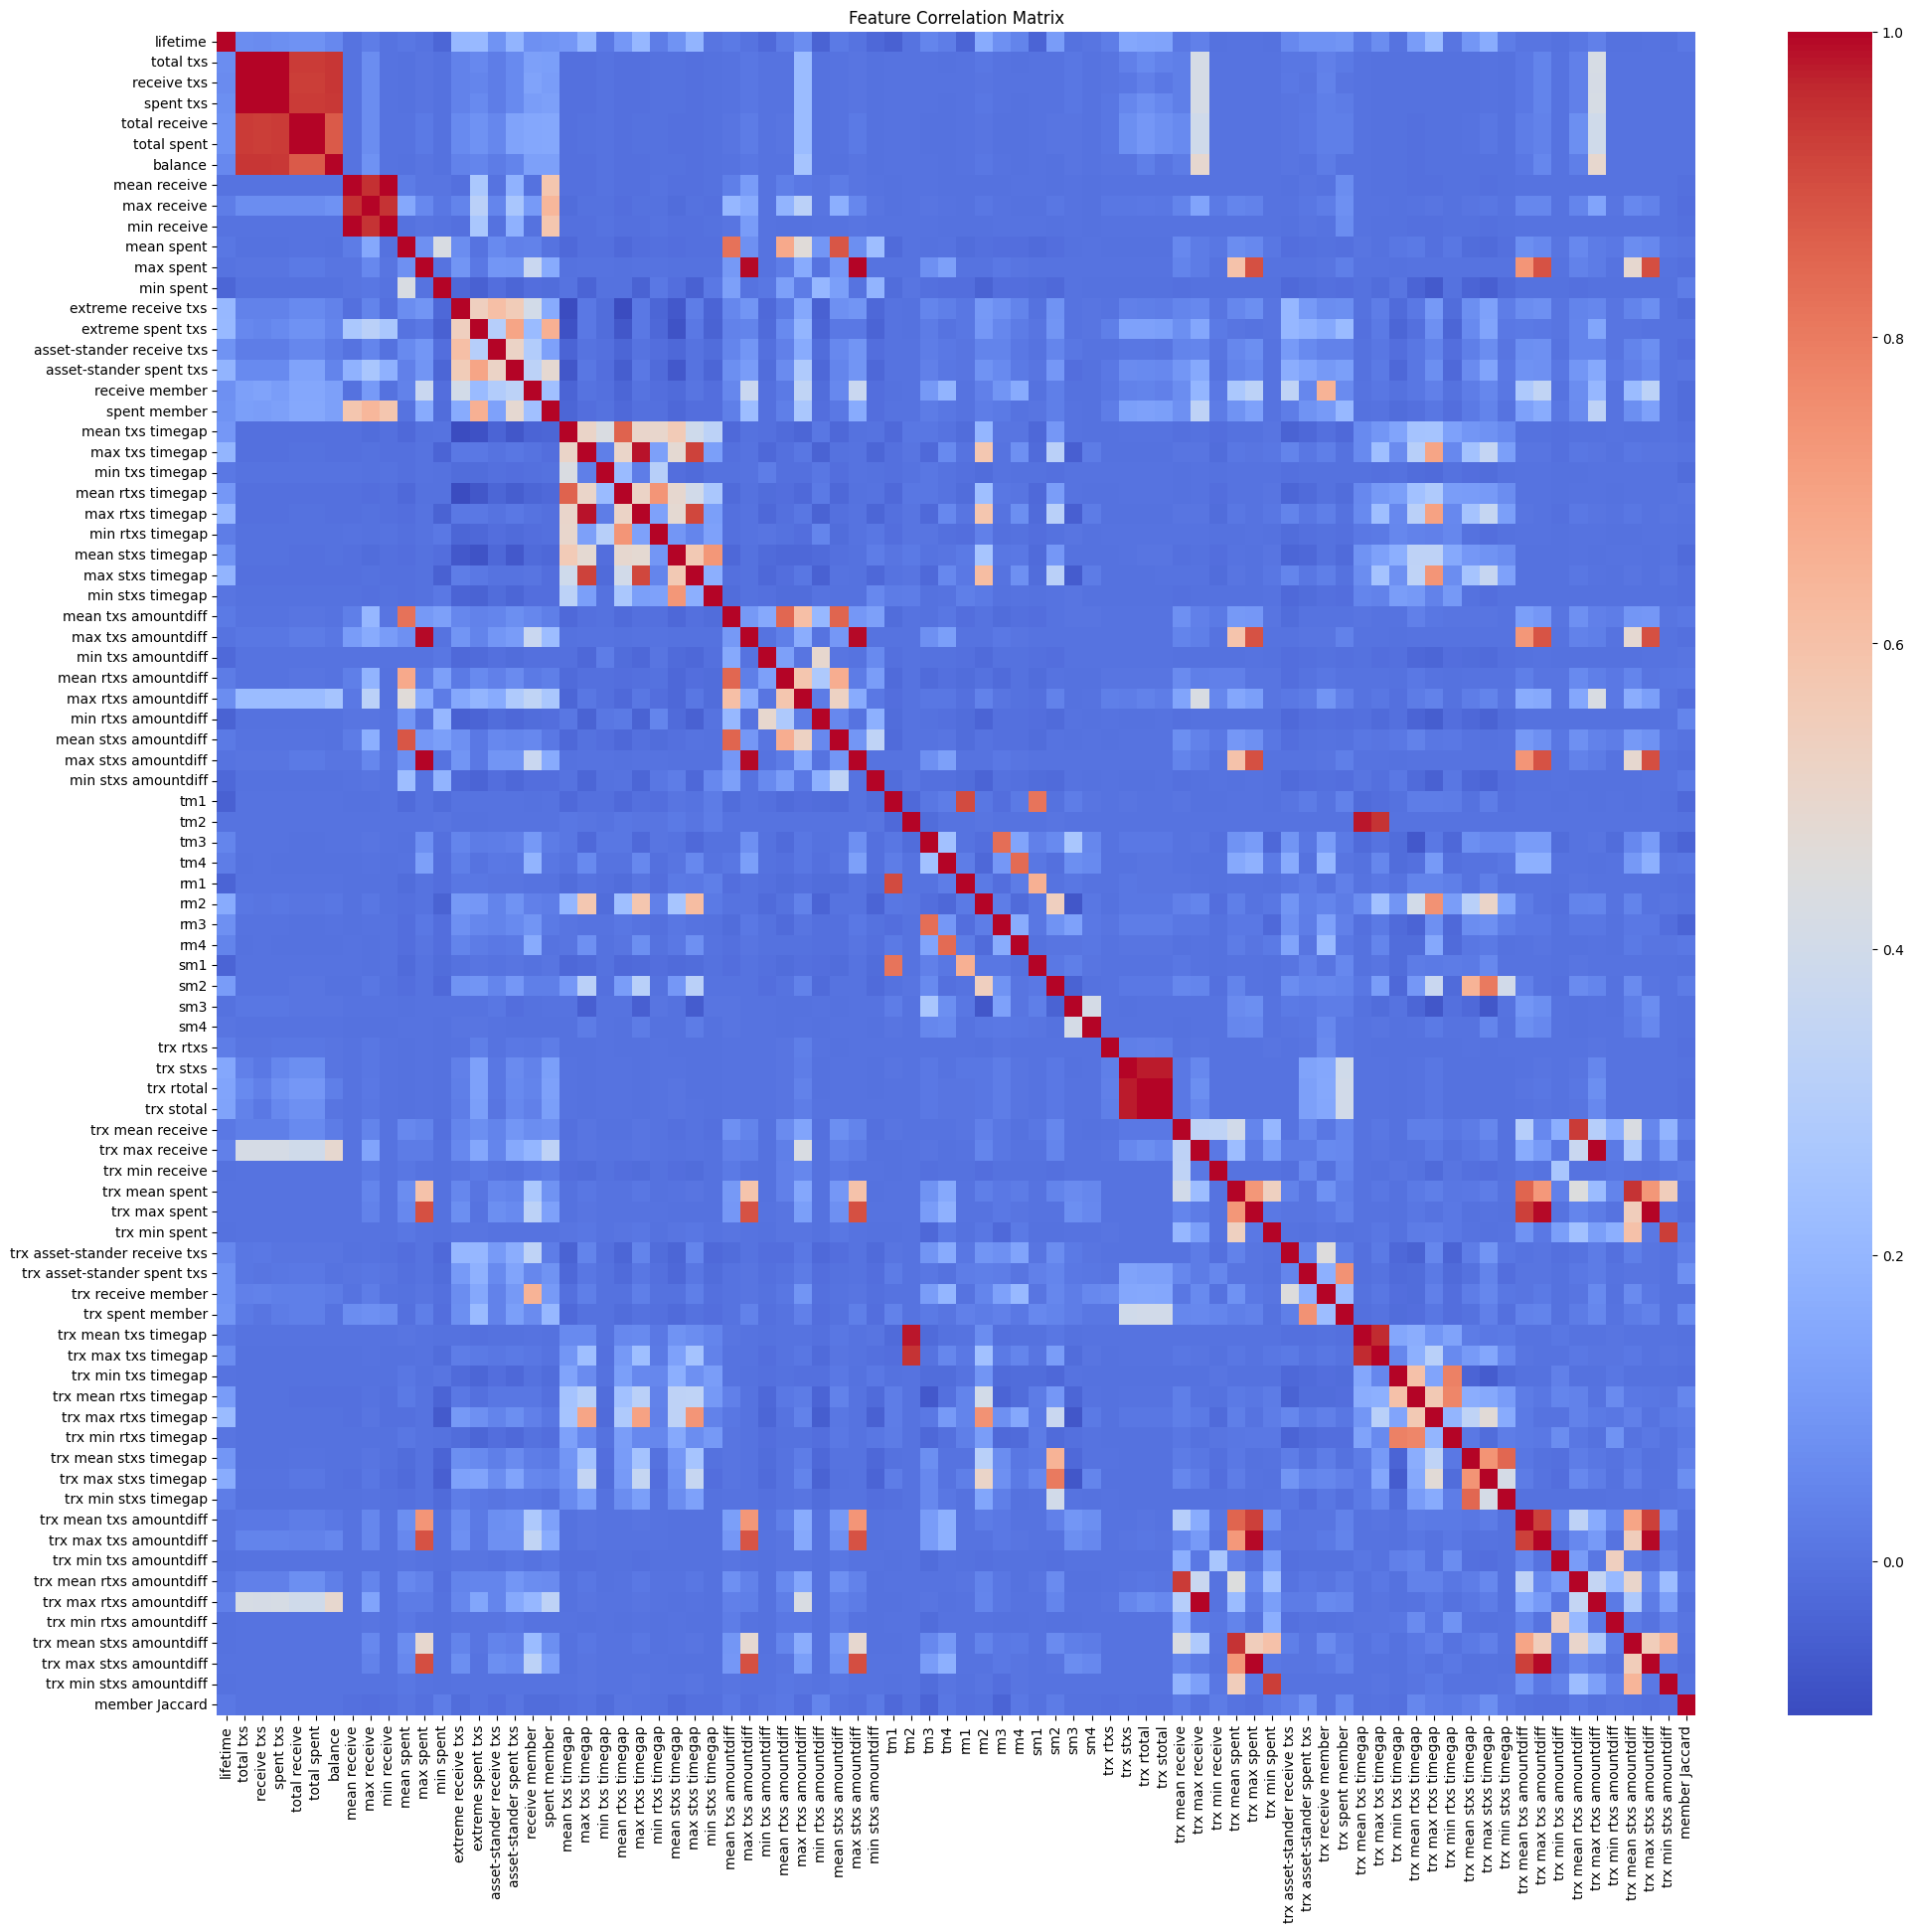

In [17]:
corr_matrix = X_train.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [18]:
# check the highly correlated features
high_corr_pairs = {}
threshold = 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            high_corr_pairs[pair] = corr_matrix.iloc[i, j]

print(f"Highly correlated feature pairs (threshold > 0.9):")
for pair, value in high_corr_pairs.items():
    print(f"{pair}: {value:.2f}")


Highly correlated feature pairs (threshold > 0.9):
('total txs', 'receive txs'): 1.00
('total txs', 'spent txs'): 1.00
('total txs', 'total receive'): 0.93
('total txs', 'total spent'): 0.93
('total txs', 'balance'): 0.94
('receive txs', 'spent txs'): 1.00
('receive txs', 'total receive'): 0.93
('receive txs', 'total spent'): 0.93
('receive txs', 'balance'): 0.94
('spent txs', 'total receive'): 0.93
('spent txs', 'total spent'): 0.93
('spent txs', 'balance'): 0.94
('total receive', 'total spent'): 1.00
('mean receive', 'max receive'): 0.95
('mean receive', 'min receive'): 1.00
('max receive', 'min receive'): 0.95
('max spent', 'max txs amountdiff'): 0.99
('max spent', 'max stxs amountdiff'): 1.00
('max txs timegap', 'max rtxs timegap'): 0.98
('max txs timegap', 'max stxs timegap'): 0.92
('max rtxs timegap', 'max stxs timegap'): 0.91
('max txs amountdiff', 'max stxs amountdiff'): 0.99
('tm1', 'rm1'): 0.90
('tm2', 'trx mean txs timegap'): 0.98
('tm2', 'trx max txs timegap'): 0.94
('trx s

### 2.4.2 Hierarchical clustering

Before using LightGBM to implement the feature selection according to the importance, we use hierarchical clustering to deal with the redundant features first.

* In the feature set, many features are highly correlated. These redundant features often provide repeated information, which can easily lead to multicollinearity problems, thus affecting the stability and interpretability of the model.

* All features are clustered using hierarchical clustering, highly correlated features are grouped together, and then a representative feature is selected in each cluster. In our case, two featues will be classified into the same category if the correlation between them is greater than 0.85.

In [19]:
def compute_distance_matrix(df):
    corr = df.corr().abs()
    dist = 1 - corr
    return dist

def hierarchical_clustering(dist_matrix, threshold = 0.8):
    condensed_dist = sch.distance.squareform(dist_matrix.values)
    linkage_matrix = sch.linkage(condensed_dist, method = 'complete')
    clusters = sch.fcluster(linkage_matrix, t = (1 - threshold), criterion = 'distance')

    cluster_dict = {}
    features = dist_matrix.columns
    for feature, c_id in zip(features, clusters):
        cluster_dict.setdefault(c_id, []).append(feature)

    return cluster_dict

def calculate_vif(df):
    X = df.values
    vif_data = []
    for i in range(X.shape[1]):
        vif = variance_inflation_factor(X, i)
        vif_data.append(vif)
    vif_df = pd.DataFrame({'feature': df.columns, 'vif': vif_data})
    return vif_df

def remove_high_vif_features(df, vif_threshold=10.0):
    while True:
        # Check if DataFrame is empty or has only one column
        if df.empty or df.shape[1] <= 1:
            break  # Exit the loop if DataFrame is empty or has only one column

        vif_df = calculate_vif(df)
        max_vif = vif_df['vif'].max()
        if max_vif < vif_threshold and df.shape[1] > 1:
            drop_feat = vif_df.loc[vif_df['vif'].idxmax(), 'feature']
            df = df.drop(columns=[drop_feat])
        else:
            break
    return df

def select_representative_feature(df_cluster, y, alpha = 0.3):

    if df_cluster.shape[1] == 1:
        return df_cluster.columns[0]

    var_series = df_cluster.var()
    corr_with_y = {}
    for col in df_cluster.columns:
        corr_with_y[col] = abs(np.corrcoef(df_cluster[col].values, y)[0, 1])

    best_feat = None
    best_score = -1
    for col in df_cluster.columns:
        score = alpha * var_series[col] + (1 - alpha) * corr_with_y[col]
        if score > best_score:
            best_score = score
            best_feat = col

    return best_feat

def improved_hier_cluster_feature_select(df, y, corr_threshold = 0.8, vif_threshold = 10.0, alpha = 0.3):

    dist_matrix = compute_distance_matrix(df)
    cluster_dict = hierarchical_clustering(dist_matrix, threshold=corr_threshold)

    representative_features = []

    for c_id, feature_list in cluster_dict.items():
        df_subset = df[feature_list].copy() # data of the current cluster

        df_subset_vif_checked = remove_high_vif_features(df_subset, vif_threshold=vif_threshold)

        best_feat = select_representative_feature(df_subset_vif_checked, y, alpha=alpha)
        representative_features.append(best_feat)

    return representative_features

selected_feats = improved_hier_cluster_feature_select(X_train, y_train, corr_threshold=0.85, vif_threshold=10.0, alpha=0.3)
print(len(selected_feats))

57


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 2.4.3 Feature selection based on model using LightGBM

* After removing redundant features at the first stage, we will use LightGBM to train a binary classification model and calculate the importance of each feature. According to the feature importance ranking, then selecting the features that contribute most to the target variable for subsequent modeling.

In [20]:
X_train_selected = X_train[selected_feats]

model = LGBMClassifier(random_state = 42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-3, 0, 4),
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_selected, y_train)
best_model = random_search.best_estimator_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6597, number of negative: 5611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13786
[LightGBM] [Info] Number of data points in the train set: 12208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540383 -> initscore=0.161886
[LightGBM] [Info] Start training from score 0.161886


In [21]:
importances = best_model.feature_importances_ / best_model.feature_importances_.sum()
feature_names = X_train_selected.columns

feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)
feature_importance

[('total receive', 0.0719047619047619),
 ('lifetime', 0.06537414965986395),
 ('trx rtotal', 0.053061224489795916),
 ('tm1', 0.051224489795918364),
 ('max receive', 0.047142857142857146),
 ('max rtxs timegap', 0.028435374149659864),
 ('trx rtxs', 0.02687074829931973),
 ('min txs timegap', 0.02639455782312925),
 ('mean stxs timegap', 0.02598639455782313),
 ('extreme spent txs', 0.024829931972789116),
 ('mean rtxs timegap', 0.024421768707482992),
 ('min spent', 0.02435374149659864),
 ('tm2', 0.023333333333333334),
 ('extreme receive txs', 0.022857142857142857),
 ('mean txs amountdiff', 0.022448979591836733),
 ('mean stxs amountdiff', 0.021496598639455782),
 ('trx min receive', 0.020340136054421767),
 ('trx asset-stander receive txs', 0.019523809523809523),
 ('mean rtxs amountdiff', 0.01945578231292517),
 ('asset-stander receive txs', 0.019387755102040816),
 ('trx max receive', 0.017891156462585035),
 ('min rtxs timegap', 0.016870748299319727),
 ('rm2', 0.01673469387755102),
 ('min stxs ti

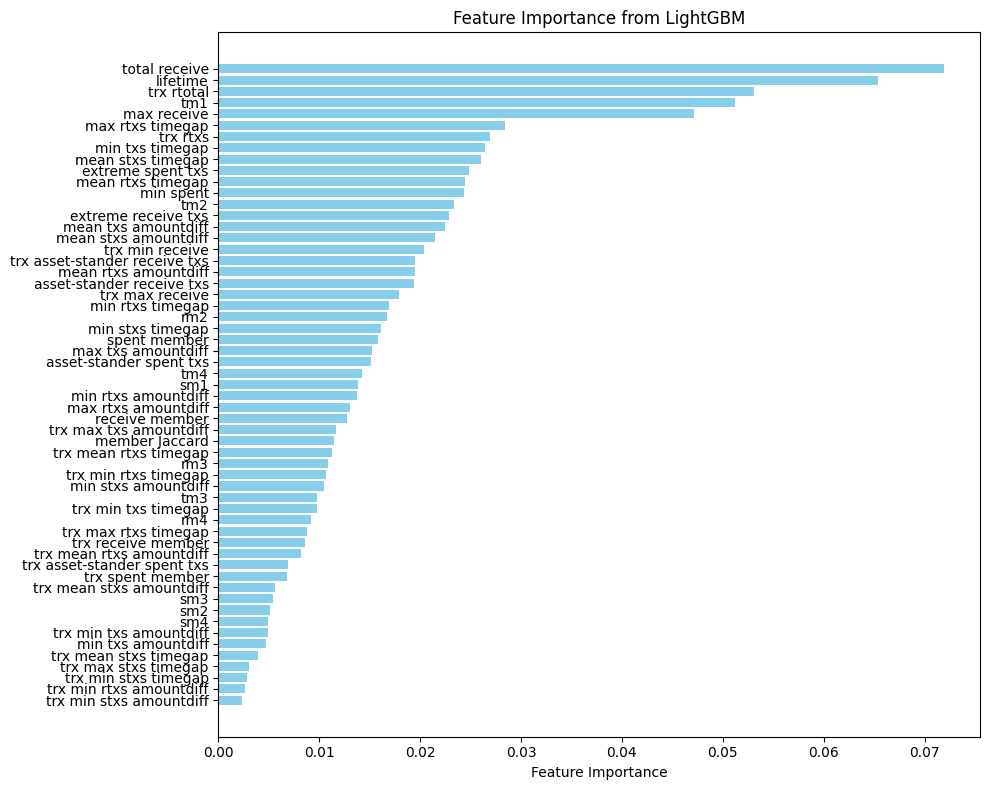

In [22]:
sorted_features = [f[0] for f in feature_importance]
sorted_importances = [f[1] for f in feature_importance]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from LightGBM")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [23]:
cumulative_importance = np.cumsum(sorted_importances)
threshold = 0.97

n_selected_features = np.where(cumulative_importance >= threshold)[0][0] + 1

print(f"Selected {n_selected_features} features that cover {threshold*100}% of cumulative importance")

Selected 49 features that cover 97.0% of cumulative importance


Selected Features: ['total receive', 'lifetime', 'trx rtotal', 'tm1', 'max receive', 'max rtxs timegap', 'trx rtxs', 'min txs timegap', 'mean stxs timegap', 'extreme spent txs', 'mean rtxs timegap', 'min spent', 'tm2', 'extreme receive txs', 'mean txs amountdiff', 'mean stxs amountdiff', 'trx min receive', 'trx asset-stander receive txs', 'mean rtxs amountdiff', 'asset-stander receive txs', 'trx max receive', 'min rtxs timegap', 'rm2', 'min stxs timegap', 'spent member', 'max txs amountdiff', 'asset-stander spent txs', 'tm4', 'sm1', 'min rtxs amountdiff', 'max rtxs amountdiff', 'receive member', 'trx max txs amountdiff', 'member Jaccard', 'trx mean rtxs timegap', 'rm3', 'trx min rtxs timegap', 'min stxs amountdiff', 'tm3', 'trx min txs timegap', 'rm4', 'trx max rtxs timegap', 'trx receive member', 'trx mean rtxs amountdiff', 'trx asset-stander spent txs', 'trx spent member', 'trx mean stxs amountdiff', 'sm3', 'sm2']


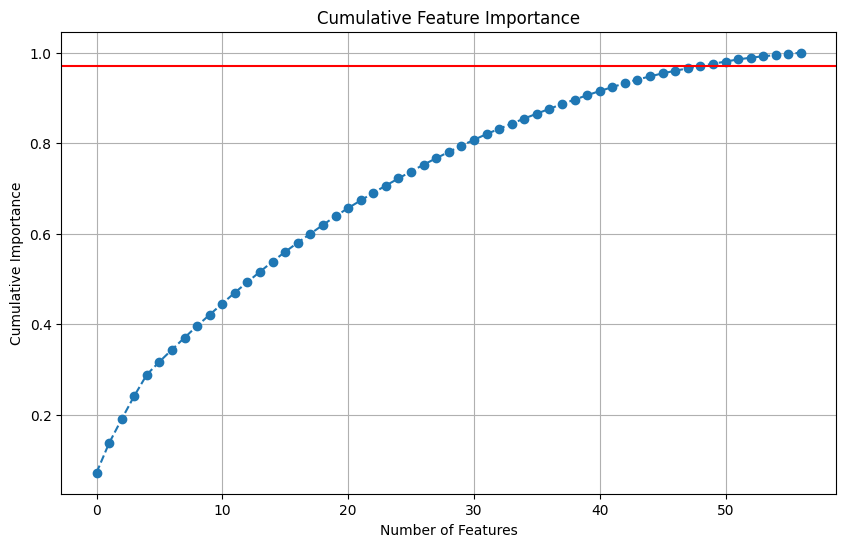

In [24]:
selected_features_final = sorted_features[:n_selected_features]
X_train_selected = X_train_selected[selected_features_final]
print(f"Selected Features: {selected_features_final}")

plt.figure(figsize=(10, 6))
plt.plot(cumulative_importance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()

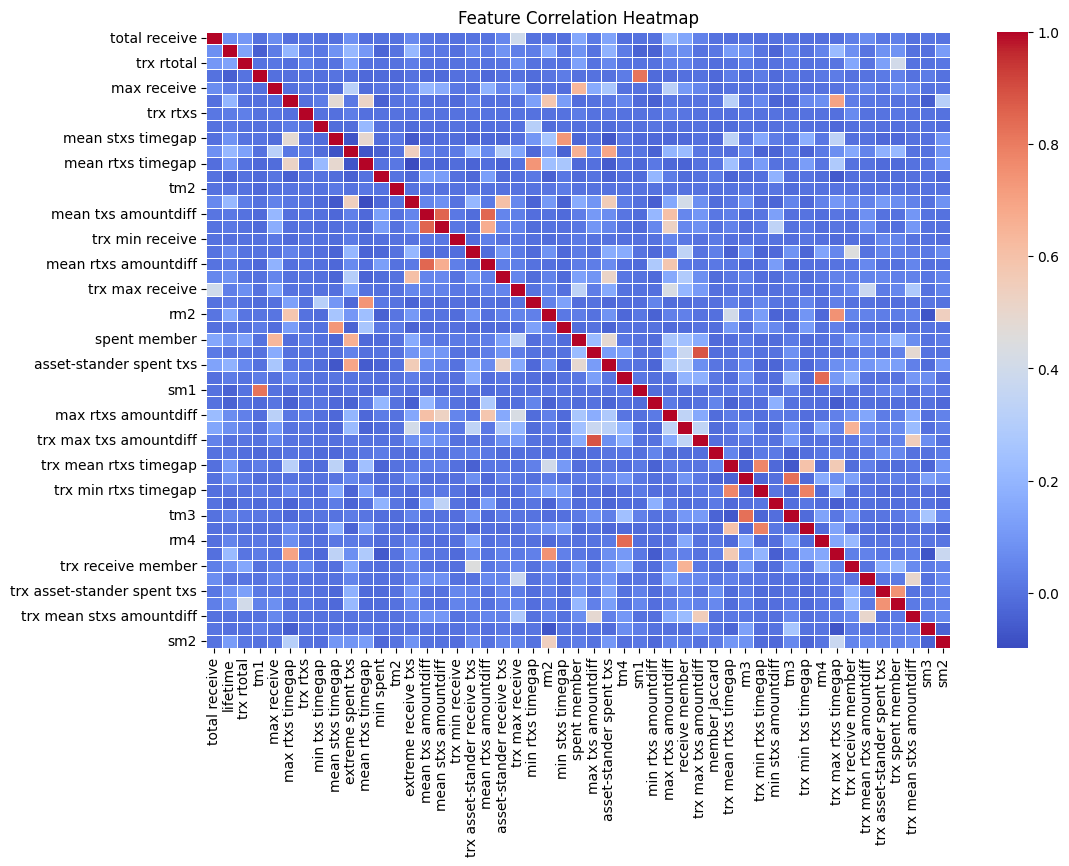

In [25]:
corr_matrix = X_train_selected.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

plt.show()

In [26]:
X_test_selected = X_test[selected_features_final]
X_test_selected.shape

(3053, 49)

## 3. Model training

### 3.1 Defining the training and evaluation functions

In [27]:
#Model Tuning Functions
def model_fit(model, param_dist, standardize=False):

    X = X_train_selected.copy()
    y = y_train.copy()
    X_test = X_test_selected.copy()

    if standardize:
        print("Standardizing training and test data.")
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns) # use the scaler of the training data to scale the test data

    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_dist,
                                       n_iter=20,
                                       cv=5,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=2,
                                       random_state=42)
    random_search.fit(X, y)

    best_params = random_search.best_params_
    print("Best Parameters:", best_params)

    best_accuracy = random_search.best_score_
    print("Optimal accuracy:", best_accuracy)

    return best_params, X, X_test

In [28]:
# Model Evaluation Functions
def evaluate_model(model, X_test_selected, y_test, num_classes=2):

    y_pred = model.predict(X_test_selected)
    y_score = model.predict_proba(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")

    print("\nClassification Report：")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")
    plt.ylabel("True Value")
    plt.show()

    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, y_pred


### 3.2 Model fits

#### LightGBM

In [29]:
lgb_model_lgbm = LGBMClassifier()

param_dist_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-3, 0, 4),
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

best_params_lgbm, X_train_lgbm, X_test_lgbm = model_fit(lgb_model_lgbm, param_dist_lgbm, standardize=True)

Standardizing training and test data.
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6597, number of negative: 5611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11752
[LightGBM] [Info] Number of data points in the train set: 12208, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540383 -> initscore=0.161886
[LightGBM] [Info] Start training from score 0.161886
Best Parameters: {'subsample': 1.0, 'num_leaves': 50, 'n_estimators': 300, 'min_child_samples': 50, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Optimal accuracy: 0.9625651870633437


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6597, number of negative: 5611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11752
[LightGBM] [Info] Number of data points in the train set: 12208, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540383 -> initscore=0.161886
[LightGBM] [Info] Start training from score 0.161886
Accuracy: 0.9630
F1-score: 0.9630
Recall: 0.9630

Classification Report：
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1379
           1       0.97      0.96      0.97      1674

    accuracy                           0.96      3053
   macro avg       0.96      0.96      0.96      3053
weighted avg       0.96      0.96      0.96      3053



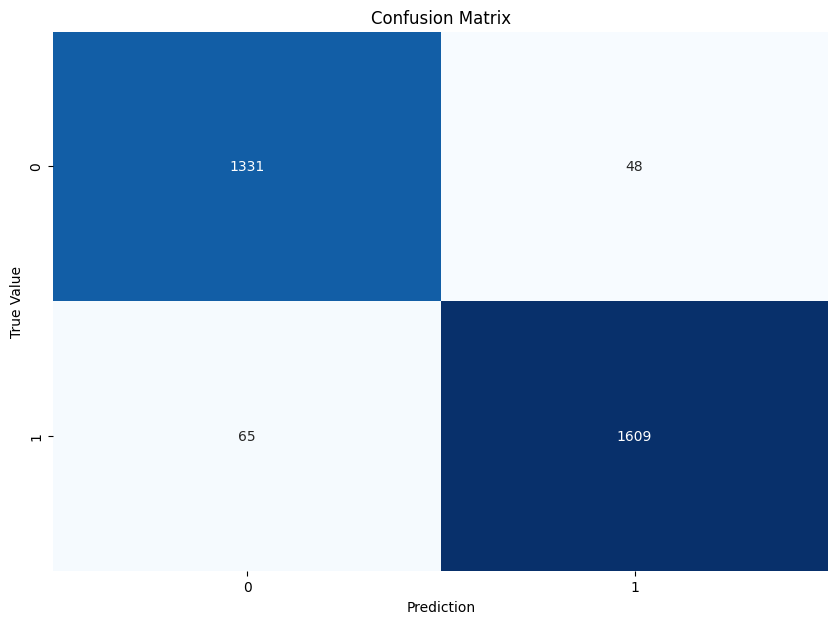

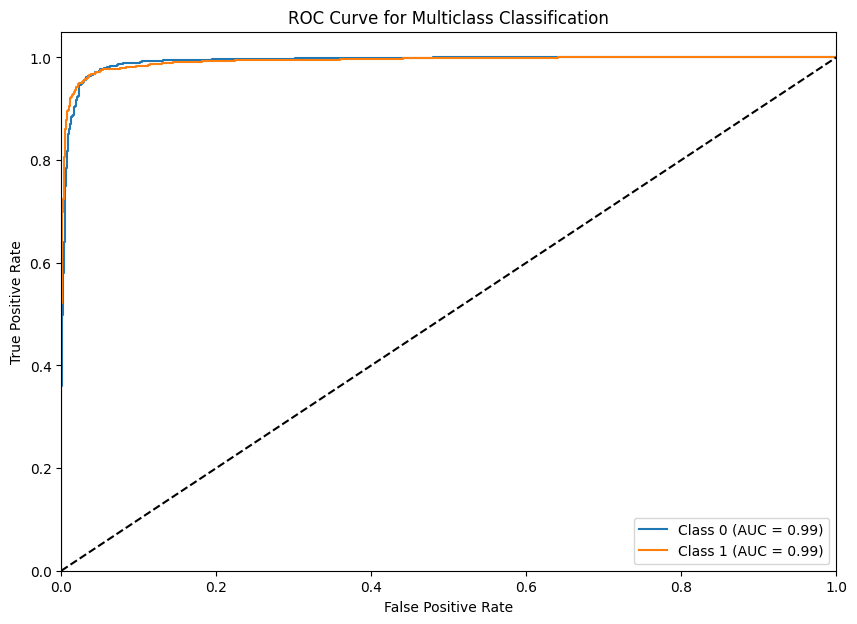

In [31]:
param_dict = {param_name: param_value for param_name, param_value in best_params_lgbm.items()}
best_model_lgbm = LGBMClassifier(**param_dict)
best_model_lgbm.fit(X_train_lgbm, y_train)
accuracy_lgbm, y_pred_lgbm = evaluate_model(best_model_lgbm, X_test_lgbm, y_test, num_classes=2)

#### XGBoost

In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10, 1),
    'learning_rate': np.logspace(-3, 0, 5),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': np.logspace(-2, 2, 5),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5)
}

best_xgb_params, X_train_xgb, X_test_xgb= model_fit(xgb_model, param_dist, standardize = True)

Standardizing training and test data.
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:10:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_alpha': 0.001, 'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.03162277660168379, 'gamma': 0.01, 'colsample_bytree': 0.8}
Optimal accuracy: 0.9589610130781783


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:10:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9610
F1-score: 0.9611
Recall: 0.9610

Classification Report：
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1379
           1       0.97      0.96      0.96      1674

    accuracy                           0.96      3053
   macro avg       0.96      0.96      0.96      3053
weighted avg       0.96      0.96      0.96      3053



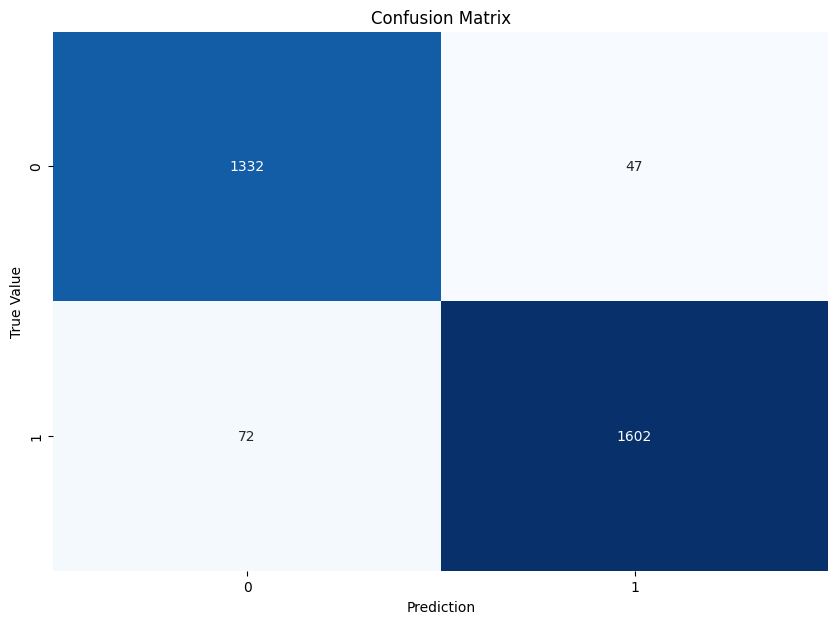

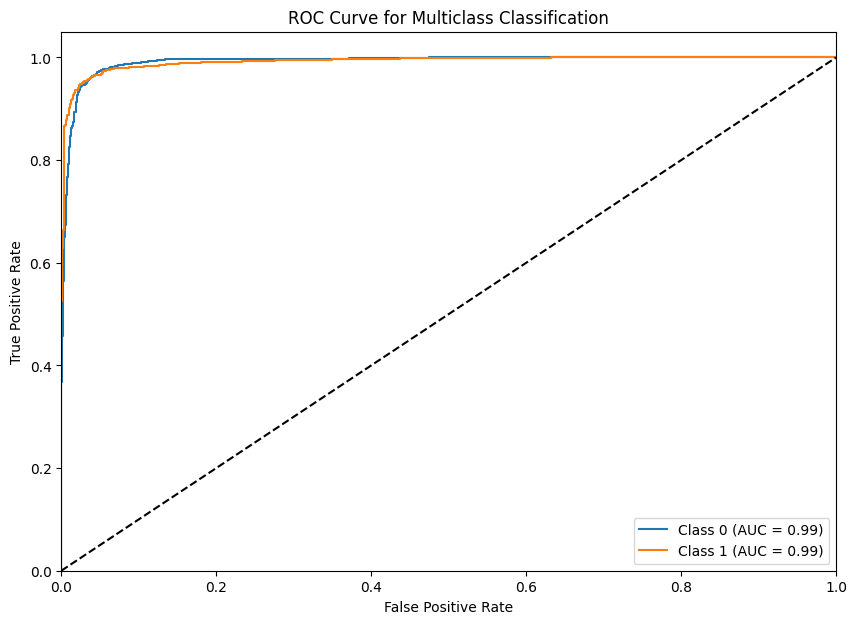

In [33]:
best_xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb_model.fit(X_train_xgb, y_train)
accuracy, xgb_y_pred = evaluate_model(best_xgb_model, X_test_xgb, y_test)

#### CatBoost

In [34]:
!pip install catboost

In [35]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(logging_level='Silent')


param_dist = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.5, 1],
}

cat_best_params,X_train_cat ,X_test_cat = model_fit(catboost_model, param_dist, standardize = True)

Standardizing training and test data.
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 4, 'border_count': 32, 'bagging_temperature': 0.5}
Optimal accuracy: 0.9588790794444216


Accuracy: 0.9607
F1-score: 0.9607
Recall: 0.9607

Classification Report：
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1379
           1       0.96      0.96      0.96      1674

    accuracy                           0.96      3053
   macro avg       0.96      0.96      0.96      3053
weighted avg       0.96      0.96      0.96      3053



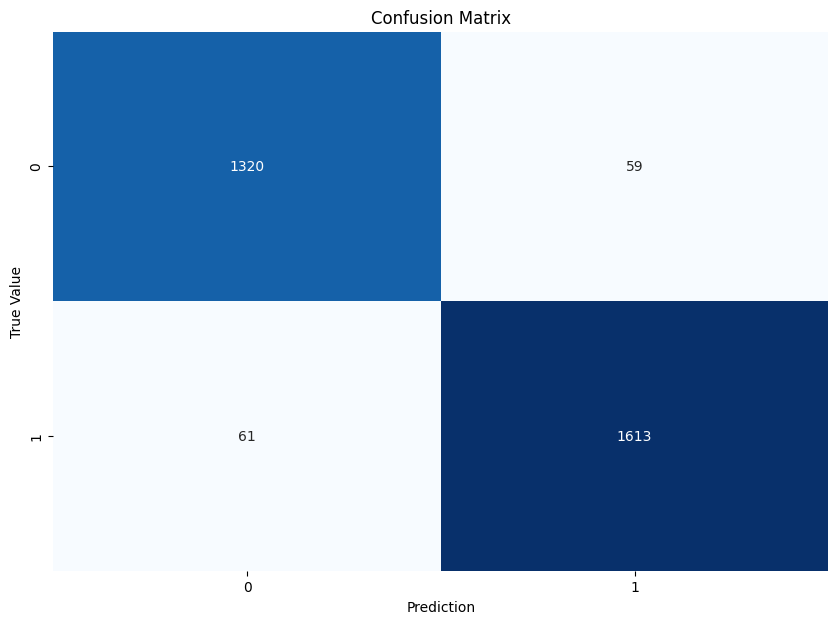

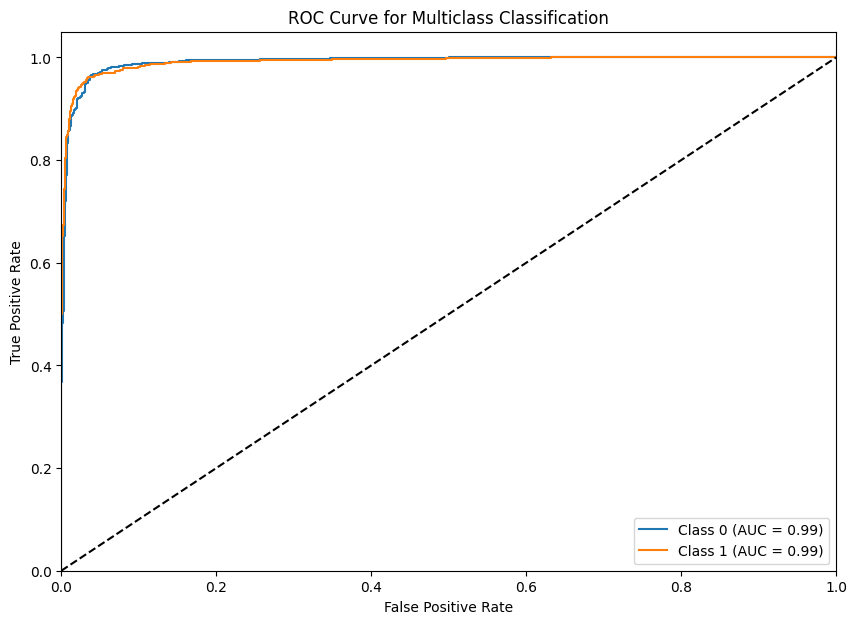

In [36]:
best_catboost_model = CatBoostClassifier( logging_level='Silent', **cat_best_params)
best_catboost_model.fit(X_train_cat, y_train)
accuracy, cat_y_pred = evaluate_model(best_catboost_model, X_test_cat, y_test)

#### Random Forest

In [37]:
rf = RandomForestClassifier(n_jobs=-1)
param_dist = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

RandomForest_best_params, X_train_rf ,X_test_rf = model_fit(rf, param_dist, standardize = True)

Standardizing training and test data.
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Optimal accuracy: 0.9493767574881872


Accuracy: 0.9489
F1-score: 0.9490
Recall: 0.9489

Classification Report：
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1379
           1       0.97      0.94      0.95      1674

    accuracy                           0.95      3053
   macro avg       0.95      0.95      0.95      3053
weighted avg       0.95      0.95      0.95      3053



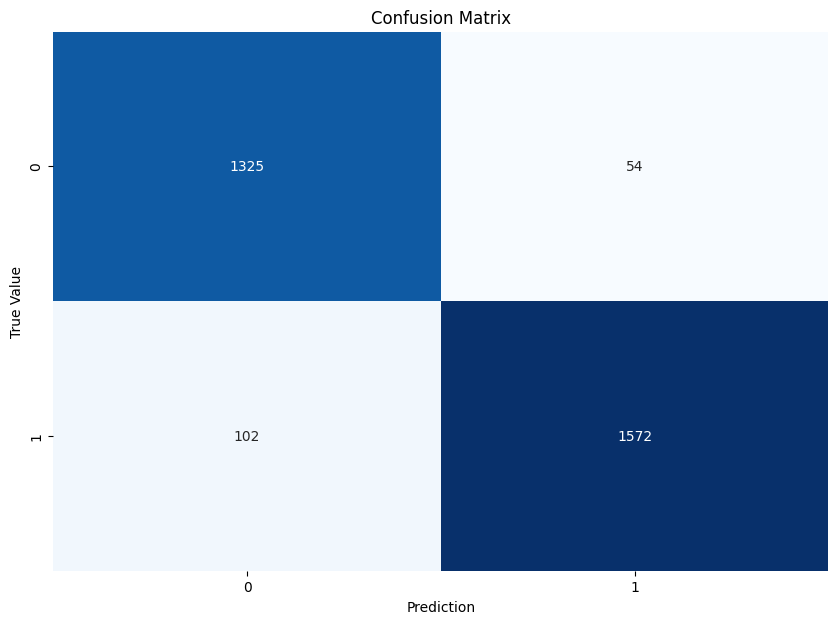

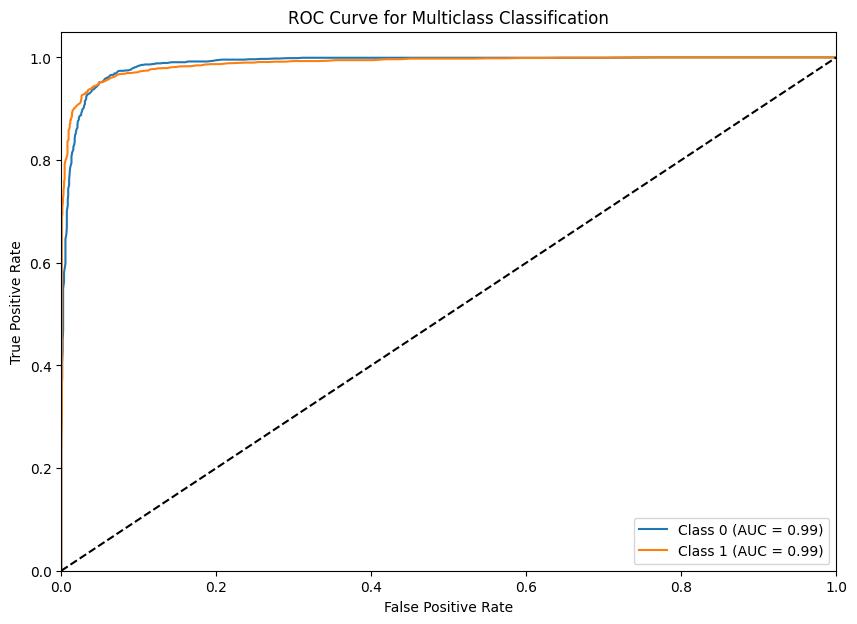

In [38]:
RandomForest_best_model = RandomForestClassifier(**RandomForest_best_params)
RandomForest_best_model.fit(X_train_rf, y_train)
RandomForest_accuracy, RandomForest_y_pred = evaluate_model(RandomForest_best_model, X_test_rf, y_test)

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

param_dist = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_logistic_params,X_train_lr,X_test_lr= model_fit(log_reg, param_dist,standardize = True)

Standardizing training and test data.
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 21.54434690031882}
Optimal accuracy: 0.7739995926804611


Accuracy: 0.7769
F1-score: 0.7721
Recall: 0.7769

Classification Report：
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1379
           1       0.75      0.89      0.81      1674

    accuracy                           0.78      3053
   macro avg       0.79      0.76      0.77      3053
weighted avg       0.79      0.78      0.77      3053



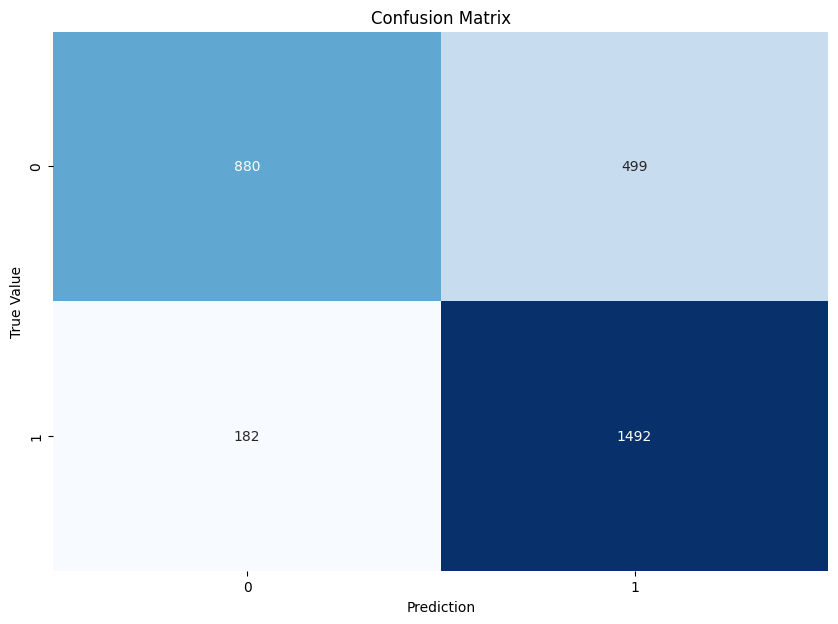

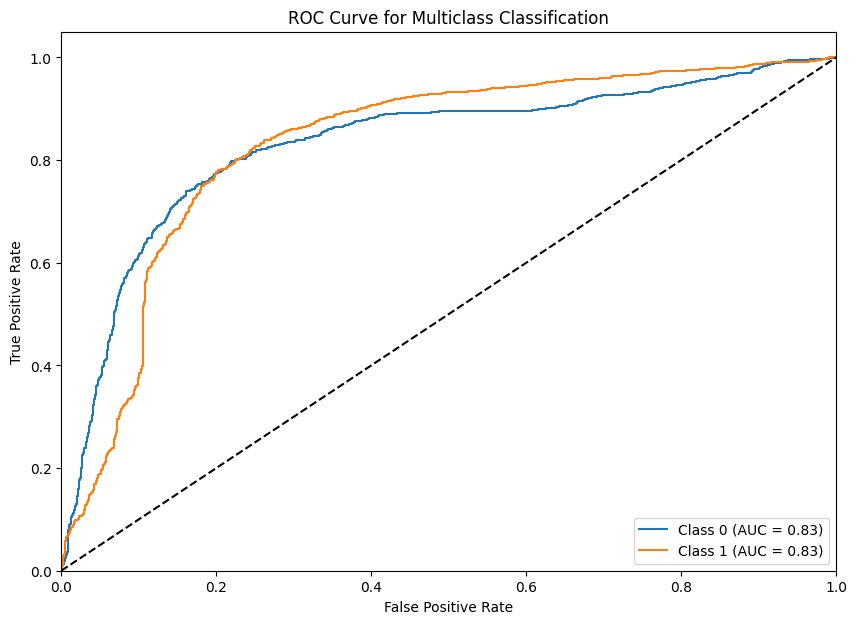

In [40]:
best_model = LogisticRegression(**best_logistic_params)
best_model.fit(X_train_lr, y_train)
accuracy, logistic_y_pred = evaluate_model(best_model, X_test_lr, y_test)

#### MLP

In [41]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(max_iter=1000, random_state=42)

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

best_mlp_params,X_train_mlp,X_test_mlp = model_fit(mlp_model, param_dist,standardize=True)


Standardizing training and test data.
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}
Optimal accuracy: 0.9268513495059991


Accuracy: 0.9224
F1-score: 0.9223
Recall: 0.9224

Classification Report：
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1379
           1       0.93      0.93      0.93      1674

    accuracy                           0.92      3053
   macro avg       0.92      0.92      0.92      3053
weighted avg       0.92      0.92      0.92      3053



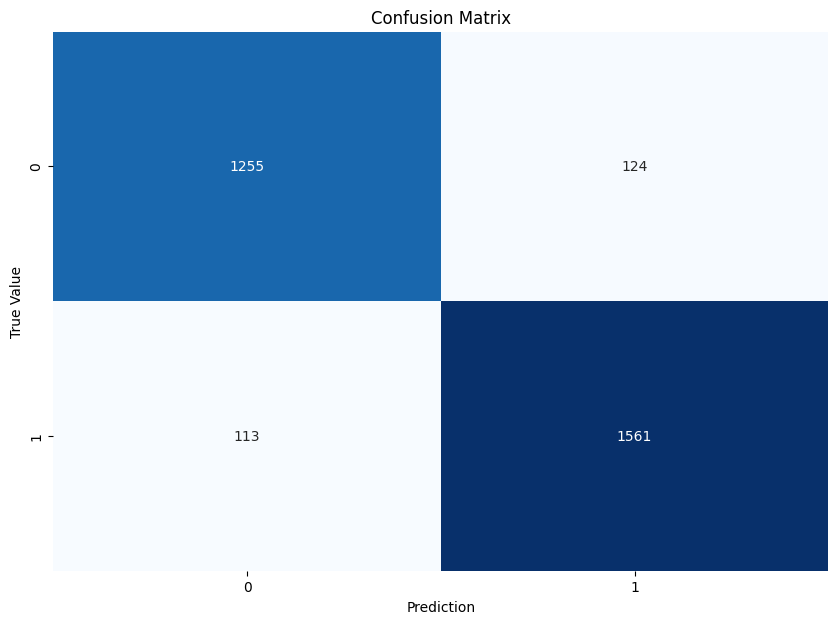

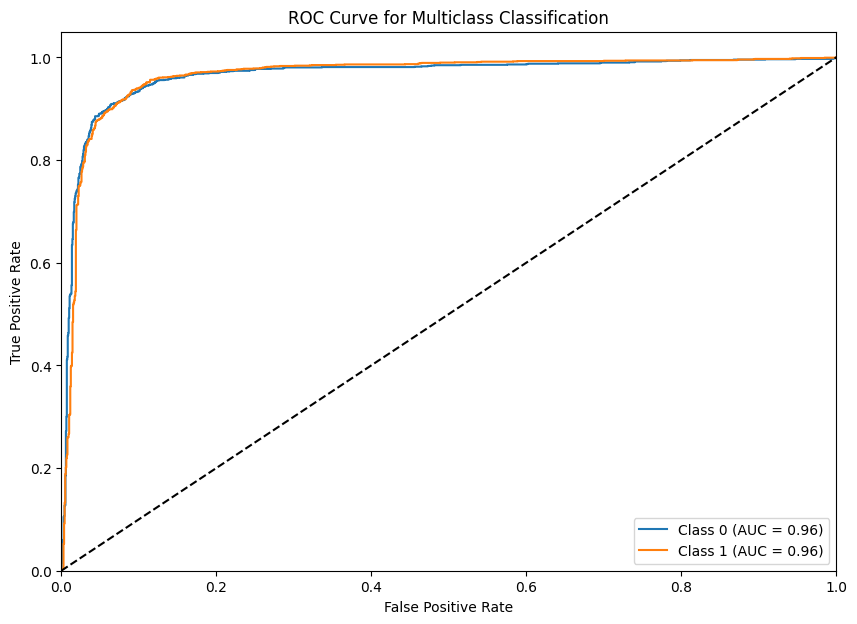

In [42]:
best_mlp_model = MLPClassifier(**best_mlp_params, max_iter=1000, random_state=42)
best_mlp_model.fit(X_train_mlp, y_train)
accuracy, y_pred_mlp = evaluate_model(best_mlp_model, X_test_mlp, y_test)

### 3.3 Model combination

#### Stacking

In [43]:
y_test = y_test.reset_index(drop=True)

In [44]:
df_xgb_pred = pd.DataFrame(xgb_y_pred, columns = ['xgb_y_pred'])
df_lgbm_pred = pd.DataFrame(y_pred_lgbm, columns = ['lgbm_y_pred'])
df_cat_pred = pd.DataFrame(cat_y_pred, columns = ['cat_y_pred'])
df_rf_pred = pd.DataFrame(RandomForest_y_pred, columns = ['rf_pred'])
df_lr_pred = pd.DataFrame(logistic_y_pred, columns = ['lr_pred'])
df_mlp_pred = pd.DataFrame(y_pred_mlp, columns = ['mlp_pred'])

Results = pd.concat([df_xgb_pred, df_lgbm_pred, df_cat_pred, df_rf_pred,df_lr_pred, df_mlp_pred, y_test], axis=1)

In [45]:
y_labels = Results['label']
predictions = Results.drop(columns=['label'])

In [46]:
X_train_stack, X_test_stack, y_train_stack, y_test_stack = train_test_split(predictions, y_labels, test_size=0.2, random_state=42)

#### **Stacking based on the output probability**

A stacking ensemble that generates **Out-Of-Fold probability predictions** from base models
using KFold cross-validation. It then concatenates these probabilities with original features to form the meta-model's input and trains the meta-model. The class also supports threshold optimization for converting probabilities to binary predictions via nested cross-validation.
    
    

In [47]:
class StackingEnsemble:
    """
    Attributes:
        base_models: the list of (name, model_instance) for base models
        meta_model: the meta-model used to combine base model predictions
        n_splits: the num of folds for KFold
        threshold: the decision threshold for final predictions (default 0.5, can be optimized)
        random_state: random seed for reproducibility
    """
    def __init__(self, base_models, meta_model, n_splits=5, threshold=0.5, random_state=42):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_splits = n_splits
        self.threshold = threshold
        self.random_state = random_state
        self.trained_base_models = []
        self.oof_predictions = None
        self.y_train = None

    #  generate OOF predictions using KFold cross-validation for a given base model.
    def get_oof_predictions(self, model, X, y):
        """
        Parameters:
            model: a base model instance.
            X: the selected training features.
            y: the training labels.

        Returns:
            oof_preds: the array of OOF positive class probabilities with shape (n_samples,).
            fitted_model: the model re-fitted on the entire training set.
        """

        if isinstance(X, pd.DataFrame):
            X_array = X.values
        else:
            X_array = X
        if isinstance(y, pd.Series):
            y_array = y.values
        else:
            y_array = y

        n_samples = X_array.shape[0]
        oof_preds = np.zeros(n_samples, dtype=float)
        kf = KFold(n_splits = self.n_splits, shuffle = True, random_state = self.random_state)

        for train_idx, val_idx in kf.split(X_array, y_array):
            X_train_fold, X_val_fold = X_array[train_idx], X_array[val_idx]
            y_train_fold, y_val_fold = y_array[train_idx], y_array[val_idx]
            model.fit(X_train_fold, y_train_fold)
            oof_preds[val_idx] = model.predict_proba(X_val_fold)[:, 1]

        # refit the model on the entire training set for later test prediction
        model.fit(X_array, y_array)
        return oof_preds, model

    def fit(self, X_train, y_train):
        """
        Train the stacking ensemble:
            1. For each base model, generate the OOF predictions via KFold CV
            2. Stack these OOF probabilities with original features to create the enhanced meta features
            3. Fit the meta-model on these enhanced features

        Parameters:
            X_train: the selected training features
            y_train: the training labels
        """
        self.y_train = np.array(y_train)
        oof_preds_list = []
        self.trained_base_models = []

        print("Generating OOF predictions for base models...")
        for name, mdl in self.base_models:
            print(f"Processing base model: {name}")
            oof_probs, fitted_mdl = self.get_oof_predictions(mdl, X_train, y_train)
            oof_preds_list.append(oof_probs.reshape(-1, 1))
            self.trained_base_models.append((name, fitted_mdl))

        # stack OOF predictions with shape = (n_samples, n_base_models)
        stack_X_proba = np.hstack(oof_preds_list)
        # print("Stacked OOF probabilities shape:", stack_X_proba.shape)

        # obtain original features as a numpy array
        if isinstance(X_train, pd.DataFrame):
            X_train_array = X_train.values
        else:
            X_train_array = X_train

        # concatenate OOF probabilities with the original selected features
        self.oof_predictions = np.hstack([stack_X_proba, X_train_array])
        # print("Enhanced stacking training feature shape:", self.oof_predictions.shape)

        # train the meta-model on the enhanced features
        self.meta_model.fit(self.oof_predictions, y_train)
        # print("Meta-model training complete.")

    # generate the final predictions on the test set
    def predict(self, X_test):
        """
        Parameters:
            X_test : the test features

        Returns:
            final_probs : the predicted positive class probabilities
            final_preds : the binary predictions based on the decision threshold
        """
        if isinstance(X_test, pd.DataFrame):
            X_test_array = X_test.values
        else:
            X_test_array = X_test

        test_preds_list = []
        for name, mdl in self.trained_base_models:
            proba_test = mdl.predict_proba(X_test_array)[:, 1]
            test_preds_list.append(proba_test.reshape(-1, 1))

        # stack the base model test probabilities
        stack_test_proba = np.hstack(test_preds_list)
        print("Stacked test probabilities shape:", stack_test_proba.shape)

        # concatenate with the original selected test features
        stack_test_enhanced = np.hstack([stack_test_proba, X_test_array])
        print("Enhanced stacking test feature shape:", stack_test_enhanced.shape)

        # get the meta-model probabilities
        final_probs = self.meta_model.predict_proba(stack_test_enhanced)[:, 1]
        final_preds = (final_probs > self.threshold).astype(int)
        return final_probs, final_preds

    # optimize the decision threshold for converting meta-model probabilities to binary predictions
    # use KFold cross-validation on the meta training features and training labels.
    def optimize_threshold(self, thresholds = np.linspace(0.3, 0.7, 100), cv = 5):
        """
        Parameters:
            thresholds: candidate threshold values (default: 0.3 to 0.7)
            cv: number of folds for threshold optimization (default: 5)

        Returns:
            best_threshold: the threshold value that maximizes the weighted F1-score
        """
        if self.oof_predictions is None or self.y_train is None:
            raise ValueError("Please call the fit() method first to generate meta training features and store y_train.")

        best_threshold = 0.5
        best_score = -1
        kf = KFold(n_splits=cv, shuffle=True, random_state=self.random_state)

        # use the meta-model's predictions on the meta training data for optimization
        meta_preds = self.meta_model.predict_proba(self.oof_predictions)[:, 1]

        for thresh in thresholds:
            scores = []
            for train_idx, val_idx in kf.split(self.oof_predictions):
                y_val = self.y_train[val_idx]
                preds_val = (meta_preds[val_idx] > thresh).astype(int)
                scores.append(f1_score(y_val, preds_val, average='weighted'))
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_threshold = thresh

        self.threshold = best_threshold
        print(f"Optimized threshold: {best_threshold:.4f}, with CV weighted F1 score: {best_score:.4f}")
        return best_threshold

    # evaluate the stacking ensemble on the test set, outputting Accuracy, Precision, Recall, F1-score,
    # and plotting the confusion matrix
    def evaluate(self, X_test, y_test, num_classes=2):
        """
        Parameters:
            X_test: the selected test features
            y_test: the true test labels
            num_classes: Number of classes (default=2)

        Returns:
            metrics: the dictionary containing accuracy, precision, recall, f1_score, and ROC-AUC
            y_pred: the final predicted binary labels
        """

        final_probs, final_preds = self.predict(X_test)

        accuracy = accuracy_score(y_test, final_preds)
        precision = precision_score(y_test, final_preds, average='weighted')
        recall = recall_score(y_test, final_preds, average='weighted')
        f1 = f1_score(y_test, final_preds, average='weighted')
        roc_auc_val = roc_auc_score(y_test, final_probs)

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, final_preds))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, final_preds)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title("Confusion Matrix")
        plt.xlabel("Prediction")
        plt.ylabel("True Value")
        plt.show()

        metrics = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc_val
        }
        return metrics, final_preds


Generating OOF predictions for base models...
Processing base model: xgb


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:24:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Processing base model: lgb
[LightGBM] [Info] Number of positive: 5321, number of negative: 4445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11604
[LightGBM] [Info] Number of data points in the train set: 9766, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544849 -> initscore=0.179881
[LightGBM] [Info] Start training from score 0.179881


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5262, number of negative: 4504
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11698
[LightGBM] [Info] Number of data points in the train set: 9766, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538808 -> initscore=0.155545
[LightGBM] [Info] Start training from score 0.155545


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5257, number of negative: 4509
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11676
[LightGBM] [Info] Number of data points in the train set: 9766, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538296 -> initscore=0.153485
[LightGBM] [Info] Start training from score 0.153485


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5262, number of negative: 4505
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11670
[LightGBM] [Info] Number of data points in the train set: 9767, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538753 -> initscore=0.155323
[LightGBM] [Info] Start training from score 0.155323


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5286, number of negative: 4481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11608
[LightGBM] [Info] Number of data points in the train set: 9767, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541210 -> initscore=0.165216
[LightGBM] [Info] Start training from score 0.165216


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6597, number of negative: 5611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11746
[LightGBM] [Info] Number of data points in the train set: 12208, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540383 -> initscore=0.161886
[LightGBM] [Info] Start training from score 0.161886
Processing base model: cat
Processing base model: rf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6597, number of negative: 5611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12712
[LightGBM] [Info] Number of data points in the train set: 12208, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540383 -> initscore=0.161886
[LightGBM] [Info] Start training from score 0.161886


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Optimized threshold: 0.5303, with CV weighted F1 score: 0.9977
Stacked test probabilities shape: (3053, 4)
Enhanced stacking test feature shape: (3053, 53)
Accuracy: 0.9643
Precision: 0.9644
Recall: 0.9643
F1-score: 0.9643

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1379
           1       0.97      0.96      0.97      1674

    accuracy                           0.96      3053
   macro avg       0.96      0.96      0.96      3053
weighted avg       0.96      0.96      0.96      3053



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


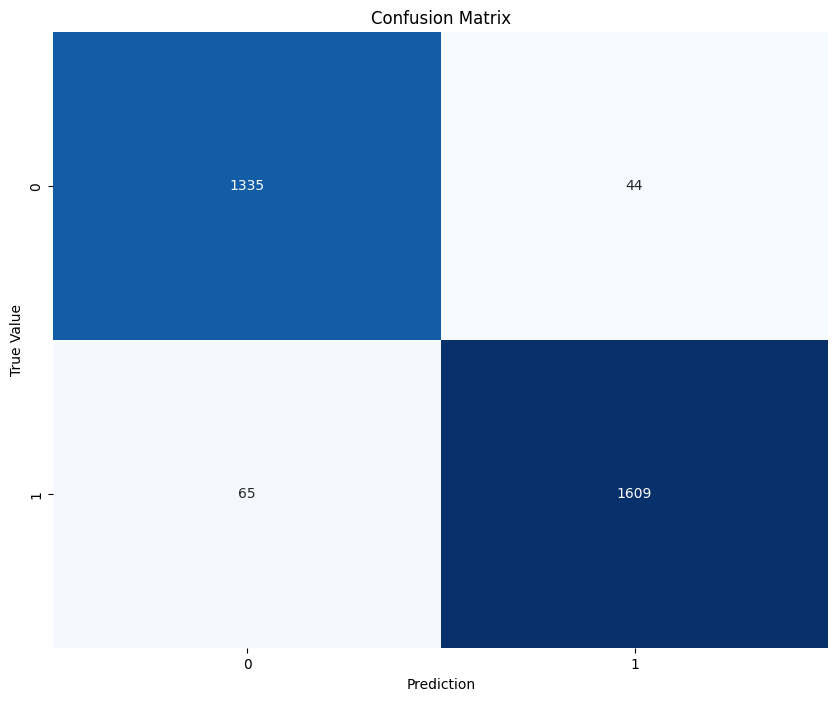

In [48]:
base_models = [
    ('xgb', XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgb', LGBMClassifier(**best_params_lgbm, random_state=42)),
    ('cat', CatBoostClassifier(**cat_best_params, verbose=0, random_state=42)),
    ('rf', RandomForestClassifier(**RandomForest_best_params, random_state=42))
]

meta_model = LGBMClassifier(random_state=42)

stacking_ensemble = StackingEnsemble(base_models=base_models, meta_model=meta_model, n_splits=5, threshold=0.5, random_state=42)

# fit the ensemble on the training data
stacking_ensemble.fit(X_train_selected, y_train)

# optimize the decision threshold using nested CV on meta training features
stacking_ensemble.optimize_threshold(thresholds=np.linspace(0.3, 0.7, 100), cv=5)

# evaluate the ensemble on the test data
metrics, y_pred = stacking_ensemble.evaluate(X_test_selected, y_test, num_classes=2)